# A comparative study of Regression and Tree based Models for movie rating prediction
## This notebook contains the code including,
- Data cleaning
- Data representation using plots
- Feature preprocessing
- Feature selection
- ML Modelling
- Evaluation


## Step 1. Exploratory Data Analysis

In [2]:
# Install all necessary libraries for running the code here
pip install tmdbsimple
pip install xgboost

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
  DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [7]:
#Importing the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import tmdbsimple as tmdb
import nltk
import sklearn
import string
import re
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.preprocessing import LabelEncoder
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
from sklearn.preprocessing import StandardScaler
from scipy.sparse import hstack
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from scipy import stats
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE
#Importing the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from numpy import array 


import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/linijose/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [76]:
# Importing the datasets

df_raw = pd.read_excel("~/Downloads/sample_new.xlsx")
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71113 entries, 0 to 71112
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   tconst          71113 non-null  object 
 1   titleType       71113 non-null  object 
 2   primaryTitle    71113 non-null  object 
 3   originalTitle   71113 non-null  object 
 4   isAdult         71113 non-null  int64  
 5   startYear       71113 non-null  int64  
 6   endYear         71113 non-null  object 
 7   runtimeMinutes  71113 non-null  object 
 8   genres          71113 non-null  object 
 9   averageRating   71113 non-null  float64
 10  numVotes        71113 non-null  int64  
 11  director        31573 non-null  object 
 12  actor           29584 non-null  object 
 13  actress         26533 non-null  object 
 14  region_list     32712 non-null  object 
dtypes: float64(1), int64(3), object(11)
memory usage: 8.1+ MB


In [77]:
#Checking the dimension
df_raw.shape

(71113, 15)

In [10]:
#Checking the data types
df_raw.dtypes

tconst             object
primaryTitle       object
originalTitle      object
startYear           int64
runtimeMinutes    float64
genres             object
averageRating     float64
numVotes            int64
director           object
actor              object
actress            object
region_list        object
dtype: object

In [78]:
# Sample the first 5 records
df_raw.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,director,actor,actress,region_list
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,0,2001,\N,118,"Comedy,Fantasy,Romance",6.4,86957,James Mangold,"Hugh Jackman, Liev Schreiber, Breckin Meyer",Meg Ryan,"IT, FR, ES, PT, ZA, PL, BG, GB, JP, DE, \N, EE..."
1,tt0043139,movie,Life of a Beijing Policeman,Wo zhe yi bei zi,0,2013,\N,120,"Drama,History",7.2,190,NaN,"Hui Shi, Heling Wei, Yang Shen, Wei Li",NaN,"SUHH, XWG, CN, \N, XWW, GB, US, \N"
2,tt0062336,movie,The Tango of the Widower and Its Distorting Mi...,El tango del viudo y su espejo deformante,0,2020,\N,70,Drama,6.4,174,NaN,NaN,NaN,"RU, \N, XWW, GB, HK, TW, US, FR, CL, \N"
3,tt0069049,movie,The Other Side of the Wind,The Other Side of the Wind,0,2018,\N,122,Drama,6.7,7723,NaN,NaN,NaN,NaN
4,tt0088751,movie,The Naked Monster,The Naked Monster,0,2005,\N,100,"Comedy,Horror,Sci-Fi",5.2,335,"Wayne Berwick, Ted Newsom","Kenneth Tobey, R.G. Wilson, John Goodwin",Brinke Stevens,NaN


In [79]:
# Viewing the data summary
df_raw.describe(include='all')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes,director,actor,actress,region_list
count,71113,71113,71113,71113,71113.000000,71113.000000,71113,71113,71113,71113.000000,7.111300e+04,31573,29584,26533,32712
unique,71113,1,65870,67953,NaN,NaN,1,257,860,NaN,NaN,21678,29077,23566,27175
top,tt0035423,movie,Alone,Alone,NaN,NaN,\N,90,Drama,NaN,NaN,Takashi Miike,Marcin Dorocinski,Nayanthara,"\N, US"
freq,1,71113,12,11,NaN,NaN,71113,4361,9958,NaN,NaN,25,5,21,341
mean,NaN,NaN,NaN,NaN,0.000366,2013.294461,NaN,NaN,NaN,5.812601,1.007713e+04,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,0.019118,5.971253,NaN,NaN,NaN,1.363695,5.744803e+04,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,0.000000,2001.000000,NaN,NaN,NaN,1.000000,1.010000e+02,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,0.000000,2009.000000,NaN,NaN,NaN,5.000000,2.100000e+02,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,0.000000,2014.000000,NaN,NaN,NaN,6.000000,5.070000e+02,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,0.000000,2018.000000,NaN,NaN,NaN,6.800000,1.868000e+03,NaN,NaN,NaN,NaN


#### Initial Data Cleaning

*Remove DUPLICATES*

In [22]:
# removing all the duplicates based on move ids
df_raw = df_raw.drop_duplicates(subset=['tconst'])


In [26]:
# Checking for duplicates in primaryTitle
df_raw[df_raw.duplicated(['primaryTitle'], keep=False)]

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,actor,actress,region_list
15,tt0160663,Blast,Blast,2000,88.0,"Crime,Drama,Thriller",5.5,270,Martin Schenk,"Blake Heron, Adam LaVorgna, Tony Denman",Liesel Matthews,"BR, NO, DK, MX, , US, FI, HU, CA, CA, GB, US, AU"
16,tt0160706,The Prodigy,The Prodigy,2005,120.0,"Crime,Drama,Thriller",5.3,914,William Kaufman,"Holt Boggs, Glen Vorhis, Matt Beckham",Diana Lee Inosanto,"US, JP, MX, , JP, IT, GB, ES, RU, HU"
29,tt0162650,Shaft,Shaft,2000,99.0,"Action,Crime,Thriller",6.0,78860,John Singleton,"Samuel L. Jackson, Christian Bale, Jeffrey Wright",Vanessa Williams,"BR, JP, ZA, IN, VN, RU, SE, RS, FR, ES, PH, IT..."
37,tt0163596,Dark Water,Dark Water,2001,92.0,"Crime,Drama,Mystery",5.1,201,Ron Chartier,"G. Patrick Currie, Ron Sauvé","Holly Ferguson, Kathleen Duborg",", GB, US, CA"
41,tt0165361,Highway,Highway,2002,97.0,"Crime,Drama",6.1,6629,James Cox,"Jared Leto, Jake Gyllenhaal","Kimberley Kates, Selma Blair","CA, RU, GB, TW, US, US, IN, BR, FI, , AU, IT, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
11221,tt9820352,Villain,Villain,2020,97.0,"Action,Crime,Drama",5.9,3721,Philip Barantini,"Craig Fairbrass, George Russo, Mark Monero",Izuka Hoyle,"US, DE, RU, , IN, CA, ES, AU, IN, TR, PT, GB, ..."
11250,tt9845398,End of the Century,Fin de siglo,2019,84.0,Drama,6.9,3628,Lucio Castro,"Juan Barberini, Ramon Pujol, Mariano Lopez Seoane",Mía Maestro,"GB, AU, FR, DE, MX, PH, RS, US, AR, SE, , TW, ..."
11321,tt9893160,No Way Out,No Way Out,2022,89.0,"Action,Crime,Thriller",3.8,389,Azi Rahman,"Jeff Adler, Joey Bicicchi","Allie Ayers, Leah Blefko","ID, PH, JP, NL, PL, TH, IN, SE, HK, IT, GB, FR..."
11342,tt9900940,Scrapper,The Scrapper,2021,87.0,"Crime,Drama,Thriller",4.5,1441,Bari Kang,"Craig muMs Grant, Anil Kumar, Myles Clohessy, ...",NaN,"TR, ID, US, AE, NL, DE, PH, PL, RU, , KR, BR, ..."


In [23]:
df_raw.shape

(11360, 12)

In [27]:
# Display missing values count for each column
missing_values = df_raw.isna().sum()
print(missing_values)

tconst               0
primaryTitle         0
originalTitle        0
startYear            0
runtimeMinutes     130
genres               0
averageRating        0
numVotes             0
director             0
actor             1083
actress           2099
region_list          0
dtype: int64


In [80]:
# Display missing values count and percentage for each column
missing_data = pd.DataFrame({'total_missing': df_raw.isna().sum(), 'perc_missing': (df_raw.isna().sum()/df_raw.count())*100})
missing_data

,total_missing,perc_missing
tconst,0,0.000000
titleType,0,0.000000
primaryTitle,0,0.000000
originalTitle,0,0.000000
isAdult,0,0.000000
startYear,0,0.000000
endYear,0,0.000000
runtimeMinutes,0,0.000000
genres,0,0.000000
averageRating,0,0.000000


In [81]:
#Deleting endYear since all values are missing
df_raw.drop('endYear', axis=1, inplace=True)

In [82]:
# Deleting region_list due to high variability,
# and also based on the recent global audience for all movies from differnt regions
df_raw.drop('region_list', axis=1, inplace=True)

In [83]:
# Deleting the records with missing details under director
df_raw = df_raw.dropna(subset=['director'], axis=0)

In [84]:
# Deleting the records with missing details under runtimeMinutes
df_raw = df_raw.dropna(subset=['runtimeMinutes'], axis=0)

In [85]:
#View the dimentions
df_raw.shape

(31573, 13)

#### Additional features extracted by fetching some attributes from TMDB APIs and joined with the main data source

In [34]:
# Extracting additional variables through TMDB API
# for specific IDs to check the connectiona and list of available information

# Defining the API Key
tmdb.API_KEY = '(key)'

# Creating a function
def fetch_movie_details(tmdb_id):
    movie = tmdb.Movies(tmdb_id)
    details = movie.info()
    return details

# Defining the movie IDs
tmdb_ids = [603, 187, 680] 

# Retrive the data
movie_details_list = []
for tmdb_id in tmdb_ids:
    details = fetch_movie_details(tmdb_id)
    movie_details_list.append(details)

        
# Changing the data into a dataframe
df_movie_details = pd.DataFrame(movie_details_list)

# Display the DataFrame
df_movie_details.head()

,adult,backdrop_path,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,/oMsxZEvz9a708d49b6UdZK1KAo5.jpg,"{'id': 2344, 'name': 'The Matrix Collection', ...",63000000,"[{'id': 28, 'name': 'Action'}, {'id': 878, 'na...",http://www.warnerbros.com/matrix,603,tt0133093,en,The Matrix,...,1999-03-30,463517383,136,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Welcome to the Real World.,The Matrix,False,8.205,23731
1,False,/lt1rGQSqhk2T2T4lHo6CTQYvoWP.jpg,"{'id': 135179, 'name': 'Sin City Collection', ...",40000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.miramax.com/movie/sin-city/,187,tt0401792,en,Sin City,...,2005-04-01,158733820,124,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Walk down the right back alley in Sin City and...,Sin City,False,7.446,7507
2,False,/suaEOtk1N1sgg2MTM7oZd2cfVp3.jpg,None,8500000,"[{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...",https://www.miramax.com/movie/pulp-fiction/,680,tt0110912,en,Pulp Fiction,...,1994-09-10,213900000,154,"[{'english_name': 'English', 'iso_639_1': 'en'...",Released,Just because you are a character doesn't mean ...,Pulp Fiction,False,8.488,25784


In [35]:
# To View the first 5 rows
df_movie_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  3 non-null      bool   
 1   backdrop_path          3 non-null      object 
 2   belongs_to_collection  2 non-null      object 
 3   budget                 3 non-null      int64  
 4   genres                 3 non-null      object 
 5   homepage               3 non-null      object 
 6   id                     3 non-null      int64  
 7   imdb_id                3 non-null      object 
 8   original_language      3 non-null      object 
 9   original_title         3 non-null      object 
 10  overview               3 non-null      object 
 11  popularity             3 non-null      float64
 12  poster_path            3 non-null      object 
 13  production_companies   3 non-null      object 
 14  production_countries   3 non-null      object 
 15  release_da

In [36]:
# Moving on to the data extraction for the variables in df_raw
# Only overview, release date, production company and budget is being extracted,
# since they are the most relevant attributes to this study.

# Creating a list of all the movie ids in df_raw
tconst = df_raw['tconst']

In [87]:
# Sample DataFrame
data = tconst  # Replace with your IMDb IDs
df_sample = pd.DataFrame(data)

# TMDb API details
base_url = "https://api.themoviedb.org/3/find/"
api_key = "key"

columns = ["imdbid", "title", "overview", "budget", "release_date", "production_company"]

def read_from_tmdb_api(film):
    response = requests.get(base_url + str(film) + "?api_key=" + api_key + "&external_source=imdb_id")
    # Check if the response is successful and contains JSON data
    if response.status_code == 200 and response.text:
        f_details = response.json()
        
        # Extract movie details if available
        if "movie_results" in f_details and len(f_details["movie_results"]) > 0:
            movie_info = f_details["movie_results"][0]
            movie_title = movie_info["title"]
            movie_overview = movie_info["overview"]
            budget = movie_info.get("budget", "")
            release_date = movie_info.get("release_date", "")
            production_companies = ", ".join([comp["name"] for comp in movie_info.get("production_companies", [])])
            new_row = {
                "imdbid": film,
                "title": movie_title,
                "overview": movie_overview,
                "budget": budget,
                "release_date": release_date,
                "production_company": production_companies
            }
        else:
            new_row = {
                "imdbid": film,
                "title": "",
                "overview": "",
                "budget": "",
                "release_date": "",
                "production_company": ""
            }
        print(new_row)
        return new_row

dfs = [pd.DataFrame([read_from_tmdb_api(film)], columns=columns) for film in df_sample['tconst']]
    
df = pd.concat(dfs, ignore_index=True)

        
df.head() # to view the results

{'imdbid': 'tt0035423', 'title': 'Kate & Leopold', 'overview': "When her scientist ex-boyfriend discovers a portal to travel through time -- and brings back a 19th-century nobleman named Leopold to prove it -- a skeptical Kate reluctantly takes responsibility for showing Leopold the 21st century. The more time Kate spends with Leopold, the harder she falls for him. But if he doesn't return to his own time, his absence will forever alter history.", 'budget': '', 'release_date': '2001-12-25', 'production_company': ''}
{'imdbid': 'tt0160256', 'title': 'The Unscarred', 'overview': "Four exchange students meet in Berlin 20 years after graduating but picking up where they left off doesn't turn out to be as easy as they had hoped.", 'budget': '', 'release_date': '2000-06-01', 'production_company': ''}
{'imdbid': 'tt0160289', 'title': 'Four Dogs Playing Poker', 'overview': 'With the help of their mentor Felix, a group of the best friends and first-time thieves steal a valuable statuette for a 

{'imdbid': 'tt0160905', 'title': 'Spooky House', 'overview': 'A magician with a mysterious secret lives alone with his jaguar, Shadow, in the Spooky House, an old mansion rigged with magic tricks and hidden chambers.', 'budget': '', 'release_date': '2002-04-19', 'production_company': ''}
{'imdbid': 'tt0161081', 'title': 'What Lies Beneath', 'overview': "When Claire Spencer starts hearing ghostly voices and seeing spooky images, she wonders if an otherworldly spirit is trying to contact her. All the while, her husband tries to reassure her by telling her it's all in her head. But as Claire investigates, she discovers that the man she loves might know more than he's letting on.", 'budget': '', 'release_date': '2000-07-21', 'production_company': ''}
{'imdbid': 'tt0161083', 'title': "What's the Worst That Could Happen?", 'overview': 'Thief Kevin Caffery attempts to rob from the home of rich businessman Max Fairbanks. But Fairbanks catches him and steals his cherished ring that his girlfrie

{'imdbid': 'tt0163764', 'title': 'Net Worth', 'overview': 'Net Worth details the serio-comic story of four friends who learn the value of friendship as they embark on a thirty day contest to achieve the highest net worth in a new city with no cash and no connections.', 'budget': '', 'release_date': '2000-01-01', 'production_company': ''}
{'imdbid': 'tt0165361', 'title': 'Highway', 'overview': "Jack is caught with the wife of his employer, a Vegas thug. The thug sends goons after Jack, who convinces his best friend, Pilot, to flee with him. Pilot insists that they head for Seattle, but doesn't tell Jack why. The goons learn from Pilot's drug source where the youths are headed, and they follow, hell bent on breaking Jack's feet. On the road, Jack and Pilot give a ride to Cassie, a distressed young woman. She and Jack hit it off. They pick up an aging stoner headed to Seattle for Kurt Cobain's memorial, and they help a circus sideshow family. Why is Pilot so set on Seattle, will the goons

{'imdbid': 'tt0167261', 'title': 'The Lord of the Rings: The Two Towers', 'overview': 'Frodo and Sam are trekking to Mordor to destroy the One Ring of Power while Gimli, Legolas and Aragorn search for the orc-captured Merry and Pippin. All along, nefarious wizard Saruman awaits the Fellowship members at the Orthanc Tower in Isengard.', 'budget': '', 'release_date': '2002-12-18', 'production_company': ''}
{'imdbid': 'tt0167360', 'title': 'Race to Space', 'overview': 'In the 1960s a young woman works at NASA as an animal trainer responsible for the chimpanzee who will go into space.', 'budget': '', 'release_date': '2001-10-31', 'production_company': ''}
{'imdbid': 'tt0167380', 'title': 'Russian Riot', 'overview': 'The end of the XVIII century. The reign of Catherine II. In the deep Russian provinces, among the vast steppes of the Ural escaped convict Yemelyan Pugachev proclaimed himself Emperor Peter III of Russia. Under the banner of the Pretender embarked detachments of Cossacks, fugit

{'imdbid': 'tt0176694', 'title': 'The Tragedy of Man', 'overview': "Jankovics's adaptation of the eponymous play is divided into multiple parts, and depicts the creation and fall of Man throughout history.", 'budget': '', 'release_date': '2011-11-27', 'production_company': ''}
{'imdbid': 'tt0176783', 'title': 'Gossip', 'overview': 'For a class project, three college students decide to invent an unfounded rumor about the most popular girl on campus. But as the rumor spreads, it begins to spiral out of control.', 'budget': '', 'release_date': '2000-04-21', 'production_company': ''}
{'imdbid': 'tt0176883', 'title': 'Kids World', 'overview': 'What would you wish for if you were eleven and could have anything in the world? Your parents don\'t understand you. Your teenage brother is constantly getting you in trouble...for things he did! You\'re in love with the twelve-year-old girl across the street... who, unfortunately, is dating the local bully. Then, one afternoon, while being chased by 

{'imdbid': 'tt0179098', 'title': 'Moonlight Mile', 'overview': 'As he copes with the death of his fiancee along with her parents, a young man must figure out what he wants out of life.', 'budget': '', 'release_date': '2002-09-09', 'production_company': ''}
{'imdbid': 'tt0179137', 'title': 'Coronation', 'overview': "The elderly heir of a formerly wealthy and respected Chilean family, Andres, suffers from decadence and solitude. He hires young Estela in order to look after his tiranic and almost crazy grandmother. The differences in class and age don't stop Andres from courting Estela, whose fiancé Mario tries to make some money with the passions of his well-off rival. The suffocating atmosphere of the run-down mansion in the outskirts of Santiago represents the deterioration of the bourgeoisie, and sets the scene for the total collapse of Andres.", 'budget': '', 'release_date': '2000-04-27', 'production_company': ''}
{'imdbid': 'tt0179183', 'title': 'Fortress 2', 'overview': "7 years on

{'imdbid': 'tt0182508', 'title': 'Urbania', 'overview': 'A series of urban legends take place around the life of a troubled man who is searching New York City for a mysterious stranger.', 'budget': '', 'release_date': '2000-01-24', 'production_company': ''}
{'imdbid': 'tt0183056', 'title': 'Esther Kahn', 'overview': 'A Jewish girl in 19th century London dreams of becoming a stage actress.', 'budget': '', 'release_date': '2000-10-04', 'production_company': ''}
{'imdbid': 'tt0183142', 'title': 'Gunblast Vodka', 'overview': 'Supermodel Everhart is kidnapped by bad guy Prochnow and rescued by good guy Otto in technopop action.', 'budget': '', 'release_date': '2001-08-08', 'production_company': ''}
{'imdbid': 'tt0183280', 'title': 'Intrepid', 'overview': "Hotshot Navy special ops guys get assigned to take a cruise to keep an eye on a VIP's daughter. Once the voyage is under way, somehow a nuke A) gets lost in the vicinity, and  goes off. The resulting tidal wave capsizes the cruise ship, an

{'imdbid': 'tt0186151', 'title': 'Frequency', 'overview': "When a rare phenomenon gives police officer John Sullivan the chance to speak to his father, 30 years in the past, he takes the opportunity to prevent his dad's tragic death.  After his actions inadvertently give rise to a series of brutal murders he and his father must find a way to fix the consequences of altering time.", 'budget': '', 'release_date': '2000-04-28', 'production_company': ''}
{'imdbid': 'tt0186183', 'title': 'The Guilty', 'overview': 'Callum Crane, a lawyer and would-be federal judge, jeopardizes his chances at a judgeship by forcing himself on his secretary. He then worsens the situation by trying to have the woman murdered. Further complicating matters, he assigns the task to a young man who, unbeknownst to Crane, is actually his son, Nathan. Nathan refuses to do the deed, but not before informing several people, one of whom tries to take on the job.', 'budget': '', 'release_date': '2000-06-01', 'production_c

{'imdbid': 'tt0187738', 'title': 'Blade II', 'overview': 'A rare mutation has occurred within the vampire community - The Reaper. A vampire so consumed with an insatiable bloodlust that they prey on vampires as well as humans, transforming victims who are unlucky enough to survive into Reapers themselves. Blade is asked by the Vampire Nation for his help in preventing a nightmare plague that would wipe out both humans and vampires.', 'budget': '', 'release_date': '2002-03-22', 'production_company': ''}
{'imdbid': 'tt0187750', 'title': 'Primary Suspect', 'overview': 'On a personal mission to destroy his wife killer, a Denver cop (William Baldwin) joins a rogue operation that goes bad, finds himself under suspicion of murder yet still manages to restart his life.', 'budget': '', 'release_date': '2000-05-12', 'production_company': ''}
{'imdbid': 'tt0188045', 'title': 'Magicians', 'overview': 'A con-man and a wannabe professional magician team up with a waitress and an old professional on 

{'imdbid': 'tt0190736', 'title': 'Sand', 'overview': 'A young man tries running from his past by hiding from his two violent brothers, only to have them track and harass him and his friends.', 'budget': '', 'release_date': '2002-01-02', 'production_company': ''}
{'imdbid': 'tt0190861', 'title': 'Vatel', 'overview': "In 1671, with war brewing with Holland, a penniless prince invites Louis XIV to three days of festivities at a chateau in Chantilly. The prince wants a commission as a general, so the extravagances are to impress the king. In charge of all is the steward, Vatel, a man of honor, talent, and low birth. The prince is craven in his longing for stature: no task is too menial or dishonorable for him to give Vatel. While Vatel tries to sustain dignity, he finds himself attracted to Anne de Montausier, the king's newest mistress. In Vatel, she finds someone who's authentic, living out his principles within the casual cruelties of court politics. Can the two of them escape unscathed

{'imdbid': 'tt0192295', 'title': 'Marlene', 'overview': 'Marlene is a 2000 German biopic film directed by Joseph Vilsmaier and starring Katja Flint, Hans Werner Meyer and Herbert Knaup. It follows the life of the German actress Marlene Dietrich and her success in Hollywood.', 'budget': '', 'release_date': '2000-03-09', 'production_company': ''}
{'imdbid': 'tt0192407', 'title': 'Otto - The Disaster Movie', 'overview': 'A man from Ostfriesland travels to Hamburg and sets course for America on a steamship to conquer this New World as well. What he leaves behind is a swath of devastation, a breach of confusion, a Milky Way full of music, a dead end full of mad jokes and perhaps a touch too much wordplay at the expense of others. But what is worst of all: he has also made a film about it!', 'budget': '', 'release_date': '2000-03-22', 'production_company': ''}
{'imdbid': 'tt0192455', 'title': 'Picking Up the Pieces', 'overview': 'A small New Mexican village discovers a severed hand that is c

{'imdbid': 'tt0195234', 'title': 'Saving Grace', 'overview': 'Unexpectedly widowed, prim and proper housewife Grace Trevethyn finds herself in dire financial straits when she inherits massive debts her late husband had been accruing for years. Faced with losing her house, she decides to use her talent for horticulture and hatches a plan to grow potent marijuana which can be sold at an astronomical price, thus solving her financial crisis.', 'budget': '', 'release_date': '2000-01-24', 'production_company': ''}
{'imdbid': 'tt0195308', 'title': 'Starforce', 'overview': "A warrior and a beautiful ex-convict are left to fight the galaxy's most fearsome commandos in an alien wasteland.", 'budget': '', 'release_date': '2000-07-10', 'production_company': ''}
{'imdbid': 'tt0195631', 'title': 'Alone with a Stranger', 'overview': "Max never had the good things in life. A life of crime was his only legacy. So when he discovers an unknown brother, to whom fortune has granted all that is missing in 

{'imdbid': 'tt0197392', 'title': 'Odd Little Man', 'overview': "Little Oddemann uses every means available to find Jesus, including his slingshot. The film takes us to Norway in the late '30s, where we meet a series of burlesque and humorous characters, whose antics convince Oddemann that growing up may be a bad idea. Yet Oddemann finds there are certain rewards to being grown-up, such as partying and chasing women, that merit closer examination.", 'budget': '', 'release_date': '2000-09-01', 'production_company': ''}
{'imdbid': 'tt0197402', 'title': 'Detector', 'overview': 'Daniel Jor is a 28-year-old psychiatrist, still living with his mom. He and his friend Ronny have one thing in common, they like searching for metallic objects in the ground. One day they find a jewel with the name "Janne" imprinted. This is the beginning of something big for Daniel. His life will never be the same. He\'s about to discover a lot of hidden secrets, about himself and others.', 'budget': '', 'release_d

{'imdbid': 'tt0217086', 'title': "Teacher's Pet", 'overview': 'Psychopath Debbie Strand escapes from a mental institution for the criminally insane and takes the identity of a co-ed she meets and sets herself up on a college campus where she once again begins killing students who get in the way of her obsession with her former high school teacher Sam Deckner now teaching at the college.', 'budget': '', 'release_date': '2000-09-08', 'production_company': ''}
{'imdbid': 'tt0217100', 'title': 'Toutes les nuits', 'overview': "La Première éducation sentimentale (the first version of L'Éducation sentimentale), re-adapting the themes of first love, the intoxication of desire, and failed ideological revolution (that culminated in the Revolution of 1848) to the May 68 generation through a chronicle of the parallel lives of a pair of childhood friends, the pragmatic Henri and idealistic Jules as they leave their bucolic, rural hometown to separately pursue their baccalaureate - and real world - 

{'imdbid': 'tt0244684', 'title': 'No One Sleeps', 'overview': 'Stefan, a young gay East German medical student, arrives in San Francisco for a medical congress and is following the trail of his dead father, a once high ranking AIDS researcher in the East. Stefan is investigating whether the HIV virus was an incremental result of secret human experiments that were conducted in US prisons in the seventies - a thesis of the Berlin professor, Jakob Segal, which was spread by state agents of former East Germany.  At the same time, a serial killer is haunting the gay bars of the city and is killing HIV positive long-term survivors.', 'budget': '', 'release_date': '2000-02-12', 'production_company': ''}
{'imdbid': 'tt0244709', 'title': 'Pavilion of Women', 'overview': 'With World War 2 looming, a prominent family in China must confront the contrasting ideas of traditionalism, communism and Western thinking, while dealing with the most important ideal of all: love and its meaning in society.',

{'imdbid': 'tt0245317', 'title': 'The Next Big Thing', 'overview': 'A painter who finds success (and true love) after a pickpocket steals one of his works, gives it a false authorship and promotes the imaginary artist to instant success so he can cash in on his ill-gotten gains.', 'budget': '', 'release_date': '2001-11-08', 'production_company': ''}
{'imdbid': 'tt0245328', 'title': 'Off Key', 'overview': 'A trio of opera singers are reunited by a wedding ten years after their stormy breakup.', 'budget': '', 'release_date': '2001-11-16', 'production_company': ''}
{'imdbid': 'tt0245350', 'title': 'The Pearl', 'overview': 'Based on John Steinbeck\'s classic novel, The Pearl is the story of an impoverished diver whose life is changed forever when he discovers "the pearl of the world".', 'budget': '', 'release_date': '2001-01-01', 'production_company': ''}
{'imdbid': 'tt0245356', 'title': 'Perfume', 'overview': 'A week in the lives of a group of models, photographers, agents, reporters, pub

{'imdbid': 'tt0245891', 'title': 'Extreme Days', 'overview': "As four lifelong friends, Will, Bryan, Matt, and Corey, are on the road trip they've been planning their whole lives, Corey's beloved grandfather unexpectedly dies. When going to claim Corey's inheritance, the gang meets Matt's beautiful cousin Jessie and embark on a hilarious, extreme sports-filled adventure.", 'budget': '', 'release_date': '2001-09-28', 'production_company': ''}
{'imdbid': 'tt0246000', 'title': 'Killer Instinct', 'overview': 'A series of unsolved crimes from the past prove to be the common thread in three stories that intertwine to reveal big problems in a small town.', 'budget': '', 'release_date': '2001-01-20', 'production_company': ''}
{'imdbid': 'tt0246002', 'title': 'Kingdom Come', 'overview': 'When her husband keels over from a stroke, Raynelle Slocumb calls the entire clan together to remember their dearly departed. Family tensions reach a comedic boil as the wildly dysfunctional Slocumbs squabble a

{'imdbid': 'tt0246514', 'title': 'Advertising Rules!', 'overview': "Edward Kaminsky, an aging ad man, wants a golden parachute from his agency; he must first land the Opel auto contract. Rosa, a youth with wealthy parents, wants to establish herself as an artist. The clumsy and enthusiastic Viktor, not quite honest, wants work. When he wanders into Kaminsky's meeting with Opel and says something about irony, the Opel director wants him in on the campaign. Then he steals an idea from Rosa that the Opel director loves. Before Rosa discovers he's expropriated her idea, Rosa and Viktor become lovers. Father-son feelings materialize between Kaminsky and Viktor. Can the impulsive Viktor hold it together before Rosa learns the truth and flies away?", 'budget': '', 'release_date': '2001-03-03', 'production_company': ''}
{'imdbid': 'tt0246544', 'title': 'The Musketeer', 'overview': "Young D'Artagnan seeks to join the legendary musketeer brigade and avenge his father's death - but he finds that 

{'imdbid': 'tt0246894', 'title': 'Rollerball', 'overview': 'In this fast action-packed thriller, Jonathan, Marcus, and Aurora compete in a dangerous, fierce sport called Rollerball. Although, Johnathan and Marcus try to quit, cruel and vindictive promoter Alexi Petrovich encourages them to still participate.', 'budget': '', 'release_date': '2002-02-08', 'production_company': ''}
{'imdbid': 'tt0246906', 'title': 'The Season of Men', 'overview': 'An 18 year old on the island Djerba, Aicha, is married to Said, who works in Tunis for much of the year. Aicha breaks with tradition and decides to join Said in Tunis, weaving rugs to make money. Said asks that she give him a son, so Aicha lives under the rule of her mother-in-law.', 'budget': '', 'release_date': '2000-09-13', 'production_company': ''}
{'imdbid': 'tt0246989', 'title': 'Tomcats', 'overview': "College buddies chip in and promise that the group's last unmarried man will collect a cash pot. Seven years later, the kitty is worth $500

{'imdbid': 'tt0247944', 'title': 'Badal', 'overview': "Badal is a victim of the 1984 riots, brought up by a terrorist. Badal aims to kill the treacherous police officer who had killed his parents and his loving sister. He takes shelter in the house of an honest police officer and falls in love with a minister's granddaughter. Will he be able to accomplish his revenge?", 'budget': '', 'release_date': '2000-02-11', 'production_company': ''}
{'imdbid': 'tt0247945', 'title': 'Badri', 'overview': 'Vennela accuses Badri of not loving her sincerely and challenges him that no one can love him like she does. However, their lives take a turn when he meets Sarayu and she falls madly in love with him.', 'budget': '', 'release_date': '2000-04-20', 'production_company': ''}
{'imdbid': 'tt0247992', 'title': 'Dulhan Hum Le Jayenge', 'overview': 'Sapna has lost her parents at an early age and lives with her three quirky uncles - Bhola Nath is a fitness freak, Prabhu Nath is a deeply religious fellow an

{'imdbid': 'tt0253474', 'title': 'The Pianist', 'overview': "The true story of pianist Władysław Szpilman's experiences in Warsaw during the Nazi occupation. When the Jews of the city find themselves forced into a ghetto, Szpilman finds work playing in a café; and when his family is deported in 1942, he stays behind, works for a while as a laborer, and eventually goes into hiding in the ruins of the war-torn city.", 'budget': '', 'release_date': '2002-09-17', 'production_company': ''}
{'imdbid': 'tt0253486', 'title': 'Sex Files: Pleasureville', 'overview': 'Aliens masquerading as owners of a small town video store distribute tapes that cause anyone who watches them to pleasure themselves and whoever else is nearby.', 'budget': '', 'release_date': '2000-01-09', 'production_company': ''}
{'imdbid': 'tt0253556', 'title': 'Reign of Fire', 'overview': 'In post-apocalyptic England, an American volunteer and a British survivor team up to fight off a brood of fire-breathing dragons seeking to 

{'imdbid': 'tt0254325', 'title': 'Comedy of Innocence', 'overview': 'Today, Camille turns nine. He had sworn that on his 9th birthday he would show his parents the videos he was shooting on the side - the tail of a cat scampering away, a window, and a veiled woman\'s face - an intriguing picture... Later that day, Camille\'s mother, Ariane, meets up with her son in the park. The boy appears perturbed. He is leaning against a tree, eyes cast down. He says that now he wants to return to his "real home" and his "real mother."', 'budget': '', 'release_date': '2000-09-10', 'production_company': ''}
{'imdbid': 'tt0254334', 'title': 'The Fourth Angel', 'overview': 'Workaholic reporter, Jack Elgin takes his family on a working trip to India, but their aircraft is hijacked in Cyprus by a previously-unknown terrorist movement, and his wife and daughter are among the slaughtered. With western governments suppressing key facts and unwilling to go after the terrorists, Jack uses his contacts and sn

{'imdbid': 'tt0255195', 'title': 'The Goddess of 1967', 'overview': 'A rich, young businessman travels to Australia with the intention of buying a 1967 Citroën DS. Once he arrives, things do not go to plan, and he must drive the DS into the outback alongside a blind young woman in order to track down its seller.', 'budget': '', 'release_date': '2000-09-08', 'production_company': ''}
{'imdbid': 'tt0255198', 'title': 'Godzilla vs. Megaguirus', 'overview': "In an alternate timeline the original Godzilla is never defeated and repeatedly reemerges to feed on Japan's energy sources. A new inter-dimensional weapon called the Dimension Tide is created with the intent of eliminating Godzilla. However, the new weapon might also serve as a gateway to something far more sinister in this second movie of the millennium saga.", 'budget': '', 'release_date': '2000-11-03', 'production_company': ''}
{'imdbid': 'tt0255212', 'title': 'Hamara Dil Aapke Paas Hai', 'overview': 'Inspired by the Telegu (southe

{'imdbid': 'tt0255820', 'title': 'Return to Babylon', 'overview': 'Scandals and pratfalls abound in this satirical and sexy look at the silent movie era. With Jennifer Tilly, Debi Mazar, and Tippi Hedren.', 'budget': '', 'release_date': '2013-08-11', 'production_company': ''}
{'imdbid': 'tt0255909', 'title': 'Cubbyhouse', 'overview': "A mom of three buys a cheap, old house. However, the backyard cubby-house is cursed with pure evil that took the previous owner's two kids and her kids are next.", 'budget': '', 'release_date': '2001-12-10', 'production_company': ''}
{'imdbid': 'tt0255958', 'title': 'Down House', 'overview': 'The plot is set in modern Moscow, in the 1990s, with "New Russians", Hummer H1 SUVs, bribery, violence, truck fulls of tinned stew as a dowry, etc.', 'budget': '', 'release_date': '2001-06-06', 'production_company': ''}
{'imdbid': 'tt0256009', 'title': "The Devil's Backbone", 'overview': 'Spain, 1939. In the last days of the Spanish Civil War, the young Carlos arrive

{'imdbid': 'tt0256692', 'title': 'Chori Chori Chupke Chupke', 'overview': 'Raj and Priya are newly married. Priya is heavy with children, but due to unexpected circumstances, she loses her child and is unable to conceive again. Enter Madhoo, a prostitute who is willing to become surrogate mother for the couple. Their relationship becomes entangled with love triangle when Madhoo falls in love with Raj.', 'budget': '', 'release_date': '2001-03-09', 'production_company': ''}
{'imdbid': 'tt0256739', 'title': 'Emil and the Detectives', 'overview': "The twelve-year-old Emil and his father are haunted by bad luck. To take a break from a series of family disasters, Emil is allowed to spend a few days with a friend of the family, the female priest Hummel in Berlin. In the train he runs across the slick Max Grundeis who anaesthetizes Emil and steals his savings of 1500 DM. When he finally arrives in Berlin, Emil and a gang of street kids, led by the cheeky girl Pony Hütchen, try to find the gang

{'imdbid': 'tt0257516', 'title': 'Cursed', 'overview': 'In Los Angeles, siblings Ellie and Jimmy come across an accident on Mulholland Drive. As they try to help the woman caught in the wreckage, a ferocious creature attacks them, devouring the woman and scratching the terrified siblings. They slowly discover that the creature was a werewolf and that they have fallen victim to a deadly curse.', 'budget': '', 'release_date': '2005-02-25', 'production_company': ''}
{'imdbid': 'tt0257568', 'title': 'Kangaroo Jack', 'overview': 'Two childhood friends — a New York hairstylist and a wanna-be musician — get mixed-up with the mob and are forced to deliver $50,000 to Australia, but things go all wrong when the money is lost to a wild kangaroo.', 'budget': '', 'release_date': '2003-01-17', 'production_company': ''}
{'imdbid': 'tt0257750', 'title': 'Heart of Stone', 'overview': 'A psychological thriller about a married women who has an affair with a charming young man and gets involved in a serie

{'imdbid': 'tt0258463', 'title': 'The Bourne Identity', 'overview': 'Wounded to the brink of death and suffering from amnesia, Jason Bourne is rescued at sea by a fisherman. With nothing to go on but a Swiss bank account number, he starts to reconstruct his life, but finds that many people he encounters want him dead. However, Bourne realizes that he has the combat and mental skills of a world-class spy—but who does he work for?', 'budget': '', 'release_date': '2002-06-14', 'production_company': ''}
{'imdbid': 'tt0258470', 'title': 'Bubble Boy', 'overview': 'Jimmy is a young man who was born without an immune system and has lived his life within a plastic bubble in his bedroom... who pines for the sweet caresses of girl-next-door Chloe. But when Chloe decides to marry her high school boyfriend, Jimmy – bubble suit and all – treks cross-country to stop her.', 'budget': '', 'release_date': '2001-08-24', 'production_company': ''}
{'imdbid': 'tt0258489', 'title': 'Double Tap', 'overview': 

{'imdbid': 'tt0259134', 'title': 'Corto Maltese: The Secret Court of the Arcane', 'overview': 'At the end of 1918 while civil war is raging on in Russia, antagonism is slowly spreading to the East, between the Oral mountains and Shanghai. Stuck between a desire to save what\'s left of the great Imperial Russia, and starting from a clean slate, old generals, secret organizations, and mercenaries attracted by gold, struggle to take advantage of the events. As Corto Maltese returns to Shanghai, he barely gets time to cross paths with his old friend/nemesis Rasputin, and escape a murder attempt before being contacted by members of a Chinese secret organization called "The Red Lanterns". In the heart of violent Manchurian horizons, Corto and Rasputin launch themselves into a fabulous treasure hunt, following the tracks of the mysterious armor-plated train of Kolchak. A steel monster spiked with canons and machine guns, this trains protects the counter-revolutionaries gold...', 'budget': '',

{'imdbid': 'tt0259744', 'title': 'Fleeing by Night', 'overview': 'Set in China in the 1930s, the film is about the unsettling relationship between three characters, each involved with a performance of the opera Fleeing by Night in a local theatre.', 'budget': '', 'release_date': '2000-10-14', 'production_company': ''}
{'imdbid': 'tt0259822', 'title': '.45', 'overview': "Kate and her brutish boyfriend Big Al sell handguns on the streets of New York. She's smart, stylish, and self-confident, but all that leaves her when Al, in a jealous and self-indulgent rage, beats her. Three friends encourage her recovery: Vic, a woman who would like to be Kate's lover; Reilly, who runs with Al but also is attracted to Kate and repulsed by Al's violence; and, Liz, the counselor assigned to Kate from a battered-women's program. Vic and Reilly talk about killing Al, Liz gives pep talks; Kate remains frightened. Will Al's menace and Kate's dependency hold sway?", 'budget': '', 'release_date': '2006-11-30

{'imdbid': 'tt0260594', 'title': 'The Icelandic Dream', 'overview': 'A business man and weekend dad is getting worn down by family trouble, business failure and the continuous loss of his favorite football team. He decides to start importing Bulgarian energy cigarettes in a last ditch attempt at success ... his best friend soon advises that suicide might be his best option.', 'budget': '', 'release_date': '2000-09-07', 'production_company': ''}
{'imdbid': 'tt0260671', 'title': '24 Hours', 'overview': 'Feliks, professional killer, has only 24 hours to get to the distant island, where his beloved woman and the money for the custom made is waiting for him. Lyova Shalamov and his brother Garik have also 24 hours to find and to kill Feliks.', 'budget': '', 'release_date': '2000-11-03', 'production_company': ''}
{'imdbid': 'tt0260688', 'title': 'Ali Zaoua: Prince of the Streets', 'overview': "Ali, Kwita, Omar and Boubker are street kids. The daily dose of glue sniffing represents their only 

{'imdbid': 'tt0261197', 'title': 'The President and his Granddaughter', 'overview': "Moscow Year New Year's Eve 1987. In the 25th hospital on duty are the obstetrician and the nurse. They make the rounds, after which sit down to celebrate the New Year. Suddenly, the hospital ambulance arrives with a pregnant woman - daughter of the general, who had an accident and she started the premature birth. Despite the exhortations of doctors that gestational age is a tragic turn for the child, a fierce general, threatening with a pistol, forcing him to take delivery. A child is born dead, and intimidated doctor decides to replace it for a living. On the same day another woman gave birth to twin-girls, one of which is changed. Ironically, the two girls called Masha.", 'budget': '', 'release_date': '2000-12-31', 'production_company': ''}
{'imdbid': 'tt0261199', 'title': 'The Price of Air', 'overview': 'In the idyllic suburban distopia of Orange, the affable but clueless Paul agrees to be a drug co

{'imdbid': 'tt0261983', 'title': 'Session 9', 'overview': 'Tensions rise within an asbestos cleaning crew as they work in an abandoned mental hospital with a horrific past that seems to be coming back.', 'budget': '', 'release_date': '2001-08-10', 'production_company': ''}
{'imdbid': 'tt0261992', 'title': 'Winter Break', 'overview': 'Viscerally experience a "year off" in Aspen, Colorado with a group of recent college grads who have elected to defer graduate school and career opportunities to ski, snow-board, climb, party, fall in love and basically live life to its absolute fullest out in this spectacular mountain town.', 'budget': '', 'release_date': '2003-03-22', 'production_company': ''}
{'imdbid': 'tt0262021', 'title': 'E-Dreams', 'overview': "They were handed $280 million dollars at age 28. They were on top of the world with a revolutionary idea to change our daily lives. And then it all came crashing down! This is the unbelievable story following the ups and downs of Joseph Park 

{'imdbid': 'tt0263026', 'title': 'Abuzer Kadayıf', 'overview': 'After his pregnant wife killed by thinner addicts, Ersin Balkan, decides on to establish a school for children who are abandoned ad thinner addicts. Noticing that he can not afford  a such thing with his salary,  takes a new career and becomes a singer.', 'budget': '', 'release_date': '2000-09-29', 'production_company': ''}
{'imdbid': 'tt0263053', 'title': 'Alone', 'overview': "Experience the fear as you're sucked into the disturbed mind of Alex. Tormented by harrowing voices of the past Alex searches for the one girl who can silence the horror of a tortured soul. As the quest becomes darker and more sinister Alex's fear filled stalking leaves behind a trail of dead bodies. Inspector Hannah is the detective who makes a desperate attempt to piece together the mystery as he is drawn into this terrifying journey.", 'budget': '', 'release_date': '2002-04-11', 'production_company': ''}
{'imdbid': 'tt0263101', 'title': 'Bangkok 

{'imdbid': 'tt0263671', 'title': 'Love the Hard Way', 'overview': "Claire, a brilliant student, seeks answers to the meaning of life in the calm of her biology laboratory. One day, she meets a mysterious young man, Jack, at the cinema, and is intrigued by his style, assurance and audacity. Apart from his artistic activities, Jack has a regular scam going, ripping off foreign businessmen with his loyal mate Charlie and two actresses. But his tough guy exterior conceals a secret passion for old books, and he dreams of writing a novel one day. Jack falls hard for Claire's purity and curiosity. An unusual romance develops between them. But Jack is scared of their growing intimacy and rejects Claire, withdrawing into his shell. Abandoned and confused, Claire gradually begins to neglect her studies and embarks on a spiraling course of self-destruction, whilst Jack, who tries to ignore her, concentrates on his criminal activities. However, a sharp detective, named Linda Fox, is following his 

{'imdbid': 'tt0264365', 'title': 'Ancient Warriors', 'overview': 'Special Forces Captain Aldo Paccione must pull together his former world team Delta Force and go deep within the mines of Sardinia when it is discovered that a vengeful band of mercenaries are developing deadly biochemical weapons.', 'budget': '', 'release_date': '2003-03-01', 'production_company': ''}
{'imdbid': 'tt0264395', 'title': 'Basic', 'overview': 'A DEA agent investigates the disappearance of a legendary Army ranger drill sergeant and several of his cadets during a training exercise gone severely awry.', 'budget': '', 'release_date': '2003-04-18', 'production_company': ''}
{'imdbid': 'tt0264410', 'title': "Berserker: Hell's Warrior", 'overview': "Kari Wührer stars as a witch, who turns the king's son Barek into an immortal berserker. The enmity between Barek and the witch extends to the present day in his attempts to become mortal again and break Odin's curse.", 'budget': '', 'release_date': '2004-05-11', 'produ

{'imdbid': 'tt0264796', 'title': 'Life as a House', 'overview': 'When a man is diagnosed with terminal cancer, he takes custody of his misanthropic teenage son, for whom quality time means getting high, engaging in small-time prostitution, and avoiding his father.', 'budget': '', 'release_date': '2001-10-25', 'production_company': ''}
{'imdbid': 'tt0264802', 'title': 'Live Nude Girls Unite!', 'overview': "Documentary look at the 1996-97 effort of the dancers and support staff at a San Francisco peep show, The Lusty Lady, to unionize. Angered by arbitrary and race-based wage policies, customers' surreptitious video cameras, and no paid sick days or holidays, the dancers get help from the Service Employees International local and enter protracted bargaining with the union-busting law firm that management hires. We see the women work, sort out their demands, and go through the difficulties of bargaining. The narrator is Julia Query, a dancer and stand-up comedian who is reluctant to tell 

{'imdbid': 'tt0265198', 'title': 'Gangland', 'overview': "In post-apocalyptic Los Angeles, an evil pack of outlaws is systematically turning civilians into prisoners and slaves. Worse yet, the spread of a terrifying deadly flesh-eating virus threatens to destroy all of humanity. As good and evil ferociously battle for power and control, three heroes race against time to find the cure for the virus... before it's too late.", 'budget': '', 'release_date': '2001-01-01', 'production_company': ''}
{'imdbid': 'tt0265208', 'title': 'The Girl Next Door', 'overview': "Exceptionally ambitious high schooler Matthew has aspirations for a career in politics when he falls in love with his gorgeous 19-year-old neighbor, Danielle. But Matthew's bright future is jeopardized when he finds Danielle was once a porn star. As Danielle's past catches up with her, Matthew's love for her forces him to re-evaluate his goals.", 'budget': '', 'release_date': '2004-04-09', 'production_company': ''}
{'imdbid': 'tt0

{'imdbid': 'tt0265651', 'title': "Ripley's Game", 'overview': "Tom Ripley - cool, urbane, wealthy, and murderous - lives in a villa in the Veneto with Luisa, his harpsichord-playing girlfriend. A former business associate from Berlin's underworld pays a call asking Ripley's help in killing a rival. Ripley - ever a student of human nature - initiates a game to turn a mild and innocent local picture framer into a hit man. The artisan, Jonathan Trevanny, who's dying of cancer, has a wife, young son, and little to leave them. If Ripley draws Jonathan into the game, can Ripley maintain control? Does it stop at one killing? What if Ripley develops a conscience?", 'budget': '', 'release_date': '2002-09-02', 'production_company': ''}
{'imdbid': 'tt0265662', 'title': 'The Rookie', 'overview': "Jim Morris never made it out of the minor leagues before a shoulder injury ended his pitching career twelve years ago. Now a married-with-children high-school chemistry teacher and baseball coach in Texas

{'imdbid': 'tt0266041', 'title': 'What Matters Most', 'overview': 'Despite different backgrounds and disapproving parents, a working-class teen falls in love with the wealthy son of a prominent family in a small West Texas town.', 'budget': '', 'release_date': '2001-09-06', 'production_company': ''}
{'imdbid': 'tt0266048', 'title': 'Whiteout', 'overview': 'A group of terrorists has taken hold of the largest dam in Japan. They also capture the workers as hostages, and demanded $5 billion yen from the government with a 24 hour deadline in exchange for the lives of the hostages. To make things more complicated, there was a snowstorm and no one can get in or out near the area. Fortunately, the terrorists did not capture Togashi, the dam controller, and he is the only person who can rescue those hostages from the terrorists...', 'budget': '', 'release_date': '2000-08-19', 'production_company': ''}
{'imdbid': 'tt0266057', 'title': '', 'overview': '', 'budget': '', 'release_date': '', 'produc

{'imdbid': 'tt0266697', 'title': 'Kill Bill: Vol. 1', 'overview': 'An assassin is shot by her ruthless employer, Bill, and other members of their assassination circle – but she lives to plot her vengeance.', 'budget': '', 'release_date': '2003-10-10', 'production_company': ''}
{'imdbid': 'tt0266703', 'title': 'Jiang Hu: The Triad Zone', 'overview': "Gang leader Jim Yam has ascended nearly to the pinnacle of power in the underworld, but it brings him few satisfactions. As he watches his peers drop dead around him - many of them amazingly from natural causes - he finds himself more and more soldiering on because that's just what bosses do. Reflecting back on his younger days in London, it is sad to contrast his current lavish - but empty - life as a crime lord in Hong Kong with the joys he experienced as a petty thief in England. These flashbacks and voice overs give us insights not only into Yam himself, but also his closest associates, whom we discover he in truth barely knows.", 'budg

{'imdbid': 'tt0267261', 'title': 'Black Angel', 'overview': 'Trapped in an unhappy marriage, the wife of a high ranking Fascist official starts a dangerous, self-destructive relationship with a duplicitous S.S. Officer.', 'budget': '', 'release_date': '2002-04-12', 'production_company': ''}
{'imdbid': 'tt0267287', 'title': 'Avalon', 'overview': 'In a future world, young people are increasingly becoming addicted to an illegal (and potentially deadly) battle simulation game called Avalon. When Ash, a star player, hears of rumors that a more advanced level of the game exists somewhere, she gives up her loner ways and joins a gang of explorers. Even if she finds the gateway to the next level, will she ever be able to come back to reality?', 'budget': '', 'release_date': '2001-01-20', 'production_company': ''}
{'imdbid': 'tt0267336', 'title': 'Dakota Bound', 'overview': 'In the not-so-distant future, a massive plague kills almost everyone on Earth, except for about 20 young women from a sma

{'imdbid': 'tt0268219', 'title': 'How I Killed My Father', 'overview': 'When his long-time disappeared father is entering his life again, Jean-Luc, a successful doctor, has no option but to face his own life story. Will he ever be able to forget and forgive?', 'budget': '', 'release_date': '2001-09-19', 'production_company': ''}
{'imdbid': 'tt0268229', 'title': 'Close Enough to Touch', 'overview': "Two families, two homes and too many secrets. The Hendersons are a textbook dysfunctional family: Jason is a money-hungry philanderer; Amanda is an inattentive alcoholic. And both are eagerly consuming whatever sordid sexual opportunities cross their paths. Then there's the kids: Suzanne is a fashion-model while Neal is halfheartedly following his father into a legal career. When the next-door neighbors - a sexy widow and her prudish daughter - arrive, it's only a matter of time before the curtain falls on this charade.", 'budget': '', 'release_date': '2002-09-14', 'production_company': ''}


{'imdbid': 'tt0268579', 'title': 'Ripper: Letter from Hell', 'overview': 'A massacre survivor studies serial killers under a famous expert, but her classmates soon start dying at the hands of a Jack the Ripper copycat.', 'budget': '', 'release_date': '2001-08-08', 'production_company': ''}
{'imdbid': 'tt0268581', 'title': 'Risotto', 'overview': 'Two mothers/wives devise a solution to the downsides of marriage.', 'budget': '', 'release_date': '2000-11-03', 'production_company': ''}
{'imdbid': 'tt0268636', 'title': 'The Shipment', 'overview': 'A mob enforcer is hired to recover a shipment of Viagra gone awry.', 'budget': '', 'release_date': '2001-10-01', 'production_company': ''}
{'imdbid': 'tt0268690', 'title': 'Thirteen Conversations About One Thing', 'overview': "The lives of a lawyer, an actuary, a housecleaner, a professor, and the people around them intersect as they ponder order and happiness in the face of life's cold unpredictability.", 'budget': '', 'release_date': '2001-09-02'

{'imdbid': 'tt0301199', 'title': 'Dirty Pretty Things', 'overview': 'An undocumented immigrant finds a human heart in one of the toilets of the west London hotel where he works with other undocumented immigrants.', 'budget': '', 'release_date': '2002-09-05', 'production_company': ''}
{'imdbid': 'tt0301214', 'title': 'My Boss, My Hero', 'overview': 'A series of embarrassing incidents force a mobster to go back to high school to finally graduate.', 'budget': '', 'release_date': '2001-12-14', 'production_company': ''}
{'imdbid': 'tt0301235', 'title': 'Hell House', 'overview': 'A look at the "Hell House" performed annually in October by the youth members of Trinity Church (Assemblies of God) in Cedar Hill, Texas (a Dallas suburb) — seen by over 10,000 visitors each year.', 'budget': '', 'release_date': '2001-09-12', 'production_company': ''}
{'imdbid': 'tt0301240', 'title': 'Moksha: Salvation', 'overview': 'A young law student finds his strongly held ideals clashing with the work he has to

{'imdbid': 'tt0301687', 'title': 'One Take Only', 'overview': "Hapless hustler Bank, rescues a miserable young prostitute, Som, from street thugs, and the two begin a quiet romance. When Bank has the opportunity to become a drug-runner for an affluent dealer, he resolves to raise enough money to rescue Som from the sex trade. But, as Bank descends deeper into Bangkok's violent criminal underworld, the possibility of leaving his old life behind grows ever more distant.", 'budget': '', 'release_date': '2001-01-12', 'production_company': ''}
{'imdbid': 'tt0301727', 'title': 'Winged Migration', 'overview': 'This documentary follows various migratory bird species on their long journeys from their summer homes to the equator and back, covering thousands of miles and navigating by the stars. These arduous treks are crucial for survival, seeking hospitable climates and food sources. Birds face numerous challenges, including crossing oceans and evading predators, illness, and injury. Although m

{'imdbid': 'tt0302361', 'title': 'Bookies', 'overview': 'Four college friends become small-time bookies, only to find their world spinning dangerously out of control when their greed attracts the attention of organized crime.', 'budget': '', 'release_date': '2003-01-01', 'production_company': ''}
{'imdbid': 'tt0302382', 'title': 'Special Delivery', 'overview': 'An unexpected phone call from a certain Kirsch sets off a crisis between Catherine and Raphaël that will affect all those around them, be they close friends or casual acquaintances.', 'budget': '', 'release_date': '2002-12-11', 'production_company': ''}
{'imdbid': 'tt0302427', 'title': 'The Conscientious Objector', 'overview': "It's 1945, World War II. The Place, Okinawa. The Scene, an impregnable 400-foot high cliff-AKA Hacksaw Ridge. The Engagement, a battle so fierce the odds of survival were 1 in 10. The Act, Medic Pfc. Desmond T. Doss braved intense enemy fire to rescue 75 wounded GI's over the precipice. The Story, Infantr

{'imdbid': 'tt0303021', 'title': 'Second Name', 'overview': 'After the suicide of her beloved father, the biologist Daniella Logan visits her catatonic mother in a mental institution to tell the tragic event and her mother calls her "Josephine". Daniella goes to the cemetery and finds that her father\'s grave had been opened and his corpse was profaned. She decides to investigate, and receives a message of a diabetic priest, Father Elias, who tells her about an ancient fanatic religious sect of followers of Abraham that kills the first child. Later, she meets a weird man, Toby Harris, who claims to be his legitimate father. Daniella continues seeking the truth about her origins and discloses very dark secrets about her family and friends.', 'budget': '', 'release_date': '2002-11-15', 'production_company': ''}
{'imdbid': 'tt0303103', 'title': 'Sunstorm', 'overview': 'When The General is assassinated in the streets of San Juan, his four daughters are left embroiled in a scheme that leads

{'imdbid': 'tt0303396', 'title': 'Smokers Only', 'overview': 'A suicidal young singer named Reni is about to get kicked out of her band when she meets a male gigolo, Andres, at an ATM after he picks her pocket. They begin an affair, and she decides to become a hooker so she can spend more time with her newfound love.', 'budget': '', 'release_date': '2002-06-12', 'production_company': ''}
{'imdbid': 'tt0303397', 'title': 'Soft for Digging', 'overview': 'A man wanders into the woods in search of his cat and witnesses a murder', 'budget': '', 'release_date': '2001-07-01', 'production_company': ''}
{'imdbid': 'tt0303408', 'title': 'The Trespasser', 'overview': 'Two businessmen hire a hitman to kill their third partner and are then blackmailed by the hitman as he takes over their company.', 'budget': '', 'release_date': '2001-11-24', 'production_company': ''}
{'imdbid': 'tt0303619', 'title': 'The Cistern', 'overview': 'In 1974, a group of 11-year-old boys spend the last carefree summer of t

{'imdbid': 'tt0303970', 'title': 'The Era of Vampires', 'overview': "In 17th century China, zombies and vampires roamed the lands, feeding on the unsuspecting. A group of martial artists / vampire hunters find themselves employed by a very rich - and very insane - old man who has kept everyone of his relatives preserved in wax and not buried. Apparently it is his family's tradition. So, having generations of potential zombies in your cellar may not be the smartest idea ever, but it takes two to tango. In this case, a thief wants the old-man's treasure and hires a zombie-wrangler to re-animate the waxed up relatives in order to sneak into the mansion and steal the treasure. It's up to the kung-fu fighting vampire hunters to save the day (or night).", 'budget': '', 'release_date': '2003-05-23', 'production_company': ''}
{'imdbid': 'tt0303990', 'title': 'Family', 'overview': "When the mobster Iwaida Nishikawi is executed by the hit man Takeshi, his family chases the killer. Takeshi's brot

{'imdbid': 'tt0304415', 'title': 'Mona Lisa Smile', 'overview': 'Katherine Watson is a recent UCLA graduate hired to teach art history at the prestigious all-female Wellesley College, in 1953. Determined to confront the outdated mores of society and the institution that embraces them, Katherine inspires her traditional students, including Betty and Joan, to challenge the lives they are expected to lead.', 'budget': '', 'release_date': '2003-12-19', 'production_company': ''}
{'imdbid': 'tt0304417', 'title': 'Monique', 'overview': 'Suffering from depression and marital problems, Alex mistakenly orders a life-size doll, whom he names "Monique". With the help of Monique, Alex turns his life around; however she soon becomes the envy of his friends and wife.', 'budget': '', 'release_date': '2002-08-21', 'production_company': ''}
{'imdbid': 'tt0304513', 'title': 'Overwhelming Women', 'overview': "An attractive, 30-year-old successful graphic designer with a captivating personality hasn't had 

{'imdbid': 'tt0304808', 'title': 'Ten Minutes Older: The Trumpet', 'overview': 'Ten Minutes Older is a 2002 film project consisting of two compilation feature films entitled The Trumpet and The Cello. The project was conceived by the producer Nicolas McClintock as a reflection on the theme of time at the turn of the Millennium. Fifteen celebrated film-makers were invited to create their own vision of what time means in ten minutes of film.', 'budget': '', 'release_date': '2002-05-18', 'production_company': ''}
{'imdbid': 'tt0304809', 'title': 'The Guys from Paradise', 'overview': 'Set in the Philippines, Takashi Miike’s “The Guys from Paradise” weaves together the stories of several real-life criminal cases. Young up-and-coming salary man Kohei Hayakawa is sent to Paradise prison on false drug charges, and assumes his lawyers will clear up this misunderstanding fairly quickly. However, he soon comes to the realization that his innocence means less than how much bribe money he’s able to

{'imdbid': 'tt0305583', 'title': 'A Foreign Affair', 'overview': 'Two brothers need household help after their Ma passes away. They decide to join a romance tour to Russia to find and bring home a traditionally minded wife.', 'budget': '', 'release_date': '2003-01-21', 'production_company': ''}
{'imdbid': 'tt0305632', 'title': 'Fascination', 'overview': "Young Scott Doherty (Adam Garcia) gets suspicious when his mother (Jacqueline Bisset) plans to wed Oliver Vance (Stuart Wilson) soon after her husband's untimely death. Scott investigates with Oliver's pretty daughter, Kelly (Alice Evans), who shared Scott's doubts about the upcoming nuptials. Along the way, he falls in love with Kelly, but a fatal explosion turns Scott's life upside down - and the evidence points to him as the murderer. Has he been framed?", 'budget': '', 'release_date': '2004-10-13', 'production_company': ''}
{'imdbid': 'tt0305647', 'title': 'Horror Hotline... Big Head Monster', 'overview': 'A reporter and the produc

{'imdbid': 'tt0306079', 'title': 'Minor Mishaps', 'overview': "Minor Mishaps is the story of a family's reaction to the untimely death of their matriarch, examining the effect of the tragedy on John, her husband, who is himself ill, his daughters, Marianne and Eva, and their friends and family. When a man's wife dies in an accident, his children return home to deal with the tragedy together. The film throws a spotlight on each of their lives as they confront the changed dynamic in the family and their own lives, with some surprises, revelations and false accusations occurring along the way.", 'budget': '', 'release_date': '2002-02-10', 'production_company': ''}
{'imdbid': 'tt0306097', 'title': 'Stratosphere Girl', 'overview': 'Angela is a French art student living in Germany who loves to draw comics and creates elaborate tales drawn in a soft and romantic style. One night, Angela meets Yamamoto, a club DJ from Japan, who invites her to come to Tokyo with him. Infatuated with Yamamoto, 

{'imdbid': 'tt0306774', 'title': 'Engine Trouble', 'overview': 'Rebecca and Sandra borrow a car and decide to go on a road trip. Soon after they have stopped at an isolated gas station, their car breaks down in the middle of nowhere. Sandra decides to hike back to the gas station to get some help', 'budget': '', 'release_date': '2002-01-01', 'production_company': ''}
{'imdbid': 'tt0306840', 'title': 'Koi Mere Dil Se Poochhe', 'overview': "Dress designer, Aman Puri (Aftab Shivdasani) is the only son of the Puri family. His dad (Anupam Kher) wants him to marry, but Aman insists that he will not marry unless he meets the girl of his dreams. He does meet her, in the form and person of Esha Singh (Esha Deol), but she will not have anything to do with him. When Aman persists, his dad decides to go and talk with Esha's mom, Mansi Devi (Jaya Bhaduri), who indicates that she is open to Esha's marriage with Aman. She talks to Esha and convinces her Aman is suitable for her, to which Esha agrees.

{'imdbid': 'tt0307466', 'title': 'Sin', 'overview': 'Retired cop Eddie Burns gave 15 years and the use of his left arm to the Reno homicide squad. When his wayward sister, Kassie, goes missing Eddie Burns finds himself subjected to a fiendish and ingenious campaign of revenge by the mysterious Charlie Strom. In order to protect his sister, Eddie - disabled, betrayed and alone - journeys into the heart of his own darkness: where he discovers that the reason for his ordeal lies in his own past sins and those of his adversary Charlie Strom.', 'budget': '', 'release_date': '2003-01-01', 'production_company': ''}
{'imdbid': 'tt0307479', 'title': 'Solaris', 'overview': 'A troubled psychologist is sent to investigate the crew of an isolated research station orbiting a bizarre planet.', 'budget': '', 'release_date': '2002-11-27', 'production_company': ''}
{'imdbid': 'tt0307507', 'title': 'The Stickup', 'overview': "It's a quiet little town where nothing happens - until the day the bank is hit 

{'imdbid': 'tt0308055', 'title': 'Bobby', 'overview': "In 1968 the lives of a retired doorman, hotel manager, lounge singer, busboy, beautician and others intersect in the wake of Robert F. Kennedy's assassination at the Ambassador Hotel in Los Angeles.", 'budget': '', 'release_date': '2006-09-05', 'production_company': ''}
{'imdbid': 'tt0308058', 'title': 'A Bomba', 'overview': 'A group of innocent hostages is left to their own deaths facing a clockwork bomb, while the whole country watches them on the TV.', 'budget': '', 'release_date': '2002-01-04', 'production_company': ''}
{'imdbid': 'tt0308064', 'title': 'The Boys IV', 'overview': 'After four years of absence, the Boys are back on the ice! This time, the stake of the Canadian amateur tournament in which they participate is a game against the Legends of the National Hockey League.', 'budget': '', 'release_date': '2005-12-09', 'production_company': ''}
{'imdbid': 'tt0308071', 'title': 'Brucio nel vento', 'overview': "For ten years,

{'imdbid': 'tt0308383', 'title': 'The Human Stain', 'overview': 'Coleman Silk is a worldly and admired professor who loses his job after unwittingly making a racial slur. To clear his name, Silk writes a book about the events with his friend and colleague Nathan Zuckerman, who in the process discovers a dark secret Silk has hidden his whole life. All the while, Silk engages in an affair with Faunia Farley, a younger woman whose tormented past threatens to unravel the layers of deception Silk has constructed.', 'budget': '', 'release_date': '2003-10-29', 'production_company': ''}
{'imdbid': 'tt0308411', 'title': 'Interview with the Assassin', 'overview': 'Out of work TV cameraman Ron Kobelski is approached by his formerly reclusive neighbor Walter Ohlinger. Ohlinger claims that he was the mysterious "second gunman" that shot and killed President Kennedy. Ohlinger has kept quiet all these years, but has decided to tell his story now that he has been diagnosed with terminal cancer. Kobels

{'imdbid': 'tt0309061', 'title': 'War Photographer', 'overview': 'Documentary about war photographer James Nachtwey, considered by many the greatest war photographer ever.', 'budget': '', 'release_date': '2001-11-01', 'production_company': ''}
{'imdbid': 'tt0309150', 'title': 'Dreamkeeper', 'overview': 'In South Dakota, in an Indian reservation, an old storyteller Indian asks his grandson Shane, who is in trouble owing money to some bad guys, to take his old pony and him to Albuquerque to the great powwow, an Indian meeting. While traveling, Grandpa tells mysterious Indian tales of love, friendship and magic.', 'budget': '', 'release_date': '2003-12-28', 'production_company': ''}
{'imdbid': 'tt0309291', 'title': 'Blue Spring', 'overview': "Soon after being named the new leader of his high school's gang system, Kujo grows bored with the violence and hatred that surround him. He wants desperately to abandon his post… but his once-enviable position of power has a strange way of making him

{'imdbid': 'tt0309751', 'title': 'KT', 'overview': 'This movie is a political/espionage thriller, based on a real kidnapping incident of Korean politician, Kim Dae-Jung.', 'budget': '', 'release_date': '2002-05-02', 'production_company': ''}
{'imdbid': 'tt0309820', 'title': 'Luther', 'overview': 'During the early 16th Century idealistic German monk Martin Luther, disgusted by the materialism in the church, begins the dialogue that will lead to the Protestant Reformation.', 'budget': '', 'release_date': '2003-10-29', 'production_company': ''}
{'imdbid': 'tt0309821', 'title': 'El lápiz del carpintero', 'overview': 'A story of love and obsession during the Spanish Civil War', 'budget': '', 'release_date': '2003-04-25', 'production_company': ''}
{'imdbid': 'tt0309832', 'title': 'Maléfique', 'overview': "In a penitentiary, four prisoners occupy a cell: Carrère, who used his company to commit a fraud and was betrayed by his wife; the drag Marcus and his protégée, Paquerette, who ate his six 

{'imdbid': 'tt0310254', 'title': 'Tumko Na Bhool Paayenge', 'overview': 'An amnesiac has no recollection of his ex-girlfriend, a policeman or an old friend.', 'budget': '', 'release_date': '2002-02-24', 'production_company': ''}
{'imdbid': 'tt0310261', 'title': 'Hold My Heart', 'overview': 'Tyven, Tyven ("Hold My Heart") follows the tense relationship between a father and his young daughter. The father, Harald, has divorced Cecilie, his wife, after an ugly breakup which involved accusations of spousal abuse and child molesting. Furious, Harald kidnaps his 7-year-old daughter, Lisa, who he has been forbidden any contact with. Over the course of a few days, the father and daughter grow closer. The police, meanwhile, have organized a manhunt for Harald, and only one policewoman believes he is not a dangerous man.', 'budget': '', 'release_date': '2002-03-22', 'production_company': ''}
{'imdbid': 'tt0310298', 'title': 'Vampire Clan', 'overview': 'Five friends welcome real life vampirism int

{'imdbid': 'tt0311113', 'title': 'Master and Commander: The Far Side of the World', 'overview': "After an abrupt and violent encounter with a French warship inflicts severe damage upon his ship, a captain of the British Royal Navy begins a chase over two oceans to capture or destroy the enemy, though he must weigh his commitment to duty and ferocious pursuit of glory against the safety of his devoted crew, including the ship's thoughtful surgeon, his best friend.", 'budget': '', 'release_date': '2003-11-14', 'production_company': ''}
{'imdbid': 'tt0311141', 'title': 'The Flying Classroom', 'overview': 'A boy who was once a perpetual outcast finds friends in a new boarding school. United with his new peers, he gets involved in a heated rivalry with a group of students from a neighboring school.', 'budget': '', 'release_date': '2003-01-16', 'production_company': ''}
{'imdbid': 'tt0311231', 'title': 'The Greenskeeper', 'overview': 'An assistant greenskeeper invites friends for a country c

{'imdbid': 'tt0311653', 'title': 'The Cruelest Day', 'overview': 'Ilaria Alpi, a young, Italian war-corespondent, was on a dangerous mission in Somalia. While she covered the civil war, she also discovered a big and secret international enviromentscandale. Together with her cameraman she was killed in the streets of Mogadishus March, 1994. The film is based on a true story.', 'budget': '', 'release_date': '2003-03-27', 'production_company': ''}
{'imdbid': 'tt0311740', 'title': "Ryan's Babe", 'overview': 'A good heart and bad luck will get you nothing but trouble. That’s what Ryan discovers — the hard way — when he thought hitting the road would solve all of his problems, instead it was just the beginning. Ryan  falls into one circumstantial trouble after another. From getting car-jacked at gun-point, being mistaken for a mobster’s son, to a run-in with cheerleaders intent on vigilante justice, Ryan barely escapes one mess before landing in the middle of another. Finally able to go home

{'imdbid': 'tt0312409', 'title': 'Bad Eggs', 'overview': 'Ben Kinnear and Mike Paddock are two undercover detectives with way too much publicity, who find they can no longer turn a blind eye to the corruption in the police force.', 'budget': '', 'release_date': '2003-07-24', 'production_company': ''}
{'imdbid': 'tt0312412', 'title': 'Beijing Rocks', 'overview': 'A rock and roll story that portrays the decay of political and cultural lacunae that have separated China and Hong Kong for so long.', 'budget': '', 'release_date': '2001-10-25', 'production_company': ''}
{'imdbid': 'tt0312450', 'title': 'Bells of Innocence', 'overview': "Jux Jonas is stuck deep in the heart of Texas with his friends Oren and Conrad after an emergency plane landing. Soon, they realize they're far from safety, stranded in a strange community where the locals seem under the spell of a voice from a short-wave radio owned by a local rancher. Will they ever escape? Also co-stars Norris's famous father, Chuck, in a s

{'imdbid': 'tt0312983', 'title': 'Garbage Man', 'overview': "A girl with a secret assignment arrives in a provincial town, where she meets a scavenger, who in the evening turns out to be an elegant and ironic respectable gentleman. A mutual interest arises between them, and they begin to play the game, trying to guess each other's past.", 'budget': '', 'release_date': '2001-11-15', 'production_company': ''}
{'imdbid': 'tt0312990', 'title': 'The Mysterious Miss C.', 'overview': 'An eccentric teacher (Marie-Chantal Perron) causes children at her elementary school to change the way they look at themselves.', 'budget': '', 'release_date': '2002-03-27', 'production_company': ''}
{'imdbid': 'tt0312998', 'title': 'Nati stanchi', 'overview': 'Salvo and Valentino are two happy Sicilian friends, who do not want to work, because they know that if they find a permanent job, their girlfriends will ask them to marry them.', 'budget': '', 'release_date': '2002-03-01', 'production_company': ''}
{'imdb

{'imdbid': 'tt0313724', 'title': 'The Third Wave', 'overview': "Johan Falk hasn't been working for over a year since he resigned from the police. Most of all he wants to move out to the countryside, but fate has a different thought.", 'budget': '', 'release_date': '2003-10-15', 'production_company': ''}
{'imdbid': 'tt0313737', 'title': 'Two Weeks Notice', 'overview': "Dedicated environmental lawyer Lucy Kelson goes to work for billionaire George Wade as part of a deal to preserve a community center. Indecisive and weak-willed George grows dependent on Lucy's guidance on everything from legal matters to clothing. Exasperated, Lucy gives notice and picks Harvard graduate June Carter as her replacement. As Lucy's time at the firm nears an end, she grows jealous of June and has second thoughts about leaving George.", 'budget': '', 'release_date': '2002-12-19', 'production_company': ''}
{'imdbid': 'tt0313752', 'title': 'Sea of Silence', 'overview': "1969. Nine-year old Caro lives on a pig f

{'imdbid': 'tt0314186', 'title': 'Humko Tumse Pyaar Hai', 'overview': 'Jaipur-based Durga has been blind as far as she can remember, and helps her dad make clay statues of Hindu Gods and Goddesses. When her dad passes away, she and her mom continue making clay statues to make a living. Then one day Durga is involved in an accident and is rescued by a young man named Babu. Both of them fall in love with each and want to get married. But before that could happen, Dubai returned Rana, another man who wants to marry Durga, kills her mom and then Babu himself. A devastated Durga undergoes eye surgery through Swiss-based Dr. R.K. Prasad and regains her sight. Dr. Prasad takes her with him to live in Switzerland and this is where multi-millionaire Raj enters her life and wants to marry her.', 'budget': '', 'release_date': '2006-02-24', 'production_company': ''}
{'imdbid': 'tt0314197', 'title': 'Imagining Argentina', 'overview': 'Set during the unsettling disappearances in Buenos Aires during 

{'imdbid': 'tt0314693', 'title': 'Soldiers of Salamina', 'overview': 'Professor Lola Sánchez investigates the truth behind the events experienced by Rafael Sánchez Mazas, one of the founders of the Falange Española party, during the Spanish Civil War.', 'budget': '', 'release_date': '2003-03-21', 'production_company': ''}
{'imdbid': 'tt0314725', 'title': 'Standing in the Shadows of Motown', 'overview': "In 1959, Berry Gordy Jr. gathered the best musicians from Detroit's thriving jazz and blues scene to begin cutting songs for his new record company. Over a fourteen year period they were the heartbeat on every hit from Motown's Detroit era. By the end of their phenomenal run, this unheralded group of musicians had played on more number ones hits than the Beach Boys, the Rolling Stones, Elvis and the Beatles combined - which makes them the greatest hit machine in the history of popular music. They called themselves the Funk Brothers. Forty-one years after they played their first note on 

{'imdbid': 'tt0315273', 'title': 'Benji: Off the Leash!', 'overview': 'Benji and his friends try to save his mother from a puppy mill.', 'budget': '', 'release_date': '2004-03-26', 'production_company': ''}
{'imdbid': 'tt0315297', 'title': 'Twisted', 'overview': "Recently promoted and transferred to the homicide division, Inspector Jessica Shepard feels pressure to prove herself -- and what better way than by solving San Francisco's latest murder? However, as Shepard and her partner, Mike Delmarco, soon discover, the victim shared a romantic connection to her. As more of Shepard's ex-lovers turn up dead, her mind starts to become unstable, and she begins to wonder if she could be the very killer she's trying to track down.", 'budget': '', 'release_date': '2004-02-27', 'production_company': ''}
{'imdbid': 'tt0315323', 'title': 'Break a Leg', 'overview': 'A talented but struggling actor is willing to go to any length to get a job - including "breaking a leg" - especially those of other a

{'imdbid': 'tt0316188', 'title': 'Raising Victor Vargas', 'overview': 'Victor, a Lower East Side teenager, as he deals with his eccentric family, including his strict grandmother, his bratty sister, and a younger brother who completely idolizes him. Along the way he tries to win the affections of Judy, who is very careful and calculating when it comes to how she deals with men.', 'budget': '', 'release_date': '2002-05-16', 'production_company': ''}
{'imdbid': 'tt0316219', 'title': 'Manhood', 'overview': 'A black comedy about a reformed womanizer who struggles to keep his family together.', 'budget': '', 'release_date': '2003-01-23', 'production_company': ''}
{'imdbid': 'tt0316352', 'title': 'One Hell of a Christmas', 'overview': '"One Hell of a Christmas" is a dark and action packed comedy that takes place in a modern city as well as in a fearful underworld. When Carlitos is released after doing 2 years of "hard time", he attempts to redeem himself and sets an example for his 5 year-ol

{'imdbid': 'tt0316954', 'title': 'A+ Pollux', 'overview': 'Halvard Sanz believes in the principle according to which we always meet people who really interest us twice. It’s written in the tables of how the world works, right next to the law of series and the constant speed of light. Halvard therefore believes that he’ll be able to find Pollux again. She’s the woman of his dreams, but he didn’t get the time to tell her so. Dizzy as a bee, he’ll charge head first into the plate glass window of life.', 'budget': '', 'release_date': '2002-07-03', 'production_company': ''}
{'imdbid': 'tt0317042', 'title': 'One Point O', 'overview': "Paranoid computer programmer Simon wakes up to find a package in his room one day. Despite attempts at securing his apartment, the packages keep arriving. While cameras watch Simon's every move, he struggles to find the answers to the mysterious forces taking over his life.", 'budget': '', 'release_date': '2004-03-19', 'production_company': ''}
{'imdbid': 'tt03

{'imdbid': 'tt0317640', 'title': 'The Hebrew Hammer', 'overview': "A Jewish blaxploitation hero saves Hanukkah from the clutches of Santa Claus's evil son.", 'budget': '', 'release_date': '2003-01-23', 'production_company': ''}
{'imdbid': 'tt0317648', 'title': 'Hidalgo', 'overview': 'Set in 1890, this is the story of a Pony Express courier who travels to Arabia to compete with his horse, Hidalgo, in a dangerous race for a massive contest prize, in an adventure that sends the pair around the world...', 'budget': '', 'release_date': '2004-02-04', 'production_company': ''}
{'imdbid': 'tt0317676', 'title': 'House of the Dead', 'overview': 'Set on an island off the coast, a techno rave party attracts a diverse group of college coeds and a Coast Guard officer. Soon, they discover that their X-laced escapades are to be interrupted by zombies and monsters that attack them on the ground, from the air, and in the sea, ruled by an evil entity in the House of the Dead... Prequel to the House of th

{'imdbid': 'tt0326194', 'title': 'Speakeasy', 'overview': 'After being randomly brought together in a car accident, two strangers develop a friendship based on their shared relationship with a deaf man. This common bond will lead them down a new path of personal awakening... and force them to each confront secrets buried in the past!', 'budget': '', 'release_date': '2002-01-01', 'production_company': ''}
{'imdbid': 'tt0326208', 'title': 'Stander', 'overview': 'The life and career of Andre Stander, a South African police officer turned bank robber.', 'budget': '', 'release_date': '2003-10-10', 'production_company': ''}
{'imdbid': 'tt0326306', 'title': 'The Trials of Henry Kissinger', 'overview': 'This riveting documentary depicts former Secretary of State Henry Kissinger as a warmonger responsible for military cover-ups in Vietnam, Cambodia and East Timor, as well as the assassination of a Chilean leader in 1970. Based on a book by journalist Christopher Hitchens, the film includes inte

{'imdbid': 'tt0326773', 'title': 'Blue', 'overview': 'An introverted schoolgirl falls in love and starts a relationship with one of her classmates. Set in a small seaside town in Japan, the love of her life eventually leaves her for her boyfriend in Tokyo.', 'budget': '', 'release_date': '2003-03-29', 'production_company': ''}
{'imdbid': 'tt0326805', 'title': 'Chori Chori', 'overview': "'Chori Chori' is a romantic film telling the story of Ranbir (Ajay Devgan) and Khushi (Rani Mukherjee) who are as different as chalk and cheese. They bump into each other on the streets of Delhi. It certainly isn't love at first sight for them. In fact there is nothing but war of words and arguments. Circumstances keep Ranbir and Khushi together, much to their discomfort. Till they realize that th", 'budget': '', 'release_date': '2003-08-01', 'production_company': ''}
{'imdbid': 'tt0326806', 'title': 'Civil Brand', 'overview': 'Forced to work under slave-like conditions in a "prison for profit" program,

{'imdbid': 'tt0327071', 'title': 'Om Jai Jagadish', 'overview': 'Widowed Mrs. Saraswati Batra (Waheeda Rehman) has brought up three sons with a lot of care and love. Her eldest son Om (Anil Kapoor) is very honest and diligent; her two other sons Jai (Fardeen Khan), and Jagdish (Abhishek Bachchan) also live in the same house. this is their story', 'budget': '', 'release_date': '2002-07-08', 'production_company': ''}
{'imdbid': 'tt0327084', 'title': 'Over the Hedge', 'overview': 'A scheming raccoon fools a mismatched family of forest creatures into helping him repay a debt of food, by invading the new suburban sprawl that popped up while they were hibernating – and learns a lesson about family himself.', 'budget': '', 'release_date': '2006-05-17', 'production_company': ''}
{'imdbid': 'tt0327137', 'title': 'Secondhand Lions', 'overview': "The comedic adventures of an introverted boy left on the doorstep of a pair of reluctant, eccentric great-uncles, whose exotic remembrances stir the boy

{'imdbid': 'tt0327761', 'title': 'Gemini', 'overview': 'Gemini, a gangster, falls for Manisha who reciprocates his love without knowing his truth. After getting arrested and completing his term, he tries to convince his lover that he is a changed man.', 'budget': '', 'release_date': '2002-04-12', 'production_company': ''}
{'imdbid': 'tt0327850', 'title': 'The Rundown', 'overview': "When Travis, the mouthy son of a criminal, disappears in the Amazon in search of a treasured artifact, his father sends in Beck, who becomes Travis's rival for the affections of Mariana, a mysterious Brazilian woman. With his steely disposition, Beck is a man of few words -- but it takes him all the discipline he can muster to work with Travis to nab a tyrant who's after the same treasure.", 'budget': '', 'release_date': '2003-09-26', 'production_company': ''}
{'imdbid': 'tt0327919', 'title': 'I Am David', 'overview': "Based on Anne Holm's acclaimed young adult novel North to Freedom, I Am David chronicles t

{'imdbid': 'tt0328420', 'title': 'Shooters', 'overview': "Shooters is a drama documentary film, directed by Dan Reed for Suspect Device Films. The film is set in Liverpool and used local criminals as actors depicting the lives of local 'gangsters'. It is most notable for having been completely unscripted apart from a brief outline; each scene was improvised and ad-libbed by the actors themselves.", 'budget': '', 'release_date': '2001-11-17', 'production_company': ''}
{'imdbid': 'tt0328432', 'title': 'Sibelius', 'overview': 'Director Timo Koivusalo point of view about life of classical music composer Jean Sibelius, who is a  national composer of Finland.', 'budget': '', 'release_date': '2003-09-12', 'production_company': ''}
{'imdbid': 'tt0328509', 'title': 'The Rashevski Tango', 'overview': "Adolphe 'Dolfo' Rashevski travels to Israel with grandson Ric, but his brother, orthodox rabbi Samuel 'Shmouel, refuses to come attend their fellow Auschwitz survivor sister Rosa's funeral. Back in

{'imdbid': 'tt0328990', 'title': 'Tomorrow We Move', 'overview': 'When her mother moves in, the life of a writer gets crowded.', 'budget': '', 'release_date': '2004-03-03', 'production_company': ''}
{'imdbid': 'tt0328993', 'title': 'Face of Terror', 'overview': 'A police officer searching for his missing sister in Spain uncovers a terrorist cell.', 'budget': '', 'release_date': '2004-02-28', 'production_company': ''}
{'imdbid': 'tt0328998', 'title': 'Dil Hai Tumhaara', 'overview': "Some twenty years ago Sarita promised to raise her husband's love child (Shalu) together with their own daughter (Nimmi). The girls grow up as the best of friends but Sarita has never been able to forgive Shalu her background. It doesn't make it better when she sees Shalu getting close to the man Nimmi is also in love with.", 'budget': '', 'release_date': '2002-09-05', 'production_company': ''}
{'imdbid': 'tt0329002', 'title': 'Hard Goodbyes: My Father', 'overview': "Elias is a 10 year old boy living in Athe

{'imdbid': 'tt0334725', 'title': 'Wondrous Oblivion', 'overview': "David Wiseman is eleven years old and mad about cricket. He has all the kit but none of the skill. When a Jamaican family moves in next door the father starts giving cricket lessons to David, and becomes close to David's mother. But this is 1960's London, and when the locals start making life difficult for the new arrivals, David has to choose between fitting and and standing up for his new friends", 'budget': '', 'release_date': '2004-04-23', 'production_company': ''}
{'imdbid': 'tt0334754', 'title': 'Yossi & Jagger', 'overview': 'A sociological study of two men in the Israeli army who are lovers. The others in the unit react to their situation, suspecting, but not always understanding. One will leave the military soon, a few months away, as a snowy and desolate outpost is guarded from attack.', 'budget': '', 'release_date': '2002-08-28', 'production_company': ''}
{'imdbid': 'tt0335013', 'title': 'The Company', 'overvi

{'imdbid': 'tt0336678', 'title': 'Addicted', 'overview': 'Two brothers get into a sudden tragic accident and they both fall into a coma at the same time. A year later, the younger brother Dae-jin wakes up believing he is his older brother Ho-jin.', 'budget': '', 'release_date': '2002-10-25', 'production_company': ''}
{'imdbid': 'tt0336910', 'title': '9 Dead Gay Guys', 'overview': "The story of two lads from Belfast as they stumble their way through the London gay underworld in search of 'gainful employment'. This being the offering of sexual favours to older gay men in order to subsidise their respective giros. 9 Dead Gay Guys is a high-camp send-up of gay stereotypes.", 'budget': '', 'release_date': '2003-09-19', 'production_company': ''}
{'imdbid': 'tt0336940', 'title': 'OT: The Movie', 'overview': 'Focuses on the life of the singers from the first series of the Spanish reality TV talent show "Operación Triunfo" during the tour they made throughout Spain.', 'budget': '', 'release_dat

{'imdbid': 'tt0337640', 'title': 'Hollywood North', 'overview': 'The making of a serious, Canadian art house film descends into Hollywood farce when its producer is forced to compromise his vision to accommodate his drug-addled star, his leading lady and his venal backers.', 'budget': '', 'release_date': '2004-01-12', 'production_company': ''}
{'imdbid': 'tt0337652', 'title': 'Jeena Sirf Merre Liye', 'overview': 'Pinky alias Pooja Malhotra (Kareena Kapoor) and Karan (Tusshar Kapoor) are childhood sweethearts. During this time they exchange vows that they will live for each other only. They separate shortly after but they do not forget their vows. Pooja frantically searches for her sweetheart, but to no avail. She finally decides to write her own story in a the form of a love story. This story turns out to be very popular, and Pooja does get to meet Karan, only to find out that he has a girlfriend by the name of Seema.', 'budget': '', 'release_date': '2002-11-20', 'production_company': 

{'imdbid': 'tt0337881', 'title': 'Blind Horizon', 'overview': 'Left for dead in the remote Southwest, Frank is found clinging to life and in a state of amnesia. As he recovers, ominous memories begin to flash back...', 'budget': '', 'release_date': '2003-12-14', 'production_company': ''}
{'imdbid': 'tt0337887', 'title': 'Confessions of an Action Star', 'overview': "A 'mocumentary' on the rise and fall of Chip and Dales dancer turned martial arts action star, Francis Allen Sledgewick, AKA Frank Sledge. When fame and fortune caused Frank to lose his sense of what's truely important, he realised he's going to have to get in touch with his roots if there's ever going to be a comeback.", 'budget': '', 'release_date': '2005-01-23', 'production_company': ''}
{'imdbid': 'tt0337899', 'title': 'Broke Sky', 'overview': 'Two Mexican road workers make a terrible discovery that tests their friendship.', 'budget': '', 'release_date': '2007-03-16', 'production_company': ''}
{'imdbid': 'tt0337902', 'ti

{'imdbid': 'tt0338075', 'title': 'Grand Theft Parsons', 'overview': "There are times when it's right and proper to simply bury the dead. This is not one of those times... Gram Parsons was one of the most influential musicians of his time; a bitter, brilliant, genius who knew Elvis, tripped with the Stones and fatally overdosed on morphine and tequila in 1973. And from his dying came a story. A story from deep within folklore; a story of friendship, honour and adventure; a story so extraordinary that if it didn't really happen, no one would believe it. Two men, a hearse, a dead rock star, five gallons of petrol, and a promise. And the most extraordinary chase of modern times.", 'budget': '', 'release_date': '2004-06-18', 'production_company': ''}
{'imdbid': 'tt0338077', 'title': 'Grind', 'overview': 'Four skaters follow their idol on his summer tour in an attempt to get noticed, get sponsored, and become stars themselves.', 'budget': '', 'release_date': '2003-08-15', 'production_company

{'imdbid': 'tt0338294', 'title': 'Nowhere Man', 'overview': '', 'budget': '', 'release_date': '2005-03-11', 'production_company': ''}
{'imdbid': 'tt0338309', 'title': 'Evil', 'overview': 'Stockholm, the fifties. Though academically bright, violent pupil Erik Ponti is expelled from his state school with the headmaster’s words “there’s only one word for people like you – evil… what you need is a good thrashing, and more”. In fact already Erik frequently receives a ‘good’ thrashing at the hands of his sadistic stepfather – so he is packed off by his mother to boardingschool', 'budget': '', 'release_date': '2003-09-16', 'production_company': ''}
{'imdbid': 'tt0338325', 'title': 'Paparazzi', 'overview': 'A rising Hollywood actor decides to take personal revenge against a group of four persistent photographers to make them pay for almost causing a personal tragedy involving his wife and son.', 'budget': '', 'release_date': '2004-09-03', 'production_company': ''}
{'imdbid': 'tt0338337', 'titl

{'imdbid': 'tt0338552', 'title': 'When Zachary Beaver Came to Town', 'overview': "Zachary Beaver, a sideshow attraction also known as the world's fattest boy, arrives in the sleepy town of Granger, Texas.", 'budget': '', 'release_date': '2003-10-09', 'production_company': ''}
{'imdbid': 'tt0338554', 'title': 'White Rush', 'overview': 'A group of young tourist couples comes across a drug deal gone bad while on vacation.', 'budget': '', 'release_date': '2003-01-01', 'production_company': ''}
{'imdbid': 'tt0338564', 'title': 'Infernal Affairs', 'overview': 'Chan Wing Yan, a young police officer, has been sent undercover as a mole in the local mafia. Lau Kin Ming, a young mafia member, infiltrates the police force. Years later, their older counterparts, Chen Wing Yan and Inspector Lau Kin Ming, respectively, race against time to expose the mole within their midst.', 'budget': '', 'release_date': '2002-12-12', 'production_company': ''}
{'imdbid': 'tt0338565', 'title': 'Love Me, Love My Mone

{'imdbid': 'tt0338977', 'title': 'Games of Love and Chance', 'overview': "A group of teenagers living in a housing project in the outskirts of Paris rehearse a scene from Marivaux's play of the same name. Krimo is determined not to take part, but after developing feelings for Lydia, he quickly assumes the main role and love interest in the play.", 'budget': '', 'release_date': '2003-11-25', 'production_company': ''}
{'imdbid': 'tt0338998', 'title': 'Horse Fever: The Mandrake Sting', 'overview': 'Mandrake and his new friends still continue to bet (and lose a lot of money) on horse races. What will they invent for cheating money?', 'budget': '', 'release_date': '2002-10-31', 'production_company': ''}
{'imdbid': 'tt0339028', 'title': 'France Boutique', 'overview': "Francois Cluzet and Karin Viard are the couple behind a French shopping channel whose business and marriage are both drifting towards the rocks, with Nathalie Baye as a smiling Rottweiller out to steal their business by conning

{'imdbid': 'tt0339385', 'title': 'Midsummer', 'overview': 'It is the last day of school for Christian and his younger sister Sophie. They are heading to a party at his friend Trina. High school graduation is just around the corner and after the freedom and future. But behind the idyllic facade lurks tragedy and secrets. That evening Sophie commits suicide.', 'budget': '', 'release_date': '2003-02-07', 'production_company': ''}
{'imdbid': 'tt0339397', 'title': 'Mix', 'overview': 'A Mix című filmben az amerikás magyar apa (Kulka János) és tinédzser fia, Mitch (Alex Weed) között tovább mélyül a generációkat elválasztó szakadék, amikor egy temetés miatt Magyarországra, Budapestre utaznak. Mitch szülei Óhazájában kezdetben úgy érzi magát, mint a partra vetett hal. Miközben minden igyekezetével azon van, hogy időben visszaérjen az Egyesült Államokba, a los angelesi jövője szempontjából elengedhetetlenül fontos Dee Jay meghallgatásra, belekeveredik a budapesti éjszakába. Szokatlan és váratlan

{'imdbid': 'tt0339743', 'title': 'The Last Confederate: The Story of Robert Adams', 'overview': 'Amid the bitter divisiveness of the Civil War, Confederate Capt. Robert Adams (Julian Adams) feels the rift within his soul. Steadfastly loyal to the South, Adams also holds an unshakable love for his Northerner wife, Eveline McCord (Gwendolyn Edwards). Based on the true story of Robert Adams and produced by his descendents, this stirring historical drama -- a film festival favorite -- delves into the themes of honor, patriotism and love.', 'budget': '', 'release_date': '2005-07-15', 'production_company': ''}
{'imdbid': 'tt0339806', 'title': 'Torremolinos 73', 'overview': 'Set in 1973 Spain, a struggling encyclopedia salesman and his wife take advantage of an offer to make adult films. The act turns him into an aspring legit filmmaker and her into an international sex symbol.', 'budget': '', 'release_date': '2003-04-29', 'production_company': ''}
{'imdbid': 'tt0339824', 'title': 'Tube', 'ov

{'imdbid': 'tt0340149', 'title': 'Hatley High', 'overview': 'The Canadian teen comedy Hatley High sends up high school sports rituals by placing a most unlikely competitive game at the center of its story: that of chess. Tommy (Nicholas Wright) is a new arrival in his parents\' hometown of Hatley, whose mother recently died. He discovers, after the fact, that his mom was once a chess pro and thus a legend in the community. Tommy\'s chess-fixated peers accept him almost instantly, inferring that he must have inherited his dear mother\'s skills, but in time Tommy carves out a niche for himself independently of his mom\'s legacy, and strikes up an enduring romance with Hyacinthe (Rachelle Lefevre) a "chess cheerleader." Two fictional British filmmakers "frame" the tale by filming it for a documentary that they are producing, and thus provide witty, ongoing narration.', 'budget': '', 'release_date': '2003-09-23', 'production_company': ''}
{'imdbid': 'tt0340163', 'title': 'Hostage', 'overvi

{'imdbid': 'tt0341470', 'title': 'Ardor', 'overview': "In revenge for her husband's infidelity, a young beautiful housewife, Mi-heun, starts an affair with an attractive young doctor, In-gyu. Despite her husband's efforts to regain her love and the disapproval by the conservative little town, Mi-huen gradually finds happiness and satisfaction in the affair and decides to turn her back on her quiet life.", 'budget': '', 'release_date': '2002-11-08', 'production_company': ''}
{'imdbid': 'tt0341476', 'title': 'Wet Dreams', 'overview': "Dong-hyun, Seok-gu, Sang-min and Young-je are typical adolescent high school boys deeply curious about sexual matters. When a female apprentice teacher, Ms. Kim Yoo-ri begins teaching at their all boys school, she captures the lust and imagination of four of her students, who cannot stop fantasizing about her.  Dong-hyuns secret 'love' for his teacher is shattered by news of her affections for another teacher Mr Gong. Yoo-ri has already fallen for the homer

{'imdbid': 'tt0342207', 'title': 'Citizen Verdict', 'overview': 'A sensationalist TV producer has a novel new idea to shake up American reality TV: Citizen Verdict, a live show where accused criminals are tried and potentially convicted by the viewing public.', 'budget': '', 'release_date': '2003-06-18', 'production_company': ''}
{'imdbid': 'tt0342258', 'title': 'Unleashed', 'overview': 'Raised as a slave, Danny is used to fighting for his survival. In fact, his "master," Bart, thinks of him as a pet and goes as far as leashing him with a collar so they can make money in fight clubs, where Danny is the main contender. When Bart\'s crew is in a car accident, Danny escapes and meets a blind, kindhearted piano tuner who takes him in and uses music to free the fighter\'s long-buried heart.', 'budget': '', 'release_date': '2005-02-02', 'production_company': ''}
{'imdbid': 'tt0342272', 'title': 'Dear Wendy', 'overview': "In a blue-collar American town, a group of teens bands together to form

{'imdbid': 'tt0342771', 'title': 'Miffo', 'overview': 'Tobias is the new, idealistic priest in a suburb but he soon learns that his flock is quite uninterested in Christianity. However, he befriends Carolina, a chain smoking woman his age, wheelchair-bound since birth. It is opposites attract although their backgrounds are different.', 'budget': '', 'release_date': '2003-07-31', 'production_company': ''}
{'imdbid': 'tt0342777', 'title': 'Misa Mi', 'overview': "When her mother died, 10 year old girl Misa's world stopped. And when her father, along with his new girlfriend, wants to spend the summer in the Swedish province Skåne, she refuses to go with them. Misa's father reluctantly agrees that she can stay with her grandmother in Arjeplog over the summer instead. In the deep forest of northern Sweden, Misa find more than she ever could imagine; she meets a wolf with cubs that Misa develop a deep and strange connection with. But the wolf spreads fear in the small village and someone has 

{'imdbid': 'tt0343426', 'title': 'The Dope', 'overview': 'Alphonse Brown, who firmly believes he is the bastard son of James Brown, meets up with his best friend Scotch after Brown gets out of jail. On their way to Paris to begin careers as recording artists, the pair stumbles across a potent type of marijuana that was engineered by the Nazis. Their decision to begin selling the stuff leads to a variety of people chasing after them.', 'budget': '', 'release_date': '2003-02-05', 'production_company': ''}
{'imdbid': 'tt0343449', 'title': 'The Bone Snatcher', 'overview': 'After miners disappear in the Namib Desert, some scientists find their remains and the demonic creature that killed them.', 'budget': '', 'release_date': '2003-12-23', 'production_company': ''}
{'imdbid': 'tt0343524', 'title': 'That Day', 'overview': 'A father is scheming to have his slightly mental daughter from an earlier marriage killed by allowing a murderous psychopath to be released from the asylum and led to his h

{'imdbid': 'tt0344859', 'title': "Cinder Rock'n Rella", 'overview': "Set in the rock'n roll universe of the 1950s, »Cinder Rock'n Rella« is a classic tale, about Mille, who lives with her mum and dreams of becoming a musical star. When they stake all they have on a new milk-shake bar things begin to look up and the local film studios even want a girl to play a leading part that's just up Mille's street. But mum suddenly dies, leaving Mille deep in debt to her evil auntie and cousin, who'd rather be rid of Mille once and for all. Luckily heaven sends a couple of angels and Topper, a good fairy.", 'budget': '', 'release_date': '2003-02-07', 'production_company': ''}
{'imdbid': 'tt0345032', 'title': 'The Keys to the House', 'overview': 'Meeting his handicapped son for the first time, a young father attempts to forge a relationship with the teenager.', 'budget': '', 'release_date': '2004-09-10', 'production_company': ''}
{'imdbid': 'tt0345043', 'title': 'Chura Liyaa Hai Tumne', 'overview':

{'imdbid': 'tt0345855', 'title': 'The Republic Of Love', 'overview': 'A thrice-divorced radio DJ meets the woman of his dreams but can he convince her of the truth of his feelings? An exploration of love, adapted from the novel by Pulitzer prize winning author Carol Shields.', 'budget': '', 'release_date': '2004-10-31', 'production_company': ''}
{'imdbid': 'tt0345933', 'title': 'Children of Secret', 'overview': "Ten years old Cemil runs away from his stepfather who tortures him and his mother and ends up in Istanbul. Veli Firat Tanis, the leader of a gang which Cemil takes refuge in Haydarpasa, tries to send him back to his home by putting his pocket money. While the gang gather money for Cemil, they, at the same time, suffer from harsh living conditions. In the mean time Cemil's mother Münevver comes to Istanbul in the hope of finding her son.", 'budget': '', 'release_date': '2002-12-20', 'production_company': ''}
{'imdbid': 'tt0345950', 'title': 'The SpongeBob SquarePants Movie', 'ov

{'imdbid': 'tt0359517', 'title': 'Johnson Family Vacation', 'overview': 'Nate Johnson, a Los Angeles man estranged from his wife and three children, decides to reconnect with his family by taking them with him on a road trip to Missouri for a big family reunion.', 'budget': '', 'release_date': '2004-04-07', 'production_company': ''}
{'imdbid': 'tt0359564', 'title': 'The Book of Fate', 'overview': '', 'budget': '', 'release_date': '2003-03-06', 'production_company': ''}
{'imdbid': 'tt0359587', 'title': 'Leather and Iron', 'overview': "John Telliman, a rich lawyer who rides bikes on the weekends, falls into some trouble with a gang of outlaw bikers and gets a case in his possession that will only bring him misery. So...what's in the case, and why do they want it?", 'budget': '', 'release_date': '2002-01-24', 'production_company': ''}
{'imdbid': 'tt0359692', 'title': 'When the Last Sword Is Drawn', 'overview': 'Kanichiro Yoshimura is a Samurai and Family man who can no longer support his 

{'imdbid': 'tt0360916', 'title': 'The Real Cancun', 'overview': 'Sixteen American college students drink, flirt, fight and canoodle during their Spring Break vacation in Cancun, Mexico.', 'budget': '', 'release_date': '2003-04-23', 'production_company': ''}
{'imdbid': 'tt0360960', 'title': 'Shadows of Time', 'overview': 'Ravi and Masha are just children when they were sold into labour by their parents. When they meet, friendship blossoms between them but when the factory manager threatens to sell Masha, possibly into sex slavery, Ravi gives up his hard earned savings to buy her freedom. They agree on a way to find each other once Ravi has earned enough money to buy his freedom but a series of misunderstandings and fear tear them apart. Though they now have their freedom in life, they have to find their way in love.', 'budget': '', 'release_date': '2005-11-06', 'production_company': ''}
{'imdbid': 'tt0361006', 'title': 'Soy tu aventura', 'overview': 'It tells the story of two cousins \u

{'imdbid': 'tt0361679', 'title': 'Guardian of the Realm', 'overview': 'Two demon hunters race to save the human race after an a cult accidentally releases a particularly dangerous demon.', 'budget': '', 'release_date': '2004-06-13', 'production_company': ''}
{'imdbid': 'tt0361693', 'title': 'Happy Endings', 'overview': "Filmmaker Nicky offers to track down the son that Mamie gave up for adoption nearly two decades before. Meanwhile, Mamie's stepbrother (and the father of her child), Charley, along with his boyfriend, Gil, try to find out what became of the sperm Gil donated to a lesbian couple. Finally, singer Jude becomes entangled in a love triangle with androgynous drummer Otis and his conservative father.", 'budget': '', 'release_date': '2005-01-20', 'production_company': ''}
{'imdbid': 'tt0361696', 'title': 'Raise Your Voice', 'overview': "A coming-of-age story centered around a small-town singer brokenhearted by the death of her brother in a car crash, who had secretly submitted 

{'imdbid': 'tt0362174', 'title': 'Spin', 'overview': '"Spin" tells the story of a boy who loses his parents in a plane crash, is taken in by his uncle (Tucci), who then leaves him for ten years in the care of his Hispanic ranch hand (Blades) and his wife (Delany). Once in high school, Eddie (Merriman) reconnects with a girl from his past (Garces), and their growing interracial relationship teaches the sometimes-sullen Eddie to think of others before himself.', 'budget': '', 'release_date': '2003-10-23', 'production_company': ''}
{'imdbid': 'tt0362225', 'title': 'Tell No One', 'overview': "A man receives a mysterious e-mail appearing to be from his wife, who was murdered years earlier. As he frantically tries to find out whether she's alive, he finds himself being implicated in her death.", 'budget': '', 'release_date': '2006-11-01', 'production_company': ''}
{'imdbid': 'tt0362227', 'title': 'The Terminal', 'overview': "Viktor Navorski is a man without a country; his plane took off just

{'imdbid': 'tt0362544', 'title': 'Death 4 Told', 'overview': 'Four horror stories occur in sequence connected by time and space. The first deals with a writer and his wife who move into a large house only to find it is already occupied. The second follows three college couples on a weekend camping trip where tall tales and legends are more real than fiction. The third segment follows a TV crew as they prepare for the taping of their hit show, "World\'s Most Haunted Places". The final story is about a hack psychic who discovers that practice really does make perfect.', 'budget': '', 'release_date': '2004-05-13', 'production_company': ''}
{'imdbid': 'tt0362548', 'title': 'Dhool', 'overview': "Arumugham is an uneducated, good hearted, helpful village hick. Easwari is his childhood friend. A chemical factory in the village pollutes the local river and when all attempts to stop the factory waste from going to the drinking water falls flat, the villagers decide to send Arumugham to Chennai a

{'imdbid': 'tt0363143', 'title': 'Trauma', 'overview': "Awaking from a coma to discover his wife has been killed in a car accident, Ben's world may as well have come to an end. A few weeks later, Ben's out of hospital and, attempting to start a new life, he moves home and is befriended by a beautiful young neighbour Charlotte. His life may be turning around but all is not what it seems and, haunted by visions of his dead wife, Ben starts to lose his grip on reality.", 'budget': '', 'release_date': '2004-09-17', 'production_company': ''}
{'imdbid': 'tt0363163', 'title': 'Downfall', 'overview': 'In April of 1945, Germany stands at the brink of defeat with the Russian Army closing in from the east and the Allied Expeditionary Force attacking from the west. In Berlin, capital of the Third Reich, Adolf Hitler proclaims that Germany will still achieve victory and orders his generals and advisers to fight to the last man. When the end finally does come, and Hitler lies dead by his own hand, w

{'imdbid': 'tt0363579', 'title': 'Down to the Bone', 'overview': 'A woman stuck in a stale marriage struggles to raise her children and manage her secret drug habit. But when winter comes to her small town, her balancing act begins to come crashing down.', 'budget': '', 'release_date': '2004-01-14', 'production_company': ''}
{'imdbid': 'tt0363589', 'title': 'Elephant', 'overview': 'Several ordinary high school students go through their daily routine as two others prepare for something more malevolent.', 'budget': '', 'release_date': '2003-09-20', 'production_company': ''}
{'imdbid': 'tt0363621', 'title': 'Frazetta: Painting with Fire', 'overview': 'A documentary on the life of painter Frank Frazetta, who revolutionized science fiction, fantasy and comic art with breathtaking realistic paintings of fantastic heroes, most famously Conan the Barbarian.', 'budget': '', 'release_date': '2003-01-01', 'production_company': ''}
{'imdbid': 'tt0363623', 'title': 'From Other Worlds', 'overview': 

{'imdbid': 'tt0364193', 'title': '8:17pm, Darling Street', 'overview': 'This is the story of Gerard, an man who miraculy survived to an explosion that destroyed his appartment and killed a lot of people. During the next days, he tries to find out why he survived and why others died.', 'budget': '', 'release_date': '2003-08-17', 'production_company': ''}
{'imdbid': 'tt0364262', 'title': 'Crazy First Love', 'overview': "A young student falls madly in love with a professor's daughter. Promised by the professor that he will let him marry his daughter if he graduates from university with a law degree, the student works hard and finally succeeds. When the time comes for the professor to fulfill his promise, his daughter suddenly announces that she will marry another...", 'budget': '', 'release_date': '2003-06-27', 'production_company': ''}
{'imdbid': 'tt0364270', 'title': 'Little Sky', 'overview': 'Felix, a 21-year-old loner and drifter who seeks a way of life comes to a humble village entre

{'imdbid': 'tt0364604', 'title': 'Plan', 'overview': 'To pay off their gambling debt, four best friends kidnap an organized crime figure having mistaken him for a wealthy businessman.', 'budget': '', 'release_date': '2004-01-08', 'production_company': ''}
{'imdbid': 'tt0364616', 'title': 'Clawed: The Legend of Sasquatch', 'overview': 'When a group of poachers is found mauled to death in the woods of the Pacific Northwest -- mirroring a grisly slaying that happened years ago, known as the "Echo Mountain Massacre" -- angry locals are convinced that the infamous Sasquatch is to blame. But that doesn\'t stop four passionate high school students from making a plea to spare the creature\'s life.', 'budget': '', 'release_date': '2005-04-14', 'production_company': ''}
{'imdbid': 'tt0364621', 'title': 'Qayamat: City Under Threat', 'overview': 'CBI Officer Akram Sheikh is on the verge of nabbing three dreaded Pakistan-backed arms dealers, the brothers Ali and Abbas and their common moll Laila. W

{'imdbid': 'tt0365109', 'title': 'Deep Blue', 'overview': 'Deep Blue is a major documentary feature film shot by the BBC Natural History Unit. An epic cinematic rollercoaster ride for all ages, Deep Blue uses amazing footage to tell us the story of our oceans and the life they support.', 'budget': '', 'release_date': '2003-05-18', 'production_company': ''}
{'imdbid': 'tt0365125', 'title': 'A Dirty Shame', 'overview': "Sylvia Stickles runs a convenience store with her husband and mother-in-law. One day, Sylvia is hit on the head and transforms from an uptight prude to a sex-crazed lunatic. As she goes on a rampage through town, Sylvia attracts the attention of Ray Ray, a sexual healer and tow truck driver in search of the world's greatest orgasm. Their sexual revolution, however, causes a class war in their tiny Baltimore community.", 'budget': '', 'release_date': '2004-09-12', 'production_company': ''}
{'imdbid': 'tt0365135', 'title': 'Double Dare', 'overview': 'With being thrown off b

{'imdbid': 'tt0365485', 'title': 'The Matador', 'overview': "The life of Danny Wright, a salesman forever on the road, veers into dangerous and surreal territory when he wanders into a Mexican bar and meets a mysterious stranger, Julian, who's very likely a hit man. Their meeting sets off a chain of events that will change their lives forever, as Wright is suddenly thrust into a far-from-mundane existence that he takes to surprisingly well … once he gets acclimated to it.", 'budget': '', 'release_date': '2005-05-12', 'production_company': ''}
{'imdbid': 'tt0365513', 'title': 'Monster Man', 'overview': 'Two guys and a female hitchhiker are terrorized by a monstrous looking man driving a giant monster truck.', 'budget': '', 'release_date': '2003-07-30', 'production_company': ''}
{'imdbid': 'tt0365514', 'title': 'Moon Child', 'overview': "Moon Child follows a group of childhood friends as they advance in a futuristic criminal underworld. Sho feels he is doomed to walk in his idol Kei's fo

{'imdbid': 'tt0365885', 'title': 'The Upside of Anger', 'overview': 'After her husband runs off with his secretary, Terry Wolfmeyer is left to fend for herself -- and her four daughters. As she hits rock bottom, Terry finds a friend and drinking buddy in next-door neighbor Denny, a former baseball player. As the two grow closer, and her daughters increasingly rely on Denny, Terry starts to have reservations about where their relationship is headed.', 'budget': '', 'release_date': '2005-01-23', 'production_company': ''}
{'imdbid': 'tt0365907', 'title': 'A Walk Among the Tombstones', 'overview': 'Private investigator Matthew Scudder is hired by a drug kingpin to find out who kidnapped and murdered his wife.', 'budget': '', 'release_date': '2014-09-18', 'production_company': ''}
{'imdbid': 'tt0365914', 'title': 'A Way of Life', 'overview': 'At 17 Leigh-Anne Williams has a six month old baby to look after, with only the help of three teenage squatters who flog stolen gear to make ends meet

{'imdbid': 'tt0366450', 'title': 'Five Children and It', 'overview': "A Psammead is 'It', an ancient, irritable, ugly sand fairy, which five children find one day in a gravel pit. As a reward for finding him, It grants the children one wish a day, the results of which will last until sunset.", 'budget': '', 'release_date': '2004-10-15', 'production_company': ''}
{'imdbid': 'tt0366517', 'title': 'Fish Without a Bicycle', 'overview': 'Julianna is a struggling actress in a dead end relationship with Danny, a fireman who no longer lights her fire. When she decides to leave him and go "find herself" she ends up falling in love with an egotistical director, Michael, who can barely fit her in between Pilates classes.', 'budget': '', 'release_date': '2003-10-11', 'production_company': ''}
{'imdbid': 'tt0366518', 'title': 'Breaking Dawn', 'overview': "Within the confines of an insane asylum languish many would-be seers and messiahs. Medical students meet them day in, day out. But when Eve meets

{'imdbid': 'tt0366655', 'title': 'Cala, My Dog!', 'overview': 'The humdrum existence of a Beijing factory worker and his family is disrupted when their beloved dog is confiscated by the police for being unlicensed. The worker has but 24 hours to raise the sizable sum required to pay the license fee.', 'budget': '', 'release_date': '2003-02-02', 'production_company': ''}
{'imdbid': 'tt0366701', 'title': 'Producing Adults', 'overview': 'Longtime couple Venla and Antero come to a serious impasse. After years with Antero, Venla wants to start a family, but her boyfriend, worried that parenthood will stifle his speed-skating career, secretly gets a vasectomy. Determined to have a child, Venla seeks help from a female fertility doctor, a decision that breeds new possibilities for the prospective mother when she falls in love with the doctor.', 'budget': '', 'release_date': '2004-09-17', 'production_company': ''}
{'imdbid': 'tt0366711', 'title': 'Lethal', 'overview': 'A sexy and lethal female

{'imdbid': 'tt0366996', 'title': 'The Saddest Music in the World', 'overview': 'In Depression-era Winnipeg, a legless beer baroness hosts a contest for the saddest music in the world, offering a grand prize of $25,000.', 'budget': '', 'release_date': '2003-09-17', 'production_company': ''}
{'imdbid': 'tt0367000', 'title': 'House of Voices', 'overview': 'In 1958, in the French Alp, the young servant Anna Jurin arrives in Saint Ange Orphanage to work with Helena while the orphans moved to new families. Anna, who is secretly pregnant, meets the last orphan, Judith, left behind because of her mental problems, and they become closer when Anna find that Judith also hear voices and footsteps of children.', 'budget': '', 'release_date': '2004-06-23', 'production_company': ''}
{'imdbid': 'tt0367027', 'title': 'Shortbus', 'overview': 'A group of New Yorkers caught up in their romantic/sexual milieu converge at Shortbus, an underground Brooklyn salon infamous for its blend of art, music, politics

{'imdbid': 'tt0367193', 'title': 'Utopia', 'overview': 'Adrian (Leonardo Sbaraglia) is a young man who has spent years running away from himself, constantly changing city and work, looking for people to relate to the least possible and all for one reason: he has the ability to see things that have not yet occurred, is a precog. He learned it when he anticipated the death of his parents and could not do anything about it. Adrian tries, unsuccessfully, to flee from his gift', 'budget': '', 'release_date': '2003-03-21', 'production_company': ''}
{'imdbid': 'tt0367203', 'title': 'La vida mancha', 'overview': 'Fito (Juan Sanz) is a poker addict truck driver and labor problems that his wife Juana (Zay Nuba) tries to overcome. A day will come Pedro (Jose Coronado), the brother Fito, absent from his life for 13 years.', 'budget': '', 'release_date': '2003-05-09', 'production_company': ''}
{'imdbid': 'tt0367204', 'title': 'Land of Love', 'overview': 'A comedy of a Finnish man who falls in love,

{'imdbid': 'tt0367878', 'title': 'The Immortals', 'overview': 'Every year, four ex-soldiers who call themselves "Os Imortais" ("The Immortals"), get together with four women to celebrate their war deeds and remember the old days, back in the war. On the summer of 1985, tired of their monotonous lives, they decide to rob a bank. Joaquim Malarranha, a chief inspector from the local police force who is about to retire, crosses their path and chooses to spend his last days of duty trying to solve the robbery. But as he carries on with his investigation, he discovers more than he could have ever imagined...', 'budget': '', 'release_date': '2003-11-07', 'production_company': ''}
{'imdbid': 'tt0367882', 'title': 'Indiana Jones and the Kingdom of the Crystal Skull', 'overview': "Set during the Cold War, the Soviets—led by sword-wielding Irina Spalko—are in search of a crystal skull which has supernatural powers related to a mystical Lost City of Gold. Indy is coerced to head to Peru at the beh

{'imdbid': 'tt0368287', 'title': 'The Soul of a Man', 'overview': 'In "The Soul of A Man," director Wim Wenders looks at the dramatic tension in the blues between the sacred and the profane by exploring the music and lives of three of his favorite blues artists: Skip James, Blind Willie Johnson and J. B. Lenoir. Part history, part personal pilgrimage, the film tells the story of these lives in music through an extended fictional film sequence (recreations of \'20s and \'30s events - shot in silent-film, hand-crank style), rare archival footage, present-day documentary scenes and covers of their songs by contemporary musicians such as Shemekia Copeland, Alvin Youngblood Hart, Garland Jeffreys, Chris Thomas King, Cassandra Wilson, Nick Cave, Los Lobos, Eagle Eye Cherry, Vernon Reid, James "Blood" Ulmer, Lou Reed, Bonnie Raitt, Marc Ribot, The Jon Spencer Blues Explosion, Lucinda Williams and T-Bone Burnett.', 'budget': '', 'release_date': '2003-05-16', 'production_company': ''}
{'imdbid'

{'imdbid': 'tt0368667', 'title': 'Interstella 5555', 'overview': 'Four talented alien musicians are kidnapped by a record producer who disguises them as humans. Shep, a space pilot in love with bass player Stella, follows them to Earth. Reprogrammed to forget their real identities and renamed The Crescendolls, the group quickly becomes a huge success playing soulless corporate pop. At a concert, Shep manages to free all the musicians except Stella, and the band sets out to rediscover who they really are -- and to rescue Stella.', 'budget': '', 'release_date': '2003-05-28', 'production_company': ''}
{'imdbid': 'tt0368668', 'title': 'Lucky Luke and the Daltons', 'overview': 'Joe and Averell are the eldest and youngest of the four Dalton brothers, the worst outlaws in Wild West history...', 'budget': '', 'release_date': '2004-11-08', 'production_company': ''}
{'imdbid': 'tt0368688', 'title': 'Direct Action', 'overview': 'Frank Gannon, a veteran cop, is being hunted by his fellow police of

{'imdbid': 'tt0368909', 'title': 'Ong-Bak', 'overview': 'When the head of a statue sacred to a village is stolen, a young martial artist goes to the big city and finds himself taking on the underworld to retrieve it.', 'budget': '', 'release_date': '2003-01-21', 'production_company': ''}
{'imdbid': 'tt0368913', 'title': 'Osama', 'overview': 'After the rise of the Taliban in Afghanistan and the restriction of women in public life, a pre-teen girl is forced to masquerade as a boy in order to find work to support her mother and grandmother.', 'budget': '', 'release_date': '2006-02-02', 'production_company': ''}
{'imdbid': 'tt0368920', 'title': 'Perico Ripiao', 'overview': 'Three convicted criminals escape from prison carrying only a güiro, a tambor and an accordion. During their journey, they meet with a bunch of interesting characters and are forced to use their musical skills to help them get home.', 'budget': '', 'release_date': '2003-09-01', 'production_company': ''}
{'imdbid': 'tt036

{'imdbid': 'tt0369441', 'title': 'Fun with Dick and Jane', 'overview': "After Dick Harper loses his job at Globodyne in an Enron-esque collapse, he and his wife, Jane, turn to crime in order to handle the massive debt they now face. Two intelligent people, Dick and Jane actually get pretty good at robbing people and even enjoy it -- but they have second thoughts when they're reminded that crime can hurt innocent people. When the couple hears that Globodyne boss Jack McCallister actually swindled the company, they plot revenge.", 'budget': '', 'release_date': '2005-12-21', 'production_company': ''}
{'imdbid': 'tt0369516', 'title': 'Hawa', 'overview': 'Sanjana lives in a big city along with her husband and two daughters. But things are not quite rosy as the couple faces a disastrous situation in their life which leads to divorce. Sanjana along with her brother, Vicky, her two daughters and a dog relocates to a lonely house in a forest. While residing there Sanjana begins to see some odd 

{'imdbid': 'tt0370242', 'title': '32A', 'overview': 'This story is set in the "in-between" time of a girl\'s life, when she is no longer a child and not yet a woman. We open with our heroine, Maeve, putting on her new snow white bra, and stepping out into the world as a young woman. She has an obsession with breasts and bras and can\'t help but stare at other girls and women, even the head nun doesn\'t escape her gaze. Otherwise, her world revolves around her three friends, Ruth, Claire and Orla, who are more experienced in the ways of the world. They wear bras already (except Claire the feminist) and they\'ve all had boyfriends. The new bra is a start but they really hope Maeve can find a fella, even offering kissing lessons to prepare her. What no one expects, least of all Maeve, is that she should snare the local sixteen-year old heartthrob. Maeve is so smitten with him that she lets her friends down when they need her the most...', 'budget': '', 'release_date': '2007-07-13', 'produ

{'imdbid': 'tt0371257', 'title': 'Stay', 'overview': "Psychiatrist Sam Foster has a new patient, Henry Letham, who claims to be suicidal. In trying to diagnose him, Sam visits Henry's prior therapist and also finds Henry's mother -- even though Henry has said that he murdered both of his parents. As reality starts to contradict fact, Sam spirals into an unstable mental state. Then he finds a clue as to how and when Henry may try to kill himself, and races to try to stop him.", 'budget': '', 'release_date': '2005-09-24', 'production_company': ''}
{'imdbid': 'tt0371267', 'title': 'Omen', 'overview': 'Strange things start happening when separate twists of fate bring each of three friends, Big, Dan and Beam, into contact with three strangers an old woman who tells prophecies, a little girl who sells garlands on the street and a young woman named Aom. What none of them realize is that not only is there a connection between the three females, but also between the guys themselves and their de

{'imdbid': 'tt0371746', 'title': 'Iron Man', 'overview': 'After being held captive in an Afghan cave, billionaire engineer Tony Stark creates a unique weaponized suit of armor to fight evil.', 'budget': '', 'release_date': '2008-04-30', 'production_company': ''}
{'imdbid': 'tt0371772', 'title': 'The Wind Carpet', 'overview': "Japan and Iran are not in close relationship. More than 4 centuries ago, however, Persian carpets were used in the festival of Takayama, a historic city in mountainous area of Honsyu. A man planned to resume the carpet in the festival, and asked Kinue, a Persian carpet designer, to design it. Kinue's husband, Makoto, is a carpet importer. They send the design to Iran to weave the carpet. But just before Makoto goes to Iran to receive the carpet, Kinue dies of a traffic accident.  A month before the festival, Makoto went to Isphahan, Iran, to receive the carpet. He brings his daughter Sakura, who does not open her heart after she lost her mother. To surprise, the c

KeyboardInterrupt: 

In [ ]:
df.head(20) # displaying few rows to explore

In [46]:
df.shape

(2136, 6)

In [47]:
#removing budget and production company since more than 50% of the fields were missing
df.drop('budget', axis=1, inplace=True)
df.drop('production_company', axis=1, inplace=True)

In [48]:
# the column name of IMDB  IDs in the extracted column was different
# Changing it to tconst, which is consistent with df_raw
df.rename(columns={'imdbid' : 'tconst'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2136 entries, 0 to 2135
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   tconst        2136 non-null   object
 1   title         2136 non-null   object
 2   overview      2136 non-null   object
 3   release_date  2136 non-null   object
dtypes: object(4)
memory usage: 66.9+ KB


In [49]:
# Saving it as CSV for secondary storage
csv_filename = 'tmdb_extract.csv'
df.to_csv(csv_filename, index=False)

In [50]:
# Merging both the datasets
df_filter = pd.merge(df_raw, df, on = 'tconst', how='left')

In [51]:
# Saving it as CSV for secondary storage
csv_filename = 'data_with_tmdb_features.csv'
df_filter.to_csv(csv_filename, index=False)

In [52]:
df_filter.head() #to view the dataset

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,actor,actress,title,overview,release_date
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,86957,James Mangold,"Hugh Jackman, Liev Schreiber, Breckin Meyer",Meg Ryan,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,2001-12-25
1,tt0160256,The Unscarred,The Unscarred,2000,92.0,Thriller,5.7,207,Buddy Giovinazzo,"James Russo, Heino Ferch, Steven Waddington",Ornella Muti,The Unscarred,Four exchange students meet in Berlin 20 years...,2000-06-01
2,tt0160289,Four Dogs Playing Poker,Four Dogs Playing Poker,2000,97.0,"Crime,Drama,Mystery",5.5,1432,Paul Rachman,"Balthazar Getty, Jason Cairns","Olivia Williams, Arly Jover",Four Dogs Playing Poker,"With the help of their mentor Felix, a group o...",2000-06-06
3,tt0160399,Impostor,Impostor,2001,95.0,"Drama,Mystery,Sci-Fi",6.2,24178,Gary Fleder,"Shane Brolly, Vincent D'Onofrio, Gary Sinise",Madeleine Stowe,Impostor,A top-secret government weapons designer is ar...,2001-12-03
4,tt0160403,The Independent,The Independent,2000,81.0,Comedy,5.9,1349,Stephen Kessler,"Jerry Stiller, Max Perlich, Ted Demme",Janeane Garofalo,The Independent,A notorious B-movie director tries for a comeb...,2000-11-10


In [53]:
# Display missing values count for each column
missing_values = df_filter.isna().sum()
print(missing_values)

# considering the loss of data, removing all NA records aginst actors would case, 
# its kept for the time being, and imputed later

tconst               0
primaryTitle         0
originalTitle        0
startYear            0
runtimeMinutes       0
genres               0
averageRating        0
numVotes             0
director             0
actor             1076
actress           2072
title             9094
overview          9094
release_date      9094
dtype: int64


## Step 2: Variable-wise Exploration, Transformation and Plots

In [54]:
#  YEAR #

#changing the datatype of year 
df_filter.startYear = df_filter.startYear.astype(int)

<function matplotlib.pyplot.show(close=None, block=None)>

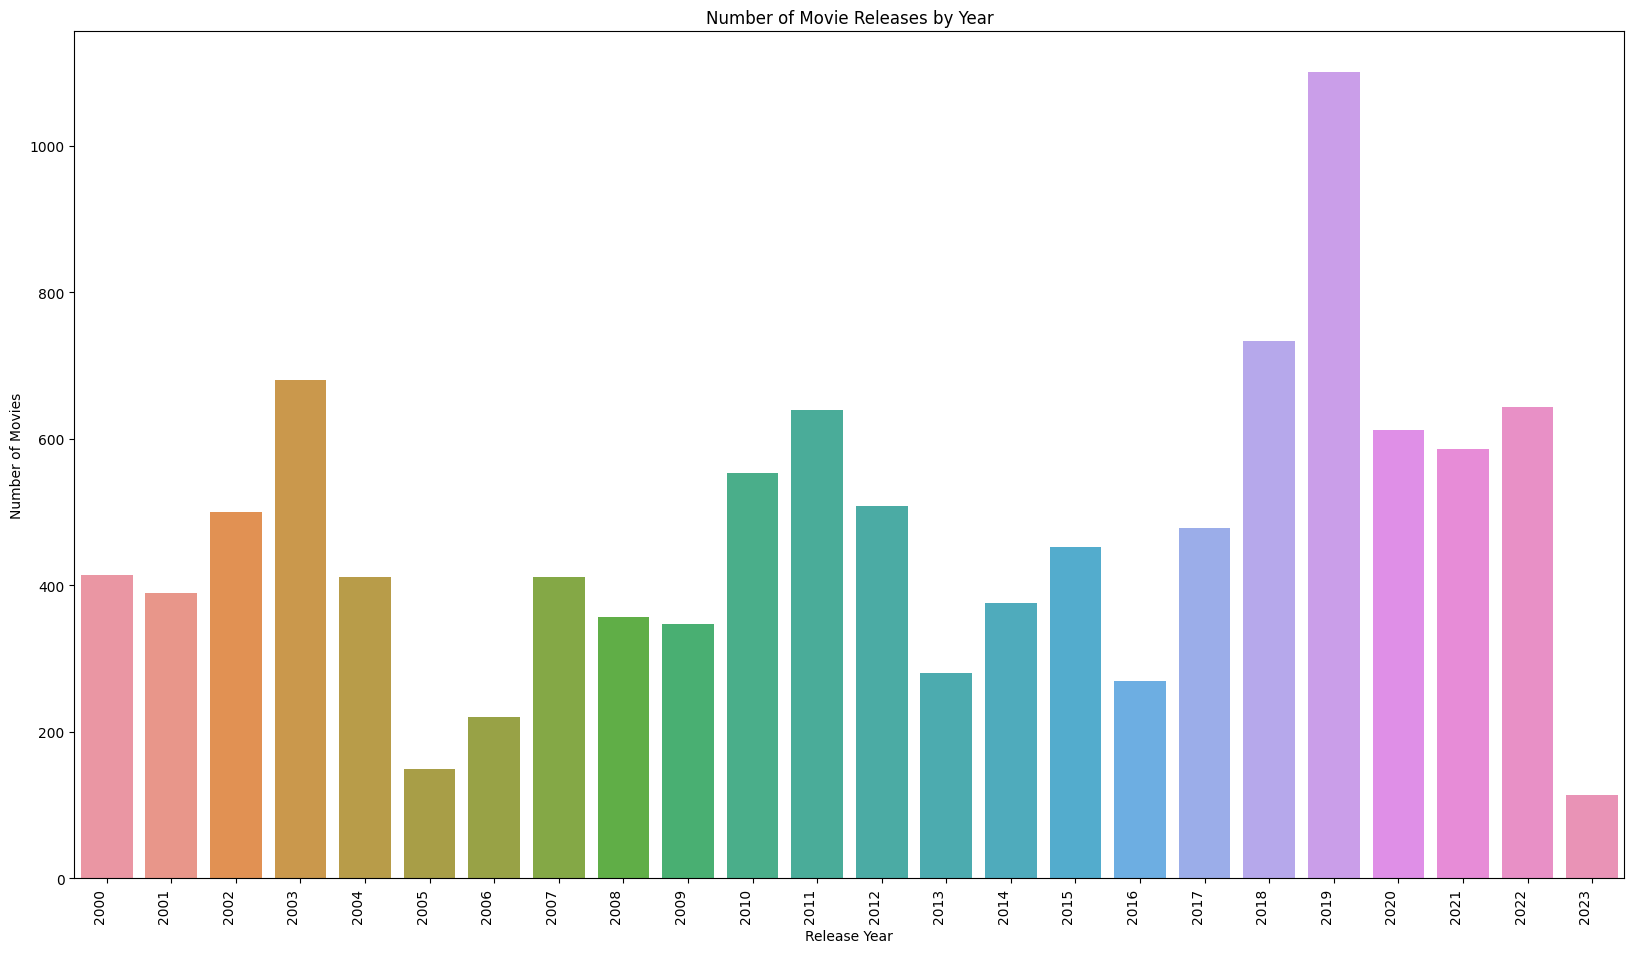

In [38]:
# Distribution of number of films during each year
plt.figure(figsize=(20, 11)) 
sns.countplot(x='startYear', data=df_filter)
plt.title('Number of Movie Releases by Year')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=90, ha='right')
plt.show

Text(45.991707561728376, 0.5, 'Number of Votes')

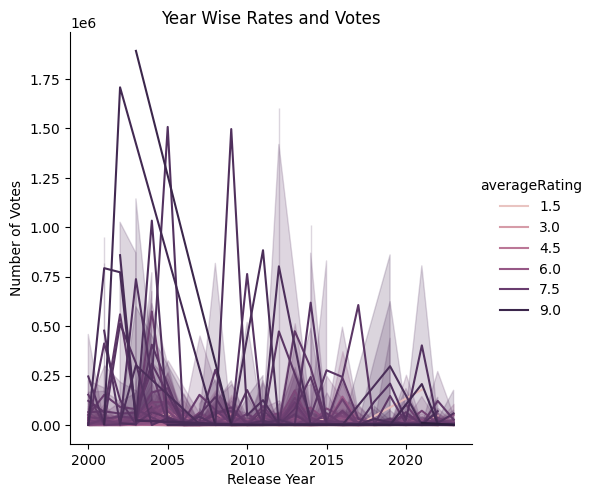

In [39]:
# Year x Average Rating
sns.relplot(
    data=df_filter, kind="line",
    x="startYear", y="numVotes",
    hue="averageRating",
)
plt.title('Year Wise Rates and Votes')
plt.xlabel('Release Year')
plt.ylabel('Number of Votes')

In [55]:
#Extracting additional date and time features from Timestamp
df_filter['release_date'] = df_filter['release_date'].astype(str)
df_filter['release_date'] = pd.to_datetime(df['release_date'])  # convert to datetime object

#df_filter['year'] = df['Timestamp'].dt.year  # extract year
df_filter['month'] = df_filter['release_date'].dt.month # extract month

df_filter['dayofweek'] = df_filter['release_date'].dt.dayofweek # day of the week 
df_filter[['month', 'dayofweek']] = df_filter[['month', 'dayofweek']].fillna(0).astype(int)

In [56]:
# should we remove release date if there are many NaNs??
df_filter[df_filter['release_date'].isna()].shape

(9102, 16)

In [57]:
df_filter.head() # to view the df

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,actor,actress,title,overview,release_date,month,dayofweek
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,118.0,"Comedy,Fantasy,Romance",6.4,86957,James Mangold,"Hugh Jackman, Liev Schreiber, Breckin Meyer",Meg Ryan,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,2001-12-25,12,1
1,tt0160256,The Unscarred,The Unscarred,2000,92.0,Thriller,5.7,207,Buddy Giovinazzo,"James Russo, Heino Ferch, Steven Waddington",Ornella Muti,The Unscarred,Four exchange students meet in Berlin 20 years...,2000-06-01,6,3
2,tt0160289,Four Dogs Playing Poker,Four Dogs Playing Poker,2000,97.0,"Crime,Drama,Mystery",5.5,1432,Paul Rachman,"Balthazar Getty, Jason Cairns","Olivia Williams, Arly Jover",Four Dogs Playing Poker,"With the help of their mentor Felix, a group o...",2000-06-06,6,1
3,tt0160399,Impostor,Impostor,2001,95.0,"Drama,Mystery,Sci-Fi",6.2,24178,Gary Fleder,"Shane Brolly, Vincent D'Onofrio, Gary Sinise",Madeleine Stowe,Impostor,A top-secret government weapons designer is ar...,2001-12-03,12,0
4,tt0160403,The Independent,The Independent,2000,81.0,Comedy,5.9,1349,Stephen Kessler,"Jerry Stiller, Max Perlich, Ted Demme",Janeane Garofalo,The Independent,A notorious B-movie director tries for a comeb...,2000-11-10,11,4


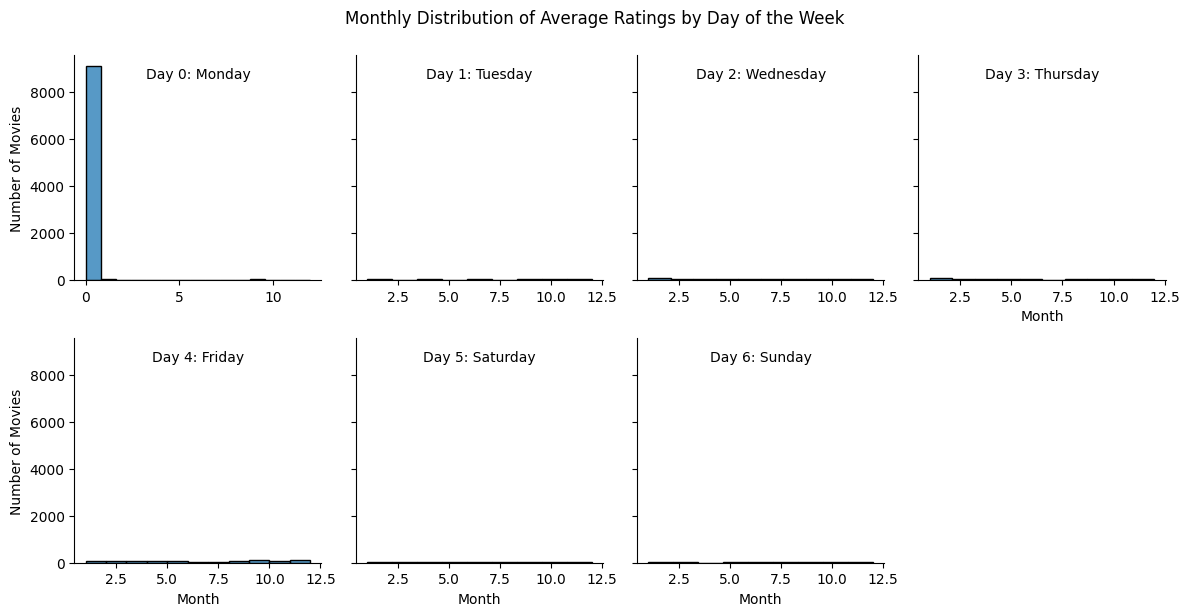

In [58]:
# Month wise and day wise split of Rating

g = sns.FacetGrid(df_filter, col="dayofweek", col_wrap=4, sharex=False)  
g.map(sns.histplot, "month")
g.fig.suptitle('Monthly Distribution of Average Ratings by Day of the Week', y=1.02)
g.set_axis_labels(x_var="Month", y_var="Number of Movies")
g.set_titles("")
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
for i, ax in enumerate(g.axes.flat):
    ax.text(0.5, 0.9, f'Day {i}: {day_names[i]}', transform=ax.transAxes, ha='center')
plt.show()

In [59]:
#  runtimeMinutes # 

# converting it to integers
df_filter['runtimeMinutes'] = pd.to_numeric(df_filter['runtimeMinutes'], errors='coerce')

<Axes: xlabel='runtimeMinutes'>

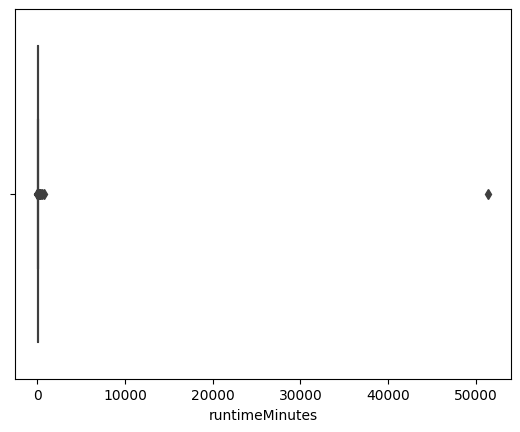

In [52]:
#viewng the outliers through boxplot
#plt.title('Outliers in Runtime')
#plt.xlabel('Runtime in Minutes')
sns.boxplot(x='runtimeMinutes', data=df_filter)

In [60]:
# Calculating the outliers through IQR methods

IQR = df_filter.runtimeMinutes.quantile(0.75) - df_filter.runtimeMinutes.quantile(0.25)
Lower_fence = (IQR * 1.5) - df_filter.runtimeMinutes.quantile(0.25) 
Upper_fence = (IQR * 1.5) + df_filter.runtimeMinutes.quantile(0.75) 
print('outliers are < {lowerboundary} or > {upperboundary}'.format(lowerboundary=Lower_fence, upperboundary=Upper_fence))

outliers are < -57.0 or > 145.0


In [61]:
#setting the range of runtimeMinutes and removing records that are outside its range
index = df_filter[(df_filter['runtimeMinutes'] <= 45)|(df_filter['runtimeMinutes'] >= 141)].index
df_filter.drop(index, inplace=True)
df_filter['runtimeMinutes'].describe()

count    10499.000000
mean        99.165635
std         15.592835
min         46.000000
25%         89.000000
50%         97.000000
75%        108.000000
max        140.000000
Name: runtimeMinutes, dtype: float64

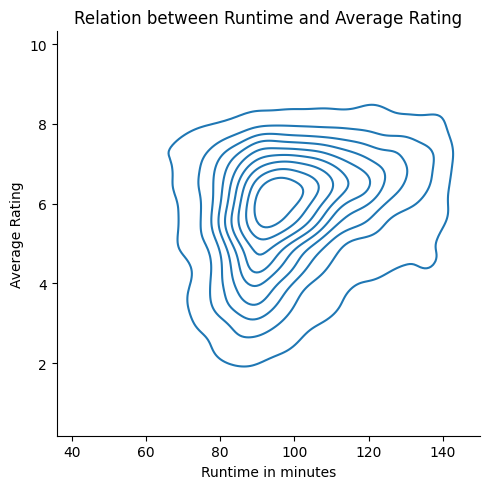

In [62]:
# Checking the realtion between ratings and runtime
sns.displot(data=df_filter, x="runtimeMinutes", y="averageRating", kind="kde")
plt.title('Relation between Runtime and Average Rating')
plt.xlabel('Runtime in minutes')
plt.ylabel('Average Rating')
plt.xscale('linear')
plt.tight_layout()
plt.show()

Text(37.722222222222214, 0.5, 'Average Rating')

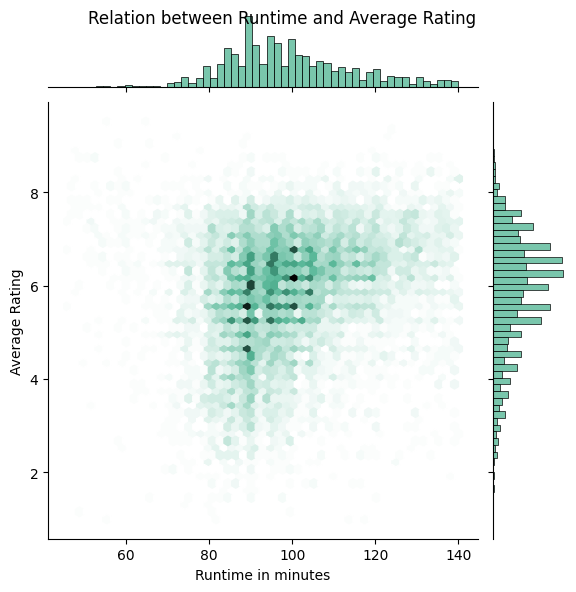

In [63]:
# Checking the realtion between ratings and runtime #2
sns.jointplot(x=df_filter['runtimeMinutes'], y=df_filter['averageRating'], kind="hex", color="#4CB391")
plt.suptitle('Relation between Runtime and Average Rating')
plt.xlabel('Runtime in minutes')
plt.ylabel('Average Rating')

In [64]:
#      isAdult   # 
df_filter.isAdult = df_filter.isAdult.astype(str)
df_filter['isAdult'].value_counts()

AttributeError: 'DataFrame' object has no attribute 'isAdult'

In [ ]:
#Deleting isAdult since the variability is really low
df_filter.drop('isAdult', axis=1, inplace=True)

In [ ]:
df_filter.info() # to view the data types of each variables

In [59]:
# isOriginal - Creating a new variable based on primarytitle and originaltitle
df_filter['isOriginal'] = (df_filter['primaryTitle'] == df_filter['originalTitle']).astype(str)
df_filter['isOriginal'].value_counts()

isOriginal
True     7282
False    3217
Name: count, dtype: int64

Text(22.569444444444443, 0.5, 'Original Movie or Not')

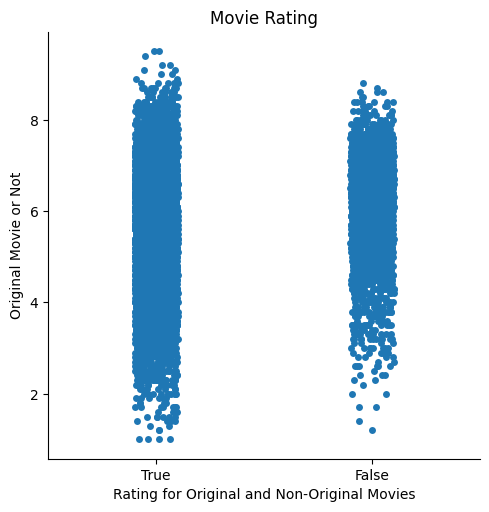

In [60]:
# isOriginal x Movie Rating
sns.catplot(data=df_filter, x="isOriginal", y="averageRating")
plt.title('Movie Rating')
plt.xlabel('Rating for Original and Non-Original Movies')
plt.ylabel('Original Movie or Not')

In [61]:
# isOriginal - Changing the values to integers
df_filter['isOriginal'] = (df_filter['primaryTitle'] == df_filter['originalTitle']).astype(int)
df_filter['isOriginal'].value_counts()

isOriginal
1    7282
0    3217
Name: count, dtype: int64

<Figure size 1000x600 with 0 Axes>

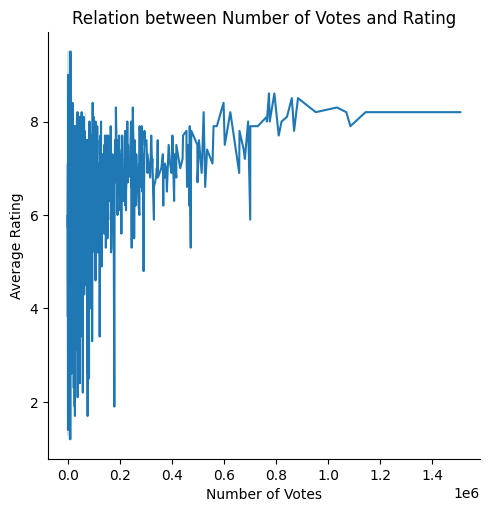

In [62]:
# Number of Votes
# Since the number of votes cannot be known before movie release, it hasn't been selected for modelling

plt.figure(figsize=(10, 6)) 
sns.relplot(data=df_filter, x="numVotes", y="averageRating", kind = 'line')
plt.title('Relation between Number of Votes and Rating')
plt.xlabel('Number of Votes')
plt.ylabel('Average Rating')
plt.show() 

In [63]:
#  Genres

# replacing the , with blank spaces in genres
df_filter['genres'] = df_filter['genres'].str.replace(',', ' ')
df_filter.genres.head()

0    Comedy Fantasy Romance
1                  Thriller
2       Crime Drama Mystery
3      Drama Mystery Sci-Fi
4                    Comedy
Name: genres, dtype: object

In [64]:
# Identifying the most frequent genres
df_filter.genres.str.split().explode().apply(lambda x: x.strip()).loc[lambda x: x.str.len() > 3].value_counts().head(26)

genres
Drama          5363
Comedy         3382
Thriller       1667
Romance        1503
Action         1403
Horror         1317
Crime          1259
Documentary    1012
Adventure       849
Mystery         693
Biography       502
Family          488
Fantasy         444
Sci-Fi          398
Animation       370
History         321
Music           285
Sport           220
Musical          94
Western          41
News             26
Adult             4
Reality-TV        3
Name: count, dtype: int64

In [65]:
# Creating a seperate dataset with each genres as columnhead and binary values
df_genre = df_filter['genres'].str.get_dummies(sep=' ')
df_genre.head()

,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 1.0, 'Genre Correlation Chart')

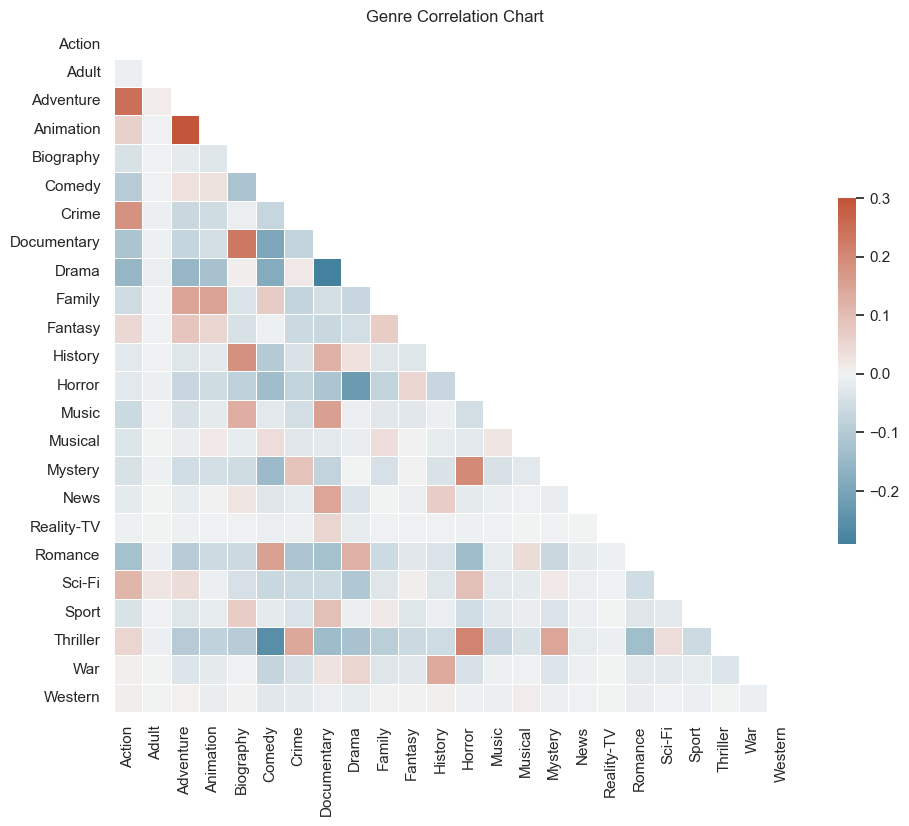

In [66]:
# Creating a heat map of Genre
sns.set_theme(style="white")
corr = df_genre.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Genre Correlation Chart')

In [67]:
# Extracting the number of movies under each genre and their runtime
genre_counts = df_genre.columns.tolist()
result_data = []

for genre in genre_counts:
    genre_movies = df_filter[df_filter['genres'].apply(lambda x: genre in x)]
    num_movies = len(genre_movies)
    avg_runtime = genre_movies['runtimeMinutes'].mean() if num_movies > 0 else 0
    result_data.append([genre, num_movies, avg_runtime])

# Create the new DataFrame
df_new = pd.DataFrame(result_data, columns=['Genre', 'Number_of_Movies', 'Average_Runtime'])

# Print or use df_new as needed
print(df_new)

          Genre  Number_of_Movies  Average_Runtime
0        Action              1403       103.062723
1         Adult                 4        93.000000
2     Adventure               849        98.945819
3     Animation               370        90.332432
4     Biography               502       103.623506
5        Comedy              3382        98.726198
6         Crime              1259       102.459889
7   Documentary              1012        89.485178
8         Drama              5363       102.504941
9        Family               488        95.397541
10      Fantasy               444       100.317568
11      History               321       105.024922
12       Horror              1317        92.214882
13        Music               373       101.579088
14      Musical                94       105.531915
15      Mystery               693       100.880231
16         News                26        83.000000
17   Reality-TV                 3        83.666667
18      Romance              15

In [68]:
df_filter.head() # to view the changes

,tconst,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,actor,actress,title,overview,release_date,month,dayofweek,isOriginal
0,tt0035423,Kate & Leopold,Kate & Leopold,2001,118.0,Comedy Fantasy Romance,6.4,86957,James Mangold,"Hugh Jackman, Liev Schreiber, Breckin Meyer",Meg Ryan,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,2001-12-25,12,1,1
1,tt0160256,The Unscarred,The Unscarred,2000,92.0,Thriller,5.7,207,Buddy Giovinazzo,"James Russo, Heino Ferch, Steven Waddington",Ornella Muti,The Unscarred,Four exchange students meet in Berlin 20 years...,2000-06-01,6,3,1
2,tt0160289,Four Dogs Playing Poker,Four Dogs Playing Poker,2000,97.0,Crime Drama Mystery,5.5,1432,Paul Rachman,"Balthazar Getty, Jason Cairns","Olivia Williams, Arly Jover",Four Dogs Playing Poker,"With the help of their mentor Felix, a group o...",2000-06-06,6,1,1
3,tt0160399,Impostor,Impostor,2001,95.0,Drama Mystery Sci-Fi,6.2,24178,Gary Fleder,"Shane Brolly, Vincent D'Onofrio, Gary Sinise",Madeleine Stowe,Impostor,A top-secret government weapons designer is ar...,2001-12-03,12,0,1
4,tt0160403,The Independent,The Independent,2000,81.0,Comedy,5.9,1349,Stephen Kessler,"Jerry Stiller, Max Perlich, Ted Demme",Janeane Garofalo,The Independent,A notorious B-movie director tries for a comeb...,2000-11-10,11,4,1


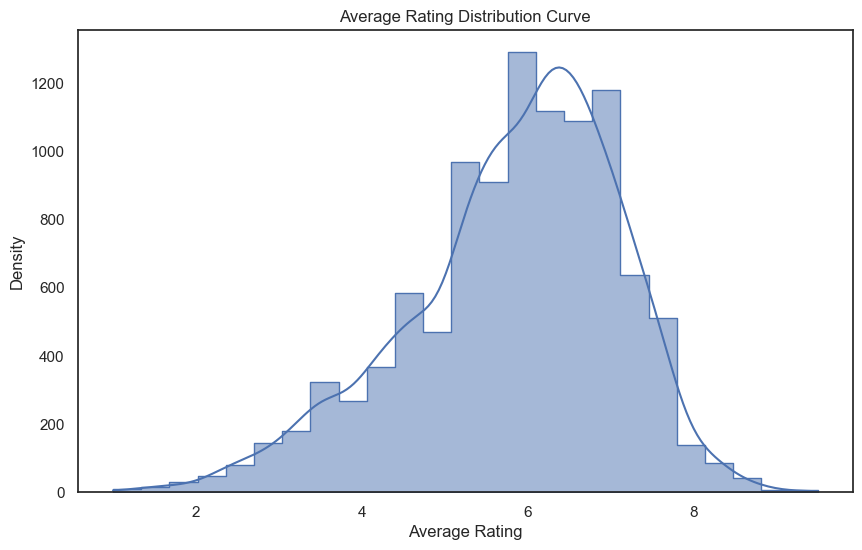

In [69]:
#   Average Rating
# Create a histogram and density plot
plt.figure(figsize=(10, 6))
sns.histplot(df_filter['averageRating'], kde=True, element='step', bins=25)
plt.title("Average Rating Distribution Curve")
plt.xlabel("Average Rating")
plt.ylabel("Density")
plt.show()


In [70]:
# Checking the normality of Rating with Shapiro-Wilk test

data = df_filter['averageRating']
statistic, p_value = stats.shapiro(data)

# Print the test statistic and p-value
print("Shapiro-Wilk Test Statistic:", statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # significance level
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject the null hypothesis)")
else:
    print("The data does not appear to be normally distributed (reject the null hypothesis)")

Shapiro-Wilk Test Statistic: 0.9731793403625488
P-value: 2.8582424906679726e-40
The data does not appear to be normally distributed (reject the null hypothesis)


/usr/local/lib/python3.9/site-packages/scipy/stats/_morestats.py:1816: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [90]:
# Saving the df for storage
df_filter = pd.read_csv('~/Downloads/df_filter.csv')

## Step 3. Feature Encoding

In [92]:
# Apply one-hot encoding to GENRE
genre_dummies = df_filter['genres'].str.get_dummies(sep=',')
df_filter 

In [93]:
df_filter.head() # to view the changes

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,Musical,Mystery,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western
0,tt0035423,movie,Kate & Leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,86957,James Mangold,...,0,0,0,0,1,0,0,0,0,0
1,tt0088751,movie,The Naked Monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5.2,335,"Wayne Berwick, Ted Newsom",...,0,0,0,0,0,1,0,0,0,0
2,tt0100275,movie,The Wandering Soap Opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,346,"Raúl Ruiz, Valeria Sarmiento",...,0,0,0,0,0,0,0,0,0,0
3,tt0103340,movie,Life for Life: Maximilian Kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6.3,352,Krzysztof Zanussi,...,0,0,0,0,0,0,0,0,0,0
4,tt0113506,movie,Justifiable Homicide,Justifiable Homicide,2002,85,Documentary,4.3,240,Jon Osman,...,0,0,0,0,0,0,0,0,0,0


In [97]:
df_filter.info() # to view the list of variables and their data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29236 entries, 0 to 29235
Data columns (total 40 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tconst          29236 non-null  object
 1   titleType       29236 non-null  object
 2   primaryTitle    29236 non-null  object
 3   originalTitle   29236 non-null  object
 4   startYear       29236 non-null  int64 
 5   runtimeMinutes  29236 non-null  int64 
 6   genres          29236 non-null  object
 7   averageRating   29236 non-null  int64 
 8   numVotes        29236 non-null  int64 
 9   director        29236 non-null  object
 10  actor           25755 non-null  object
 11  actress         23227 non-null  object
 12  title           28783 non-null  object
 13  overview        28141 non-null  object
 14  release_date    28736 non-null  object
 15  isOriginal      29236 non-null  bool  
 16  Action          29236 non-null  int64 
 17  Adult           29236 non-null  int64 
 18  Advent

In [94]:
## Categorical Errors ##

#Changing the datatype of Rating
df_filter['averageRating'] = df_filter['averageRating'].astype(int)


In [98]:
#Extracting additional date and time features from Timestamp
df_filter['release_date'] = df_filter['release_date'].astype(str)
df_filter['release_date'] = pd.to_datetime(df['release_date'])  # convert to datetime object

#df_filter['year'] = df['Timestamp'].dt.year  # extract year
df_filter['month'] = df_filter['release_date'].dt.month # extract month

df_filter['dayofweek'] = df_filter['release_date'].dt.dayofweek # day of the week 
df_filter[['month', 'dayofweek']] = df_filter[['month', 'dayofweek']].fillna(0).astype(int)

In [100]:
# Creating a subset with only the numerical variables to generate the heatmap
col_dorp_corr = ['tconst', 'titleType', 'originalTitle', 'primaryTitle', 'genres', 'director',
                   'actor', 'actress', 'title', 'overview', 'release_date', 'isOriginal']
df_cum_corr = df_filter.drop(columns=col_dorp_corr)

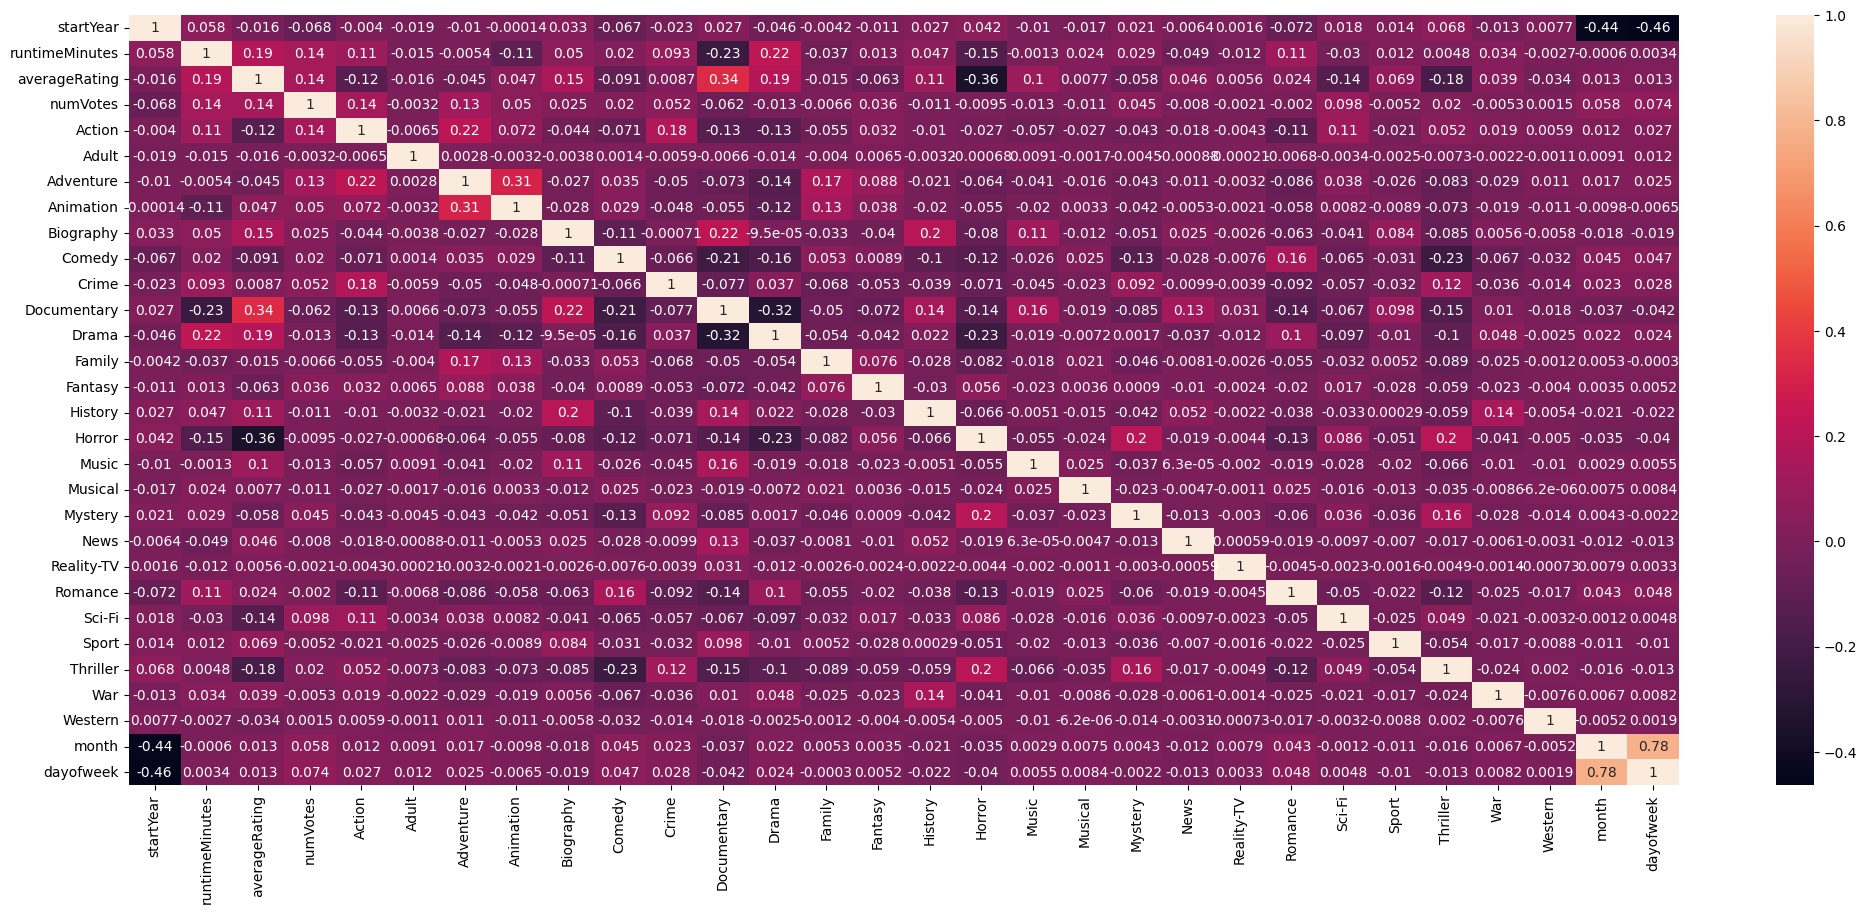

In [101]:
# Correlation heatmap
cor_matrix = df_cum_corr.corr()
plt.subplots(figsize=(25,10))
sns.heatmap(cor_matrix, annot = True)
plt.show()

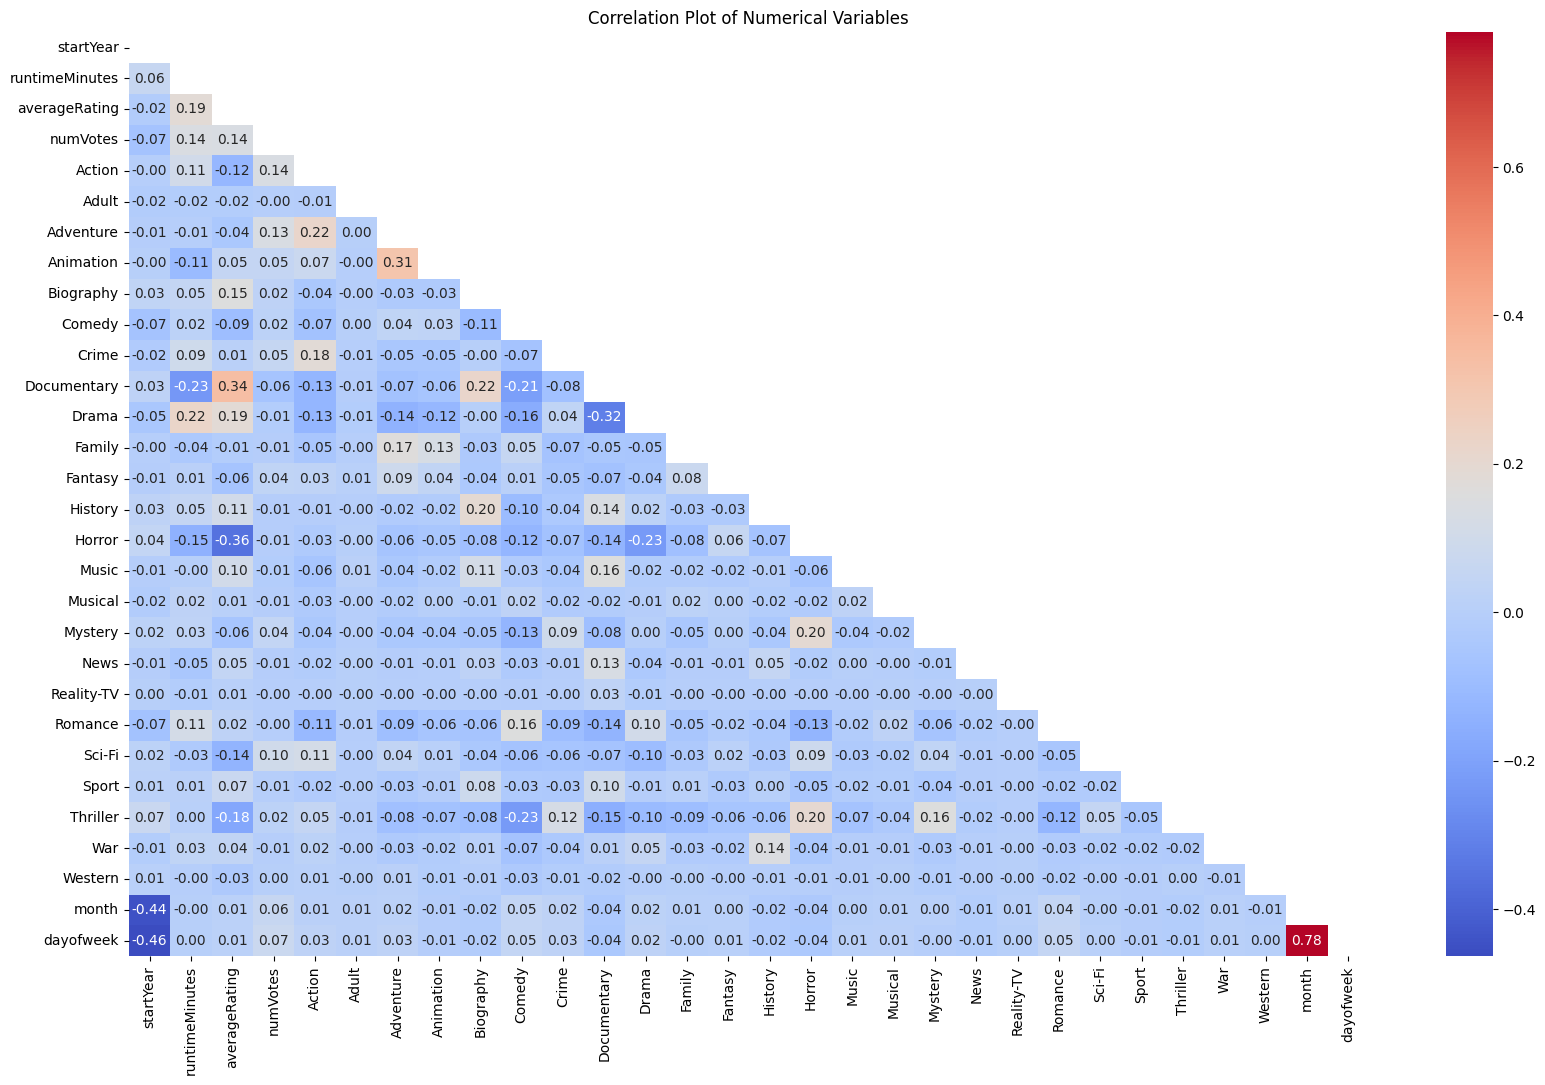

In [102]:
# Correlation map with better visibility 

# Mask the upper triangular part of the matrix
mask = np.triu(cor_matrix)
plt.figure(figsize=(20,12)) 
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', mask=mask, fmt=".2f")
plt.title("Correlation Plot of Numerical Variables")
plt.show()

In [104]:
#   primaryTitle

#Making statement text in lowercase
df_filter['primaryTitle']=df_filter['primaryTitle'].str.lower()
df_filter['primaryTitle'].tail()

29231      life without sara amat
29232              blind ambition
29233                   safeguard
29234    il talento del calabrone
29235                       coven
Name: primaryTitle, dtype: object

In [60]:
#Removing the stop words from the tweets
stop = stopwords.words('english')
df_filter['primaryTitle']=df_filter['primaryTitle'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df_filter.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,actor,actress,title,overview,release_date,isOriginal
0,tt0035423,movie,kate & leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6.4,86957,James Mangold,"Hugh Jackman, Liev Schreiber, Breckin Meyer",Meg Ryan,Kate & Leopold,When her scientist ex-boyfriend discovers a po...,2001-12-25,True
1,tt0088751,movie,naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5.2,335,"Wayne Berwick, Ted Newsom","Kenneth Tobey, R.G. Wilson, John Goodwin",Brinke Stevens,The Naked Monster,Using soundtracks and extensive footage from m...,2005-04-22,True
2,tt0100275,movie,wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6.5,346,"Raúl Ruiz, Valeria Sarmiento","Luis Alarcón, Francisco Reyes","Patricia Rivadeneira, Consuelo Castillo",The Wandering Soap Opera,The film revolves around the concept of soap o...,2017-08-10,False
3,tt0103340,movie,life life: maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6.3,352,Krzysztof Zanussi,"Edward Zentara, Christoph Waltz, Artur Barcis,...",NaN,Life for Life: Maximilian Kolbe,The story of catholic saint Maximilian Kolbe (...,1991-04-01,False
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4.3,240,Jon Osman,NaN,NaN,Justifiable Homicide,In 1995 three Puerto Rican teenagers enter an ...,2002-12-06,True


In [105]:
#Cleaning and removing punctuations
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df_filter['primaryTitle']=df_filter['primaryTitle'].apply(lambda x: cleaning_punctuations(x))
df_filter['primaryTitle'].tail()

29231      life without sara amat
29232              blind ambition
29233                   safeguard
29234    il talento del calabrone
29235                       coven
Name: primaryTitle, dtype: object

In [106]:
#Cleaning and removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df_filter['primaryTitle']=df_filter['primaryTitle'].apply(lambda x: cleaning_numbers(x))
df_filter['primaryTitle'].tail()

29231      life without sara amat
29232              blind ambition
29233                   safeguard
29234    il talento del calabrone
29235                       coven
Name: primaryTitle, dtype: object

In [108]:
pip install spacy

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [109]:
pip install https://github.com/explosion/spacy-models/releases/download/en_core_web_sm-3.0.0/en_core_web_sm-3.0.0.tar.gz

DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.7/13.7 MB 27.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
DEPRECATION: Configuring installation scheme with distutils config files is deprecated and will no longer work in the near future. If you are using a Homebrew or Linuxbrew Python, please see discussion at https://github.com/Homebrew/homebrew-core/issues/76621

[notice] A new release of pip is available: 23.1.1 -> 23.2.1
[notice] To update, run: python3.9 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [110]:
#Applying lemmatizer 
import spacy
import en_core_web_sm
nlp = spacy.load('en_core_web_sm')
nlp.disable_pipes('ner', 'tagger', 'parser')
print(nlp.pipe_names)
#nlp = spacy.load('en_core_web_sm',disable=['ner','parser'])
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df_filter['primaryTitle']= df_filter['primaryTitle'].apply(space)
df_filter.head(20)

/usr/local/lib/python3.9/site-packages/spacy/util.py:887: UserWarning: [W095] Model 'en_core_web_sm' (3.0.0) was trained with spaCy v3.0 and may not be 100% compatible with the current version (3.5.2). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


['tok2vec', 'attribute_ruler', 'lemmatizer']


/usr/local/lib/python3.9/site-packages/spacy/pipeline/lemmatizer.py:211: UserWarning: [W108] The rule-based lemmatizer did not find POS annotation for one or more tokens. Check that your pipeline includes components that assign token.pos, typically 'tagger'+'attribute_ruler' or 'morphologizer'.
  oov_forms = []


,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,News,Reality-TV,Romance,Sci-Fi,Sport,Thriller,War,Western,month,dayofweek
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,0,0,1,0,0,0,0,0,12,1
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,0,0,0,1,0,0,0,0,6,3
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,0,0,0,0,0,0,0,0,6,1
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,0,0,0,0,0,0,0,0,12,0
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,0,0,0,0,0,0,0,0,11,4
5,tt0124889,movie,sticks,Sticks,2001,92,"Comedy,Crime",5,112,Brett Mayer,...,0,0,0,0,0,0,0,0,9,5
6,tt0125022,movie,heartbreakers,Heartbreakers,2001,123,"Comedy,Crime,Romance",6,56421,David Mirkin,...,0,0,1,0,0,0,0,0,1,4
7,tt0126029,movie,shrek,Shrek,2001,90,"Adventure,Animation,Comedy",7,702049,"Andrew Adamson, Vicky Jenson",...,0,0,0,0,0,0,0,0,10,4
8,tt0126899,movie,eyes are upon you,Eyes Are Upon You,2001,92,"Crime,Thriller",2,111,David A. Goldberg,...,0,0,0,0,0,1,0,0,8,4
9,tt0128216,movie,flophouse,Flophouse,2002,75,Comedy,3,294,Chris Claridge,...,0,0,0,0,0,0,0,0,7,4


In [111]:
#finding the most frequent words

df_filter.primaryTitle.str.split().explode().dropna().apply(lambda x: x.strip()).loc[lambda x: x.str.len() > 3].value_counts().head(20)


primaryTitle
love         527
story        254
life         250
last         236
night        222
movie        216
from         188
with         179
dead         176
girl         159
house        152
time         150
world        147
black        143
little       130
dark         129
days         127
american     116
christmas    115
blood        114
Name: count, dtype: int64

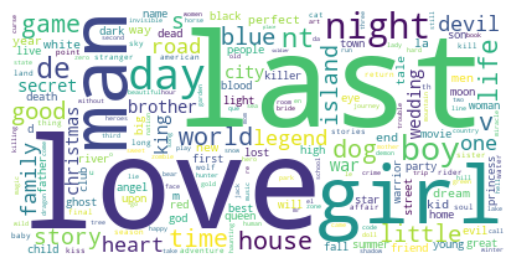

In [112]:
# Creating a wordcloud

# Creating the text variable
text = " ".join(cat.split()[1] if len(cat.split()) > 1 else '' for cat in df_filter.primaryTitle)
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [113]:
#Creating function to find Subjectivity and Polarity

def getSubjectivity(data):
    return TextBlob(data).sentiment.subjectivity
def getPolarity(data):
    return TextBlob(data).sentiment.polarity

df_filter['Subjectivity'] = df_filter['primaryTitle'].apply(getSubjectivity)
df_filter['Polarity'] = df_filter['primaryTitle'].apply(getPolarity )

In [114]:
#to get the text sentiment

def getSentiment(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

In [115]:
#creating tect sentiment column
df_filter['Sentiment'] = df_filter['Polarity'].apply(getSentiment)
df_filter.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,Sci-Fi,Sport,Thriller,War,Western,month,dayofweek,Subjectivity,Polarity,Sentiment
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,0,0,0,0,0,12,1,0.0,0.0,Neutral
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,1,0,0,0,0,6,3,0.4,0.0,Neutral
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,0,0,0,0,0,6,1,0.0,0.0,Neutral
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,0,0,0,0,0,12,0,0.0,0.0,Neutral
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,0,0,0,0,0,11,4,0.0,0.0,Neutral


In [116]:
# Encoding sentiments 

# Create a LabelEncoder instance
label_encoder = LabelEncoder()
df_filter['sentiment_encoded'] = label_encoder.fit_transform(df_filter['Sentiment'])
df_filter.head() # to view the change

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,Sport,Thriller,War,Western,month,dayofweek,Subjectivity,Polarity,Sentiment,sentiment_encoded
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,0,0,0,0,12,1,0.0,0.0,Neutral,1
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,0,0,0,0,6,3,0.4,0.0,Neutral,1
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,0,0,0,0,6,1,0.0,0.0,Neutral,1
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,0,0,0,0,12,0,0.0,0.0,Neutral,1
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,0,0,0,0,11,4,0.0,0.0,Neutral,1


In [119]:
# Checking the variability
value_counts = df_filter['sentiment_encoded'].value_counts()
value_counts

sentiment_encoded
1    24433
2     2628
0     2175
Name: count, dtype: int64

In [120]:
# Creating WordCount in PrimaryTitles

# Create a function to count words in a given text
def count_words(text):
    words = text.split()
    return len(words)
df_filter['word_count'] = df_filter['originalTitle'].apply(count_words)
df_filter.head() # view changes

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,Thriller,War,Western,month,dayofweek,Subjectivity,Polarity,Sentiment,sentiment_encoded,word_count
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,0,0,0,12,1,0.0,0.0,Neutral,1,3
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,0,0,0,6,3,0.4,0.0,Neutral,1,3
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,0,0,0,6,1,0.0,0.0,Neutral,1,3
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,0,0,0,12,0,0.0,0.0,Neutral,1,5
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,0,0,0,11,4,0.0,0.0,Neutral,1,2


In [225]:
# extracting features from "overview" using TF-IDF

# creating a variable with the title details
text_data = df_filter2['overview'].fillna("")
stop = stopwords.words('english')
# converting it to vector
vectorizer = TfidfVectorizer(stop_words = stop, min_df=0.01, max_df=0.8, max_features=50, analyzer="word", ngram_range=(1,2))
tfidf_features = vectorizer.fit_transform(text_data)

# extracting feature names
tfidf_tokens = vectorizer.get_feature_names_out()
print(tfidf_tokens)

count_array = tfidf_features.toarray()

df_titlevector = pd.DataFrame(data=count_array,columns = vectorizer.get_feature_names_out())
df_titlevector.head(100) # view changes

['back' 'becomes' 'city' 'daughter' 'day' 'death' 'family' 'father' 'film'
 'find' 'finds' 'first' 'friend' 'friends' 'get' 'girl' 'group' 'help'
 'home' 'life' 'lives' 'love' 'make' 'man' 'mother' 'must' 'new' 'night'
 'old' 'one' 'people' 'school' 'son' 'story' 'take' 'takes' 'three' 'time'
 'together' 'town' 'two' 'war' 'way' 'wife' 'woman' 'world' 'year'
 'year old' 'years' 'young']


,back,becomes,city,daughter,day,death,family,father,film,find,finds,first,friend,friends,get,girl,group,help,home,life,lives,love,make,man,mother,must,new,night,old,one,people,school,son,story,take,takes,three,time,together,town,two,war,way,wife,woman,world,year,year old,years,young
0,0.321187,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.330996,0.000000,0.887288,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.593549,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.617054,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.516667,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,1.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.590816,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.342251,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.491834,0.0,0.000000,0.0,0.0,0.0,0.000000,0.328878,0.000000,0.0,0.0,0.271969,0.0,0.331319,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.292202,0.000000,0.0,0.340986,0.0,0.0,0.000000,0.0,0.336964,0.0,0.225274,0.0,0.270531,0.000000,0.000000,0.0,0.0,0.000000,0.349890,0.000000,0.000000,0.0,0.662151,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0
96,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.474306,0.0,0.000000,0.0,0.0,0.470559,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.516262,0.000000,0.358913,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.397823,0.0,0.0,0.000000,0.0
97,0.000000,0.0,0.0,0.0,0.0,0.0,0.530552,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.532055,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.659873,0.0,0.000000,0.0,0.0,0.000000,0.0
98,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,1.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0


In [122]:
# DIRECTOR

# split the actor column into several columns using pd.Series.str.split()
# new data frame with split value columns
new = df_filter['director'].str.split(",", expand = True)
 
for n, col in enumerate(new.columns):
    # making separate actor1, actor2, actor3 columns from new data frame
    df_filter[f"director{col}"]= new[col]

# view the updated DataFrame
df_filter.head()

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,director0,director1,director2,director3,director4,director5,director6,director7,director8,director9
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,James Mangold,None,None,None,None,None,None,None,None,None
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,Wayne Berwick,Ted Newsom,None,None,None,None,None,None,None,None
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,Raúl Ruiz,Valeria Sarmiento,None,None,None,None,None,None,None,None
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,Krzysztof Zanussi,None,None,None,None,None,None,None,None,None
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,Jon Osman,None,None,None,None,None,None,None,None,None


In [123]:
# for computational ease, for the moment, we are only considering one director per film
# therfore, the extra columns were deleted
columns_to_drop = ['director1', 'director2', 'director3', 'director4', 'director5', 'director6','director7','director8','director9',]
df_filter = df_filter.drop(columns=columns_to_drop)

In [124]:
df_filter.info() # view the changes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29236 entries, 0 to 29235
Data columns (total 48 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   tconst             29236 non-null  object        
 1   titleType          29236 non-null  object        
 2   primaryTitle       29236 non-null  object        
 3   originalTitle      29236 non-null  object        
 4   startYear          29236 non-null  int64         
 5   runtimeMinutes     29236 non-null  int64         
 6   genres             29236 non-null  object        
 7   averageRating      29236 non-null  int64         
 8   numVotes           29236 non-null  int64         
 9   director           29236 non-null  object        
 10  actor              25755 non-null  object        
 11  actress            23227 non-null  object        
 12  title              28783 non-null  object        
 13  overview           28141 non-null  object        
 14  releas

In [125]:
# Encoding director 

label_encoder = LabelEncoder()
df_filter['director_encoded'] = label_encoder.fit_transform(df_filter['director0'])
df_filter.head() # view changes

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,Western,month,dayofweek,Subjectivity,Polarity,Sentiment,sentiment_encoded,word_count,director0,director_encoded
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,0,12,1,0.0,0.0,Neutral,1,3,James Mangold,7867
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,0,6,3,0.4,0.0,Neutral,1,3,Wayne Berwick,19322
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,0,6,1,0.0,0.0,Neutral,1,3,Raúl Ruiz,15327
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,0,12,0,0.0,0.0,Neutral,1,5,Krzysztof Zanussi,10485
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,0,11,4,0.0,0.0,Neutral,1,2,Jon Osman,9125


In [126]:
# Checking the frequency
value_counts = df_filter['director_encoded'].value_counts()
value_counts

director_encoded
17970    23
1146     16
1153     15
11864    15
15173    15
         ..
14267     1
15696     1
9362      1
3822      1
14078     1
Name: count, Length: 19992, dtype: int64

In [128]:
# Considering the high variability of the features,
# directors has been binned into serperate categories based on the number of movies they have worked with

# Calculate the count of each director_encoded value and store it in a dictionary
director_count = df_filter['director_encoded'].value_counts().to_dict()

# Define a function to map counts to categories
def categorize_director(count):
    if count >= 15:
        return 5
    elif 10 <= count <= 14:
        return 4
    elif 6 <= count <= 9:
        return 3
    elif 2 <= count <= 5:
        return 2
    else:
        return 1

# Create the new 'director_cat' column by mapping counts to categories
df_filter['director_cat'] = df_filter['director_encoded'].map(director_count).apply(categorize_director)


In [129]:
# rechecking its variability
value_counts = df_filter['director_cat'].value_counts()
value_counts

director_cat
1    14803
2    12560
3     1542
4      247
5       84
Name: count, dtype: int64

In [130]:
# split the actor column into several columns 
# new data frame with split value columns
new = df_filter['actor'].str.split(",", expand = True)
for n, col in enumerate(new.columns):
    # making separate actor1, actor2, actor3 columns from new data frame
    df_filter[f"actor{col}"]= new[col]


df_filter.head()# view the updated DataFrame

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,director_cat,actor0,actor1,actor2,actor3,actor4,actor5,actor6,actor7,actor8
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,2,Hugh Jackman,Liev Schreiber,Breckin Meyer,None,None,None,None,None,None
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,1,Kenneth Tobey,R.G. Wilson,John Goodwin,None,None,None,None,None,None
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,3,Luis Alarcón,Francisco Reyes,None,None,None,None,None,None,None
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,2,Edward Zentara,Christoph Waltz,Artur Barcis,Gustaw Lutkiewicz,None,None,None,None,None
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:
# split the actress column into several columns 

# new data frame with split value columns
new = df_filter['actress'].str.split(",", expand = True)
for n, col in enumerate(new.columns):
        df_filter[f"actress{col}"]= new[col]

df_filter.head() # view the updated DataFrame

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,actor7,actor8,actress0,actress1,actress2,actress3,actress4,actress5,actress6,actress7
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,None,None,Meg Ryan,None,None,None,None,None,None,None
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,None,None,Brinke Stevens,None,None,None,None,None,None,None
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,None,None,Patricia Rivadeneira,Consuelo Castillo,None,None,None,None,None,None
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,None,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [132]:
# for computational ease, it was decided to keep only one actor and actress for each movie
columns_to_drop5 = ['actress1', 'actress2', 'actress3', 'actress4', 'actress5', 'actress6', 'actress7',
                   'actor1', 'actor2', 'actor3', 'actor4', 'actor5', 'actor6', 'actor7', 'actor8']
df_filter = df_filter.drop(columns=columns_to_drop5)


In [133]:
# Encoding actor


label_encoder = LabelEncoder()
df_filter['actor0_encoded'] = label_encoder.fit_transform(df_filter['actor0'])
df_filter.head() # view the updated DataFrame

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,Polarity,Sentiment,sentiment_encoded,word_count,director0,director_encoded,director_cat,actor0,actress0,actor0_encoded
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,0.0,Neutral,1,3,James Mangold,7867,2,Hugh Jackman,Meg Ryan,5978
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,0.0,Neutral,1,3,Wayne Berwick,19322,1,Kenneth Tobey,Brinke Stevens,8427
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,0.0,Neutral,1,3,Raúl Ruiz,15327,3,Luis Alarcón,Patricia Rivadeneira,9304
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,0.0,Neutral,1,5,Krzysztof Zanussi,10485,2,Edward Zentara,NaN,4290
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,0.0,Neutral,1,2,Jon Osman,9125,2,NaN,NaN,16421


In [134]:
# Check its distribution
value_counts = df_filter['actor0_encoded'].value_counts()
value_counts

actor0_encoded
16421    3481
11324      29
4514       28
9523       25
9114       23
         ... 
11273       1
2544        1
8600        1
14058       1
11813       1
Name: count, Length: 16422, dtype: int64

In [135]:
# Similar to director, actor was binned based on their number of works

# Calculate the count of each actor0_encoded value and store it in a dictionary
actor_count = df_filter['actor0_encoded'].value_counts().to_dict()

# Define a function to map counts to categories
def categorize_actor(count):
    if count >= 15:
        return 5
    elif 10 <= count <= 14:
        return 4
    elif 6 <= count <= 9:
        return 3
    elif 2 <= count <= 5:
        return 2
    else:
        return 1

# Create the new 'actor0_cat' column by mapping counts to categories
df_filter['actor0_cat'] = df_filter['actor0_encoded'].map(actor_count).apply(categorize_actor)


In [136]:
# checking its distribution
value_counts = df_filter['actor0_cat'].value_counts()
value_counts

actor0_cat
1    12624
2     8797
5     3795
3     2698
4     1322
Name: count, dtype: int64

In [137]:
# Encoding actres

label_encoder = LabelEncoder()
df_filter['actress0_encoded'] = label_encoder.fit_transform(df_filter['actress0'])

df_filter.head() # view the changes

,tconst,titleType,primaryTitle,originalTitle,startYear,runtimeMinutes,genres,averageRating,numVotes,director,...,sentiment_encoded,word_count,director0,director_encoded,director_cat,actor0,actress0,actor0_encoded,actor0_cat,actress0_encoded
0,tt0035423,movie,kate leopold,Kate & Leopold,2001,118,"Comedy,Fantasy,Romance",6,86957,James Mangold,...,1,3,James Mangold,7867,2,Hugh Jackman,Meg Ryan,5978,4,9403
1,tt0088751,movie,the naked monster,The Naked Monster,2005,100,"Comedy,Horror,Sci-Fi",5,335,"Wayne Berwick, Ted Newsom",...,1,3,Wayne Berwick,19322,1,Kenneth Tobey,Brinke Stevens,8427,1,2080
2,tt0100275,movie,the wandering soap opera,La Telenovela Errante,2017,80,"Comedy,Drama,Fantasy",6,346,"Raúl Ruiz, Valeria Sarmiento",...,1,3,Raúl Ruiz,15327,3,Luis Alarcón,Patricia Rivadeneira,9304,1,11009
3,tt0103340,movie,life for life maximilian kolbe,Zycie za zycie. Maksymilian Kolbe,2006,90,"Biography,Drama",6,352,Krzysztof Zanussi,...,1,5,Krzysztof Zanussi,10485,2,Edward Zentara,NaN,4290,1,14799
4,tt0113506,movie,justifiable homicide,Justifiable Homicide,2002,85,Documentary,4,240,Jon Osman,...,1,2,Jon Osman,9125,2,NaN,NaN,16421,5,14799


In [138]:
# Similar to director and actor, they were binned based on experience

# Calculate the count of each actor0_encoded value and store it in a dictionary
actor_count = df_filter['actress0_encoded'].value_counts().to_dict()

# Define a function to map counts to categories
def categorize_actress(count):
    if count >= 15:
        return 5
    elif 10 <= count <= 14:
        return 4
    elif 6 <= count <= 9:
        return 3
    elif 2 <= count <= 5:
        return 2
    else:
        return 1

# Create the new 'actor0_cat' column by mapping counts to categories
df_filter['actress0_cat'] = df_filter['actress0_encoded'].map(actor_count).apply(categorize_actor)

In [139]:
# Checking its distribution
value_counts = df_filter['actress0_cat'].value_counts()
value_counts

actress0_cat
1    11168
2     8601
5     6251
3     2406
4      810
Name: count, dtype: int64

In [144]:
df_filter2["isOriginal"]=df_filter2["isOriginal"].astype(int)

/var/folders/tq/pjxl3n893rd91t7pskrh0b2w0000gn/T/ipykernel_16081/1417571212.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2["isOriginal"]=df_filter2["isOriginal"].astype(int)


In [140]:
# Create a new DataFrame df_sample2 by selecting specific columns from df_filter for model training
df_filter2 = df_filter[['runtimeMinutes', 'isOriginal', "sentiment_encoded", "word_count", 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 
                        'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music',
                        'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'month', 'dayofweek', 'actress0_cat','actor0_cat', 'director_cat', 'averageRating']]



In [145]:
df_filter2.head()

,runtimeMinutes,isOriginal,sentiment_encoded,word_count,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,month,dayofweek,actress0_cat,actor0_cat,director_cat,averageRating
0,118,1,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,12,1,2,4,2,6
1,100,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,6,3,3,1,1,5
2,80,0,1,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,1,1,1,3,6
3,90,0,1,5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,5,1,2,6
4,85,1,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,4,5,5,2,4


In [142]:
#removing the NA records, considering the na were in actor and actress and only a small portion
df_filter2.dropna(inplace=True)

/var/folders/tq/pjxl3n893rd91t7pskrh0b2w0000gn/T/ipykernel_16081/3916697889.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filter2.dropna(inplace=True)


In [143]:
pd.set_option('display.max_columns', None)
# Display all columns
df_filter2.head()

,runtimeMinutes,isOriginal,sentiment_encoded,word_count,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,month,dayofweek,actress0_cat,actor0_cat,director_cat,averageRating
0,118,True,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,12,1,2,4,2,6
1,100,True,1,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,6,3,3,1,1,5
2,80,False,1,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,1,1,1,3,6
3,90,False,1,5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,5,1,2,6
4,85,True,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,4,5,5,2,4


In [ ]:
# ------------------

In [19]:
df_filter2 = pd.read_csv('.. path/df_filter2.csv')
df_filter2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28698 entries, 0 to 28697
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   runtimeMinutes     28698 non-null  int64
 1   isOriginal         28698 non-null  int64
 2   sentiment_encoded  28698 non-null  int64
 3   word_count         28698 non-null  int64
 4   Action             28698 non-null  int64
 5   Adult              28698 non-null  int64
 6   Adventure          28698 non-null  int64
 7   Animation          28698 non-null  int64
 8   Biography          28698 non-null  int64
 9   Comedy             28698 non-null  int64
 10  Crime              28698 non-null  int64
 11  Documentary        28698 non-null  int64
 12  Drama              28698 non-null  int64
 13  Family             28698 non-null  int64
 14  Fantasy            28698 non-null  int64
 15  History            28698 non-null  int64
 16  Horror             28698 non-null  int64
 17  Music       

## Step 4: Building Machine Learning Model with processed training data

In [ ]:
# During the first phase of modelling, models were trained without the TF-IDF vectors,
# at base setting

In [255]:
# DATA  PARTITIONING #

#Splitting Our Data Into Train and Test Subsets
# Splitting Our Data Into Train and Test Subsets
Y = df_filter2['averageRating']
X = df_filter2.drop(['averageRating'], axis=1, inplace=False)

# Separating the 80% data for training data and 20% for testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=40385905)

In [256]:
#checking train and test dimentions
print("Size of x_train:", (x_train.shape))
print("Size of Y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of Y_test:", (y_test.shape))

Size of x_train: (23388, 32)
Size of Y_train: (23388,)
Size of x_test: (5848, 32)
Size of Y_test: (5848,)


In [257]:
# Scaling the data #
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [258]:
df_filter2.info() # view the list of 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29236 entries, 0 to 29235
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   runtimeMinutes     29236 non-null  int64
 1   isOriginal         29236 non-null  int64
 2   sentiment_encoded  29236 non-null  int64
 3   word_count         29236 non-null  int64
 4   Action             29236 non-null  int64
 5   Adult              29236 non-null  int64
 6   Adventure          29236 non-null  int64
 7   Animation          29236 non-null  int64
 8   Biography          29236 non-null  int64
 9   Comedy             29236 non-null  int64
 10  Crime              29236 non-null  int64
 11  Documentary        29236 non-null  int64
 12  Drama              29236 non-null  int64
 13  Family             29236 non-null  int64
 14  Fantasy            29236 non-null  int64
 15  History            29236 non-null  int64
 16  Horror             29236 non-null  int64
 17  Music       

In [259]:
#Defining the evaluation functions

def rmse_cv(model, X, Y):
    rmse = np.sqrt(-cross_val_score(model, X, Y, scoring="neg_mean_squared_error", cv=5)).mean()
    return rmse

# Assuming you have your prediction results in 'predictions'
def evaluation(Y, predictions):
    mae = mean_absolute_error(Y, predictions)
    mse = mean_squared_error(Y, predictions)
    rmse = np.sqrt(mean_squared_error(Y, predictions))
    r_squared = r2_score(Y, predictions)
    return mae, mse, rmse, r_squared

In [152]:
# Models with no text data
# Variables Used : genres, runtime, day, month, isOriginal, titleSentiment, wordcount, director, actor, actress

In [166]:
model_results = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score","RMSE (Cross-Validation)"])

In [260]:
# LR with non text features

lin_reg = LinearRegression()
model = lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
rmse_cross_val = rmse_cv(lin_reg, X, Y)  # Pass X and Y to rmse_cv
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["LinearRegression"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 0.842824225225922
MSE: 1.207773631436419
RMSE: 1.098987548353674
R2 Score: 0.32872878223847257
------------------------------
RMSE Cross-Validation: 1.1051045105944381


Feature: runtimeMinutes, Score: 1.68081
Feature: sentiment_encoded, Score: 0.07258
Feature: Animation, Score: 0.87586
Feature: Biography, Score: 0.15780
Feature: Crime, Score: 0.05481
Feature: Documentary, Score: 1.48876
Feature: Drama, Score: 0.52876
Feature: History, Score: 0.07622
Feature: Music, Score: 0.21351
Feature: Musical, Score: 0.06273
Feature: Mystery, Score: 0.10465
Feature: News, Score: 0.06071
Feature: Romance, Score: 0.00608
Feature: Sport, Score: 0.14112
Feature: War, Score: 0.06615
Feature: month, Score: 0.04784
Feature: dayofweek, Score: 0.11494
Feature: actress0_cat, Score: 0.19780
Feature: actor0_cat, Score: 0.10269
Feature: director_cat, Score: 0.02554


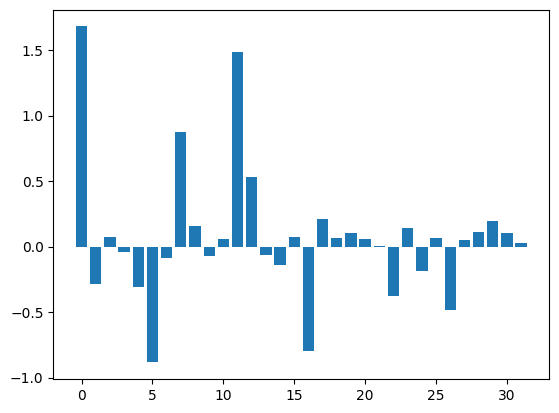

In [269]:
from matplotlib import pyplot
# get importance
importance = lin_reg.coef_
# summarize feature importance
for i,v in enumerate(importance):
    if v>0:
        print('Feature: %s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [176]:
# to get the coefficeients
x_train_with_intercept = sm.add_constant(x_train)
ols_model = sm.OLS(y_train, x_train_with_intercept).fit()
model_summary = ols_model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.9935
Date:                Thu, 07 Sep 2023   Prob (F-statistic):              0.477
Time:                        19:09:51   Log-Likelihood:                -40370.
No. Observations:               23388   AIC:                         8.081e+04
Df Residuals:                   23355   BIC:                         8.107e+04
Df Model:                          32                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.2776      0.051    103.743      0.0

In [177]:
# Feature selection with backward elimination

# 
model_bs = LinearRegression()
selector = SelectFromModel(model_bs)
selector = selector.fit(x_train, y_train)

In [178]:
# Showing boolen vales if variables were selected or not
status = selector.get_support()
print("Selection status: ", status)

Selection status:  [False False  True  True False  True  True False False False False False
 False False  True False False False  True False  True False False  True
 False  True False False  True False False False]


In [179]:
features = X.columns.tolist()

# Print all feature names
print("All features:")
print(features)

# Print selected feature names using the selection status
print("Selected features:")
selected_feature_names = np.array(features)[status]
print(selected_feature_names)

# Transform the data to include only the selected features
X_selected = selector.transform(X)

All features:
['runtimeMinutes', 'isOriginal', 'sentiment_encoded', 'word_count', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'month', 'dayofweek', 'actress0_cat', 'actor0_cat', 'director_cat']
Selected features:
['sentiment_encoded' 'word_count' 'Adult' 'Adventure' 'Fantasy' 'Musical'
 'News' 'Sport' 'War' 'dayofweek']


/usr/local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [180]:
#Data partitioning based on the selected models

#SPlitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42) 


In [182]:
# LR with the selected features

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
rmse_cross_val = rmse_cv(lin_reg, X_selected, Y)  # Pass X and Y to rmse_cv
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["LinearRegression"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 1.0677578469998774
MSE: 1.7889053480396464
RMSE: 1.337499662818517
R2 Score: 0.02013218856468668
------------------------------
RMSE Cross-Validation: 1.3432793103115959


In [183]:
# to get the coefficeients
x_train_with_intercept2 = sm.add_constant(X_train)
ols_model = sm.OLS(y_train, x_train_with_intercept2).fit()
model_summary = ols_model.summary()
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:          averageRating   R-squared:                       0.024
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     58.30
Date:                Thu, 07 Sep 2023   Prob (F-statistic):          2.45e-117
Time:                        19:10:45   Log-Likelihood:                -40098.
No. Observations:               23388   AIC:                         8.022e+04
Df Residuals:                   23377   BIC:                         8.031e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0031      0.027    183.662      0.0

In [184]:
# ASSUMPTION CHECKING FOR THE BEST PERFORMING LINEAR REGRESSION MODEL

In [185]:
# residuals

residuals = y_test.values-predictions
mean_residuals = np.mean(residuals)
print("Mean of Residuals {}".format(mean_residuals))

Mean of Residuals 0.014992271165563096


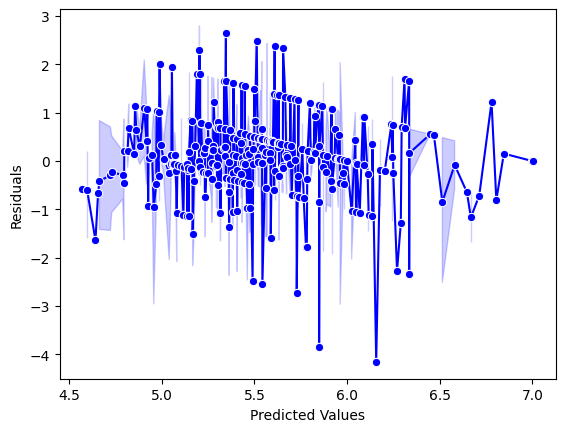

In [186]:
# Residual Plot

#plt.figure(figsize=(10, 5))
p = sns.lineplot(x=predictions, y=residuals, marker='o', color='blue')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
#plt.ylim(-10, 10)
#plt.xlim(0, 26)
#p = sns.lineplot([0, 26], [0, 0], color='red')
#p = plt.title('Residuals vs. Fitted Values Plot for Autocorrelation Check')
plt.show()

/var/folders/tq/pjxl3n893rd91t7pskrh0b2w0000gn/T/ipykernel_16081/3320662062.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  p = sns.distplot(residuals,kde=True)


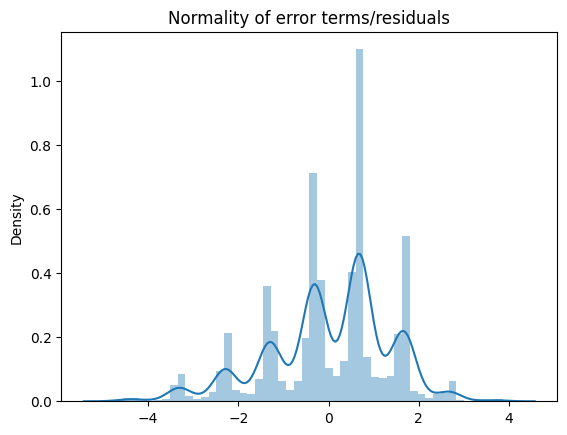

In [187]:
#Normality

p = sns.distplot(residuals,kde=True)
p = plt.title('Normality of error terms/residuals')

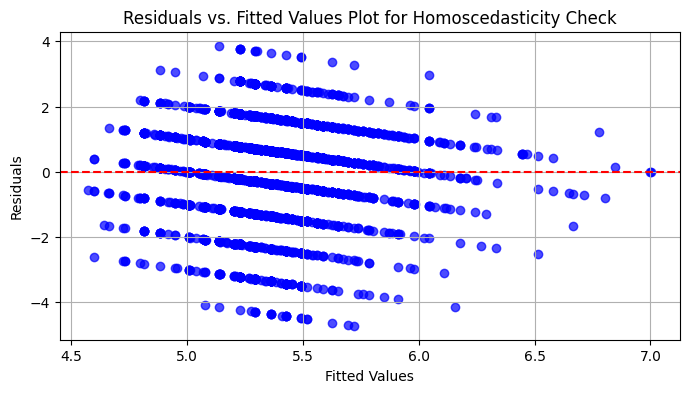

In [188]:
# heteroscedasticity

# Assuming 'y_train' and 'predictions' are defined as your target values and model predictions
residuals = y_test - predictions

# Fit a linear regression model to the residuals to detect heteroscedasticity
X = sm.add_constant(predictions)  # Add a constant term to the predictions
model = sm.OLS(residuals, X).fit()

# Plot the Residuals vs. Fitted Values Plot
plt.figure(figsize=(8, 4))
plt.scatter(predictions, residuals, color='blue', alpha=0.7)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted Values Plot for Homoscedasticity Check')

# Add a horizontal line at y=0 for reference
plt.axhline(y=0, color='red', linestyle='--')

plt.grid(True)
plt.show()

In [ ]:
# Autocorrelation

sm.graphics.tsa.plot_acf(residuals)
plt.show()

In [192]:
print(X)

[[1.         4.88170819]
 [1.         4.92684858]
 [1.         5.29442112]
 ...
 [1.         5.29442112]
 [1.         6.66811808]
 [1.         5.20919595]]


In [193]:
#RIDGE REGRESSION WITH NO TEXT 

ridge = Ridge()
ridge.fit(x_train, y_train)
predictions = ridge.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge, X_selected, Y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["RidgeRegression"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)


MAE: 1.0887166864301379
MSE: 1.8249942209001369
RMSE: 1.3509234696681145
R2 Score: 0.0003646111991610912
------------------------------
RMSE Cross-Validation: 1.34328270617211


In [ ]:
# Ridge Regression # 

In [ ]:
# Random Forest # 

In [270]:
random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest, X_selected, Y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["RandomForestRegressor"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)


MAE: 0.8664914950290965
MSE: 1.2817372218550571
RMSE: 1.1321383404226963
R2 Score: 0.2876203922901962
------------------------------
RMSE Cross-Validation: 1.221261631967143


Feature: runtimeMinutes, Score: 0.21278
Feature: isOriginal, Score: 0.02068
Feature: sentiment_encoded, Score: 0.02795
Feature: word_count, Score: 0.08760
Feature: Action, Score: 0.01773
Feature: Adult, Score: 0.00033
Feature: Adventure, Score: 0.01073
Feature: Animation, Score: 0.01357
Feature: Biography, Score: 0.00738
Feature: Comedy, Score: 0.02124
Feature: Crime, Score: 0.01560
Feature: Documentary, Score: 0.08794
Feature: Drama, Score: 0.05837
Feature: Family, Score: 0.00943
Feature: Fantasy, Score: 0.00916
Feature: History, Score: 0.00771
Feature: Horror, Score: 0.13259
Feature: Music, Score: 0.00509
Feature: Musical, Score: 0.00386
Feature: Mystery, Score: 0.01121
Feature: News, Score: 0.00049
Feature: Romance, Score: 0.01521
Feature: Sci-Fi, Score: 0.01102
Feature: Sport, Score: 0.00520
Feature: Thriller, Score: 0.01730
Feature: War, Score: 0.00478
Feature: Western, Score: 0.00228
Feature: month, Score: 0.01291
Feature: dayofweek, Score: 0.01012
Feature: actress0_cat, Score: 0

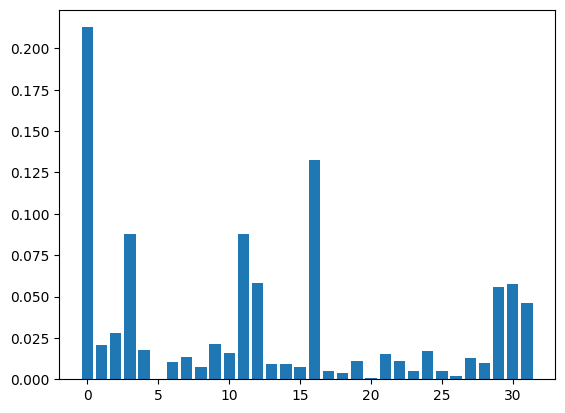

In [272]:
# get importance
importance = random_forest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 if v>0:
        print('Feature: %s, Score: %.5f' % (X.columns[i],v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [273]:
model_results.head()

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,1.088720,1.825008,1.350929,0.000357,1.105105
1,LinearRegression,1.067758,1.788905,1.337500,0.020132,1.343279
2,LinearRegression,1.088717,1.824994,1.350923,0.000365,1.343283
3,LinearRegression,1.146015,2.061376,1.435749,-0.129113,1.345227
4,LinearRegression,1.116565,1.950236,1.396508,-0.068236,1.344887


In [ ]:
# XGB Regg # 

In [195]:
xgb = XGBRegressor()
xgb.fit(x_train, y_train)
predictions = xgb.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(xgb,X_selected, Y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["XGBRegressor"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 1.1165650376053744
MSE: 1.9502356475281584
RMSE: 1.396508377177938
R2 Score: -0.06823602367820536
------------------------------
RMSE Cross-Validation: 1.3448874174807375


In [ ]:
# SVR #

In [226]:
svr = SVR()
svr.fit(x_train, y_train)
predictions = svr.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(svr, X_selected, Y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["SVR"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 1.0819530613648132
MSE: 1.9571683165706533
RMSE: 1.3989883189543268
R2 Score: -0.07203337340915605
------------------------------
RMSE Cross-Validation: 1.3736948279636298


In [ ]:
# During the second phase, TF-IDF vector based on title were used

In [227]:
#  merging the vector to the dataset
df_filter3 = pd.concat([df_filter2, df_titlevector], axis=1)
df_filter3.head() # view its shape

,runtimeMinutes,isOriginal,sentiment_encoded,word_count,Action,Adult,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,History,Horror,Music,Musical,Mystery,News,Romance,Sci-Fi,Sport,Thriller,War,Western,month,dayofweek,actress0_cat,actor0_cat,director_cat,averageRating,back,becomes,city,daughter,day,death,family,father,film,find,finds,first,friend,friends,get,girl,group,help,home,life,lives,love,make,man,mother,must,new,night,old,one,people,school,son,story,take,takes,three,time,together,town,two,war,way,wife,woman,world,year,year old,years,young
0,118,1,1,3,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,12,1,2,4,2,6,0.321187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.330996,0.000000,0.887288,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,100,1,1,3,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,6,3,3,1,1,5,0.593549,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.617054,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.516667,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,80,0,1,3,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,6,1,1,1,3,6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,90,0,1,5,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12,0,5,1,2,6,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,85,1,1,2,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,11,4,5,5,2,4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.590816,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.342251,0.0,0.0,0.0,0.0,0.0,0.000000,0.491834,0.0,0.0,0.0,0.0,0.0,0.000000,0.328878,0.000000,0.0,0.0,0.271969,0.0,0.331319,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [232]:
#removing the NA records
df_filter3.dropna(inplace=True)

In [233]:
df_filter3.shape

(29236, 83)

In [234]:
# Linear Regression # 

In [235]:
#Splitting Our Data Into Train and Test Subsets
# Splitting Our Data Into Train and Test Subsets
Y = df_filter3['averageRating']
X = df_filter3.drop(['averageRating'], axis=1, inplace=False)

# Separating the 80% data for training data and 20% for testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=40385905)

In [236]:
#checking train and test dimentions
print("Size of x_train:", (x_train.shape))
print("Size of Y_train:", (y_train.shape))
print("Size of x_test:", (x_test.shape))
print("Size of Y_test:", (y_test.shape))

Size of x_train: (23388, 82)
Size of Y_train: (23388,)
Size of x_test: (5848, 82)
Size of Y_test: (5848,)


In [237]:
# Scaling the data
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [239]:
# LR with text features

lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train)
predictions = lin_reg.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
rmse_cross_val = rmse_cv(lin_reg, X, Y)  # Pass X and Y to rmse_cv
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["LinearRegression with text features"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 0.8385317070613879
MSE: 1.1989561557865085
RMSE: 1.0949685638348292
R2 Score: 0.3336294668229328
------------------------------
RMSE Cross-Validation: 105662426514.91716


In [240]:
x_train_with_intercept = sm.add_constant(x_train)

# Fit a statsmodels OLS (Ordinary Least Squares) model
ols_model = sm.OLS(y_train, x_train_with_intercept).fit()

# Get the model summary
model_summary = ols_model.summary()

# Print the model summary
#print(model_summary)

In [241]:
# Feature selection with backward elimindation
model_bs = LinearRegression()
selector = SelectFromModel(model_bs)
selector = selector.fit(x_train, y_train)

In [242]:
status = selector.get_support()
print("Selection status: ", status)

Selection status:  [ True  True False False  True  True False  True False False False  True
  True False False False  True  True False False False False  True False
 False False  True False False  True False False False False False False
 False False False False False False False  True False False  True False
  True False False False False False False False  True  True False False
 False False False False False False False False False False False False
 False False False False False False False  True False False]


In [243]:
features = X.columns.tolist()

# Print all feature names
print("All features:")
print(features)

# Print selected feature names using the selection status
print("Selected features:")
selected_feature_names = np.array(features)[status]
print(selected_feature_names)

# Transform the data to include only the selected features
X_selected = selector.transform(X)

All features:
['runtimeMinutes', 'isOriginal', 'sentiment_encoded', 'word_count', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'month', 'dayofweek', 'actress0_cat', 'actor0_cat', 'director_cat', 'back', 'becomes', 'city', 'daughter', 'day', 'death', 'family', 'father', 'film', 'find', 'finds', 'first', 'friend', 'friends', 'get', 'girl', 'group', 'help', 'home', 'life', 'lives', 'love', 'make', 'man', 'mother', 'must', 'new', 'night', 'old', 'one', 'people', 'school', 'son', 'story', 'take', 'takes', 'three', 'time', 'together', 'town', 'two', 'war', 'way', 'wife', 'woman', 'world', 'year', 'year old', 'years', 'young']
Selected features:
['runtimeMinutes' 'isOriginal' 'Action' 'Adult' 'Animation' 'Documentary'
 'Drama' 'Horror' 'Music' 'Sci-Fi' 'Western' 'actress0_cat' 'first' 'get'
 'group'

/usr/local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [244]:
#SPlitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42) 


In [245]:
# LR with the selected features
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
rmse_cross_val = rmse_cv(lin_reg, X_selected, Y)  # Pass X and Y to rmse_cv
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["LinearRegression with selected features"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 0.8495041914917175
MSE: 1.2097608971748197
RMSE: 1.0998913115280162
R2 Score: 0.33735691272110824
------------------------------
RMSE Cross-Validation: 1.1038241739669163


In [246]:
#RIDGE REGRESSION WITH text feature vector 

ridge = Ridge()
ridge.fit(x_train, y_train)
predictions = ridge.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge, X, Y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["RidgeRegression with text features"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 1.089570519408465
MSE: 1.8306052536259594
RMSE: 1.3529986155299492
R2 Score: -0.0027088160019865803
------------------------------
RMSE Cross-Validation: 1.1019030092735218


In [247]:
# Feature selection with backward elimindation
model_bs = Ridge()
selector = SelectFromModel(model_bs)
selector = selector.fit(x_train, y_train)

status = selector.get_support()
print("Selection status: ", status)

Selection status:  [False False  True  True False  True  True False False False False False
 False False  True False False False  True False  True False False  True
 False  True False False  True False False False  True False False  True
 False False False  True  True  True  True  True False  True  True False
 False False  True False False False False  True False False  True  True
 False  True  True False  True  True  True False  True  True False False
 False  True False False False  True  True  True False False]


In [248]:
features = X.columns.tolist()

# Print all feature names
print("All features:")
print(features)

# Print selected feature names using the selection status
print("Selected features:")
selected_feature_names = np.array(features)[status]
print(selected_feature_names)

# Transform the data to include only the selected features
X_selected = selector.transform(X)


All features:
['runtimeMinutes', 'isOriginal', 'sentiment_encoded', 'word_count', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'month', 'dayofweek', 'actress0_cat', 'actor0_cat', 'director_cat', 'back', 'becomes', 'city', 'daughter', 'day', 'death', 'family', 'father', 'film', 'find', 'finds', 'first', 'friend', 'friends', 'get', 'girl', 'group', 'help', 'home', 'life', 'lives', 'love', 'make', 'man', 'mother', 'must', 'new', 'night', 'old', 'one', 'people', 'school', 'son', 'story', 'take', 'takes', 'three', 'time', 'together', 'town', 'two', 'war', 'way', 'wife', 'woman', 'world', 'year', 'year old', 'years', 'young']
Selected features:
['sentiment_encoded' 'word_count' 'Adult' 'Adventure' 'Fantasy' 'Musical'
 'News' 'Sport' 'War' 'dayofweek' 'back' 'daughter' 'father' 'film' 'find'
 'finds

/usr/local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [249]:
#SPlitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42) 

In [250]:
#RIDGE REGRESSION WITH title TF-IDF and FS

ridge = Ridge()
ridge.fit(X_train, y_train)
predictions = ridge.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(ridge, X_selected, Y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["RidgeRegression with selected features"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 1.0454395897958282
MSE: 1.7427674270906228
RMSE: 1.320139169591836
R2 Score: 0.045404103411403995
------------------------------
RMSE Cross-Validation: 1.3256488969347184


In [251]:
# RANDOM FOREST #

random_forest = RandomForestRegressor()
random_forest.fit(x_train, y_train)
predictions = random_forest.predict(x_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest, X, Y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["RandomForestRegressor with text features"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 1.106261499658003
MSE: 1.9253331087030017
RMSE: 1.387563731402274
R2 Score: -0.05459572893341669
------------------------------
RMSE Cross-Validation: 1.1110731237870444


In [252]:
# Feature selection with backward elimindation
model_bs = RandomForestRegressor()
selector = SelectFromModel(model_bs)
selector = selector.fit(x_train, y_train)

status = selector.get_support()
print("Selection status: ", status)

Selection status:  [ True  True  True  True False False False False False  True False False
  True False False False False False False False False False False False
 False False False False False  True  True  True False False False False
 False False  True False  True False False False False False False False
 False False False  True  True  True False  True False False  True False
 False  True False False False  True False False False False False False
  True False False False False  True False False  True  True]


In [253]:
features = X.columns.tolist()

# Print all feature names
print("All features:")
print(features)

# Print selected feature names using the selection status
print("Selected features:")
selected_feature_names = np.array(features)[status]
print(selected_feature_names)

# Transform the data to include only the selected features
X_selected = selector.transform(X)

All features:
['runtimeMinutes', 'isOriginal', 'sentiment_encoded', 'word_count', 'Action', 'Adult', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy', 'History', 'Horror', 'Music', 'Musical', 'Mystery', 'News', 'Romance', 'Sci-Fi', 'Sport', 'Thriller', 'War', 'Western', 'month', 'dayofweek', 'actress0_cat', 'actor0_cat', 'director_cat', 'back', 'becomes', 'city', 'daughter', 'day', 'death', 'family', 'father', 'film', 'find', 'finds', 'first', 'friend', 'friends', 'get', 'girl', 'group', 'help', 'home', 'life', 'lives', 'love', 'make', 'man', 'mother', 'must', 'new', 'night', 'old', 'one', 'people', 'school', 'son', 'story', 'take', 'takes', 'three', 'time', 'together', 'town', 'two', 'war', 'way', 'wife', 'woman', 'world', 'year', 'year old', 'years', 'young']
Selected features:
['runtimeMinutes' 'isOriginal' 'sentiment_encoded' 'word_count' 'Comedy'
 'Drama' 'actress0_cat' 'actor0_cat' 'director_cat' 'family' 'film' 'life'
 'lives'

/usr/local/lib/python3.9/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


In [102]:
#SPlitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.2, random_state=42) 

In [275]:
# RANDOM FOREST #

random_forest = RandomForestRegressor()
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)
rmse_cross_val = rmse_cv(random_forest, X, Y)
print("RMSE Cross-Validation:", rmse_cross_val)

new_row = pd.DataFrame({"Model": ["RandomForestRegressor with selected features"], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

MAE: 1.1462714321253262
MSE: 2.02908670000082
RMSE: 1.4244601433528492
R2 Score: -0.12775065177846878
------------------------------
RMSE Cross-Validation: 1.1493684040508527


In [276]:
model_results.head(50)

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,1.088720,1.825008,1.350929,0.000357,1.105105e+00
1,LinearRegression,1.067758,1.788905,1.337500,0.020132,1.343279e+00
2,LinearRegression,1.088717,1.824994,1.350923,0.000365,1.343283e+00
3,LinearRegression,1.146015,2.061376,1.435749,-0.129113,1.345227e+00
4,LinearRegression,1.116565,1.950236,1.396508,-0.068236,1.344887e+00
5,SVR,1.081953,1.957168,1.398988,-0.072033,1.373695e+00
6,LinearRegression with text features,0.838532,1.198956,1.094969,0.333629,1.056624e+11
7,LinearRegression with text features,0.838532,1.198956,1.094969,0.333629,1.056624e+11
8,LinearRegression with selected features,0.849504,1.209761,1.099891,0.337357,1.103824e+00
9,RidgeRegression with text features,1.089571,1.830605,1.352999,-0.002709,1.101903e+00


## Final step: choosing the best performing model

In [277]:
# Convert your X and Y data to pandas DataFrames
X = pd.DataFrame(X)
Y = pd.Series(Y)

# Split your data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Create a RandomForestRegressor
random_forest = RandomForestRegressor()

# Create an RFE selector with the RandomForestRegressor as the estimator
selector = RFE(random_forest, n_features_to_select=5)  # Adjust 'n_features_to_select' as needed

# Fit the RFE selector on the training data
selector.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[selector.support_]

# Filter the training and testing data to keep only the selected features
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


MAE: 0.8979626014102802
MSE: 1.343219072343497
RMSE: 1.1589732837056672
R2 Score: 0.26425557722340465
------------------------------
RMSE Cross-Validation: 1.1681979971018719


### Optimize model using hyperparameter tuning

In [284]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 5)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 4)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 650, 1100, 1550, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 43, 76, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [285]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 10 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_selected, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors an

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 43, 76, 110, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 650, 1100, 1550,
                                                         2000]},
                   random_state=42, verbose=2)

In [286]:
rf_random.best_params_

{'n_estimators': 650,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 10,
 'bootstrap': True}

In [295]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))
    return accuracy
    
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train_selected, y_train)
predictions = base_model.predict(X_test_selected)
# Evaluate the model
print("Baseline Model")
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)

base_accuracy = evaluate(base_model, X_test_selected, y_test)

# try with best estimator
best_random = rf_random.best_estimator_

best_random.fit(X_train_selected, y_train)
predictions = best_random.predict(X_test_selected)
# Evaluate the model
print("Post HyperParameterTuning : Random Forest Regressor")
mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-" * 30)
new_row = pd.DataFrame({"Model": ["RandomForestRegressor with optimal Hyperparameters "], "MAE": [mae], "MSE": [mse], "RMSE": [rmse], "R2 Score": [r_squared], "RMSE (Cross-Validation)": [rmse_cross_val]})
model_results = pd.concat([model_results, new_row], ignore_index=True)

random_accuracy = evaluate(best_random, X_test_selected, y_test)

print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Baseline Model
MAE: 0.9026421590942146
MSE: 1.3621129211700052
RMSE: 1.1670959348614
R2 Score: 0.2539065253188373
------------------------------
Model Performance
Average Error: 0.9026 degrees.
Accuracy = 78.54%.
Post HyperParameterTuning : Random Forest Regressor
MAE: 0.865996916578899
MSE: 1.238235974237777
RMSE: 1.11276051971562
R2 Score: 0.3217597703274607
------------------------------
Model Performance
Average Error: 0.8660 degrees.
Accuracy = 79.23%.
Improvement of 0.88%.


In [297]:
model_results.head(100)

,Model,MAE,MSE,RMSE,R2 Score,RMSE (Cross-Validation)
0,LinearRegression,1.088720,1.825008,1.350929,0.000357,1.105105e+00
1,LinearRegression,1.067758,1.788905,1.337500,0.020132,1.343279e+00
2,LinearRegression,1.088717,1.824994,1.350923,0.000365,1.343283e+00
3,LinearRegression,1.146015,2.061376,1.435749,-0.129113,1.345227e+00
4,LinearRegression,1.116565,1.950236,1.396508,-0.068236,1.344887e+00
5,SVR,1.081953,1.957168,1.398988,-0.072033,1.373695e+00
6,LinearRegression with text features,0.838532,1.198956,1.094969,0.333629,1.056624e+11
7,LinearRegression with text features,0.838532,1.198956,1.094969,0.333629,1.056624e+11
8,LinearRegression with selected features,0.849504,1.209761,1.099891,0.337357,1.103824e+00
9,RidgeRegression with text features,1.089571,1.830605,1.352999,-0.002709,1.101903e+00
